In [13]:
# Imports

import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sys
import h5py

from __future__ import division, print_function

import illustris_api as ia

from numpy import loadtxt
from os import listdir

In [331]:
# Illustris API Configuration
ia.set_apikey('4e2c93455bbc8e991a91a61ef5e11daa')

h = 0.704

snap = 68
z = 2

lower = 0.0199
upper = 0.02

def test_plot(fname):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    dens = numpy.log10(f['PartType0']['Masses'][:])
    import matplotlib.pyplot as pyplot
    pyplot.figure()
    pyplot.hist2d(z,x,weights=dens,bins=[150,100])
    pyplot.show()


files = None
#files = ['cutout_41094.hdf5.orig'] # uncomment and set this to suppress to downloading

if files is None: 

    halo_data_prelim = ia.obtain_halos_by_mass(lower, upper, snap)

    c = halo_data_prelim['count']
    if ia.DEBUG: print(c)

    halo_ids, halo_data = ia.obtain_subhalos_data(halo_data_prelim, snap, z)

    halo_ids, halo_data = ia.filter_haloids(halo_ids, halo_data, filters=[ia.filter_non_zero_mass, ia.filter_star_mass, ia.filter_fluid_mass], args=[None, {'lower': 0.0001, 'upper': 0.0995}, {'lower': 0.00001, 'upper': 0.01}])

    if ia.DEBUG: print(halo_ids[:])

    ia.store_metadata(halo_data)

    files = ia.obtain_cutouts(halo_data, gascols=['Coordinates', 'Density', 'GFM_Metallicity', 'Masses', 'SmoothingLength', 'Velocities'], starcols=['Coordinates', 'Masses', 'Velocities','GFM_Metallicity'], count=None)

    Ldata = []
    ia.detilt_files(files, halo_data, L_outputs=Ldata)
    if ia.DEBUG: print(Ldata)

ia.process_cutouts_for_splash(files)

Setting API Key to 4e2c93455bbc8e991a91a61ef5e11daa
 Obtaining subhalos in mass range 0.0199 to 0.02 at snapshot 68.000000
   550 subhalos will be obtained in 100-element chunks
 Obtaining metadata for 550 subhalos
     0 % done
     10 % done
     20 % done
     30 % done
     40 % done
     50 % done
     60 % done
     70 % done
     80 % done
     90 % done
Initial idn set = 550
550
Applying filter filter_non_zero_mass
 0 eliminated due to less than epsilon mass
 1 eliminated due to less than epsilon mass
 2 eliminated due to less than epsilon mass
 3 eliminated due to less than epsilon mass
 4 eliminated due to less than epsilon mass
 5 eliminated due to less than epsilon mass
 6 eliminated due to less than epsilon mass
 7 eliminated due to less than epsilon mass
 8 eliminated due to less than epsilon mass
 9 eliminated due to less than epsilon mass
 10 eliminated due to less than epsilon mass
 11 eliminated due to less than epsilon mass
 12 eliminated due to less than epsilon mas

 Obtaining cutout of halo 166429 at redshift 2.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 311964 at redshift 2.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 340923 at redshift 2.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 430694 at redshift 2.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 431402 at redshift 2.000000
 Columns requested:Coordinates Masses Velocities GFM_Metallicity Coordinates Density GFM_Metallicity Masses SmoothingLength Velocities 
 Obtaining cutout of halo 450421 at redshift 2.000

/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=2/illustris_api.py:1037: RuntimeWarning: invalid value encountered in true_divide
  Lhat = totL/modL # this is the direction the total angular momentum vector points


 "splashifying" cutout_166429.hdf5, output will be saved to cutout_166429_splash.hdf5
 "splashifying" cutout_311964.hdf5, output will be saved to cutout_311964_splash.hdf5
 "splashifying" cutout_340923.hdf5, output will be saved to cutout_340923_splash.hdf5
 "splashifying" cutout_430694.hdf5, output will be saved to cutout_430694_splash.hdf5
 "splashifying" cutout_431402.hdf5, output will be saved to cutout_431402_splash.hdf5
 "splashifying" cutout_450421.hdf5, output will be saved to cutout_450421_splash.hdf5
 "splashifying" cutout_456564.hdf5, output will be saved to cutout_456564_splash.hdf5
 "splashifying" cutout_463531.hdf5, output will be saved to cutout_463531_splash.hdf5
 "splashifying" cutout_464825.hdf5, output will be saved to cutout_464825_splash.hdf5
 "splashifying" cutout_481764.hdf5, output will be saved to cutout_481764_splash.hdf5
 "splashifying" cutout_509774.hdf5, output will be saved to cutout_509774_splash.hdf5
 "splashifying" cutout_515778.hdf5, output will be sav

In [332]:
# Creates arrays of stellar mass, fluid mass, and virial mass

stellar_mass = []
fluid_mass = []
virial_mass = []

# Loops over halo data and appends stellar masses and fluid masses to arrays
for h in halo_data:
    stellar_mass.append(h['mass_stars'])
    fluid_mass.append(h['mass_gas'])
    
# Loops over halo data and halo ids to create virial mass array for the galaxies that met the mass cuts
for i in range(0,len(halo_data_prelim['results'])):
    for j in range(0,len(halo_ids)):
        if halo_data_prelim['results'][i]['id'] == halo_ids[j]:
            virial_mass.append(halo_data_prelim['results'][i]['mass_log_msun'])
            
print(halo_ids)    
print(stellar_mass)
print(fluid_mass)
print(virial_mass)


[73322, 166429, 311964, 340923, 430694, 431402, 450421, 456564, 463531, 464825, 481764, 509774, 515778, 545183, 548278, 594820, 595048, 621869, 629921, 670366]
[0.000364, 0.001666, 0.000151, 0.000139, 0.000401, 0.000247, 0.000165, 0.000132, 0.000116, 0.000182, 0.000292, 0.000217, 0.00027, 0.000132, 0.000102, 0.000303, 0.000113, 0.000128, 0.000122, 0.000137]
[0.001484, 0.000237, 0.002206, 0.000865, 0.001521, 0.001584, 0.001718, 0.000376, 0.002219, 0.002139, 0.001562, 0.002131, 0.00244, 0.00265, 0.00047, 0.000734, 0.003055, 0.002602, 0.003042, 0.003103]
[8.451825670926038, 8.453001087743322, 8.453327028630136, 8.452653147626046, 8.453435621254888, 8.451454972929874, 8.45258787780924, 8.451433157308525, 8.45282715252922, 8.452522598181604, 8.451934639558376, 8.45308802923441, 8.451389522778005, 8.452979349650773, 8.45282715252922, 8.453348749327429, 8.45176027662041, 8.451825670926038, 8.451673068892827, 8.453327028630136]


In [333]:
# This function grabs the HI abundance from Illustris and takes the mean value

def get_HI(halo_ids):
    f = []
    HI = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=2/cutout_'+str(i)+'.hdf5', 'r')
        HI.append(f['PartType0']['NeutralHydrogenAbundance'][:])
        
    for j in range(0,len(HI)):
        mean.append(numpy.ndarray.mean(HI[j]))

    return mean

In [334]:
HI_abundance = get_HI(halo_ids)
print(HI_abundance)
print(halo_ids)

[0.2996778, 0.2065773, 0.79038215, 0.2537134, 0.28630286, 0.7375167, 0.5766009, 0.777676, 0.77776575, 0.58626145, 0.7007266, 0.61105967, 0.72142357, 0.6716294, 0.74838775, 0.80790836, 0.7545168, 0.66866714, 0.7316671, 0.7426547]
[73322, 166429, 311964, 340923, 430694, 431402, 450421, 456564, 463531, 464825, 481764, 509774, 515778, 545183, 548278, 594820, 595048, 621869, 629921, 670366]


In [335]:
# This function converts HI abundance to HI mass

def get_HI_mass(HI_abundance,fluid_mass):
    
    number_density = []
    MHI = []
    
    # This is the mass of a proton in units of 10^10 Msol/h
    m_p = 1.6726219e-27 * (1 / 1.989e30) * (1 / 10e10) * 0.704 # units of 10^10 Msol/h
    
    # This loops over the fluid masses and converts it to the number density of hydrogen
    for m in fluid_mass:
        n = m / m_p 
        number_density.append(n)
     
    # This loops over the HI abundance and multiplies the number density of hydrgoen by the HI abundance to get the number density of HI
    # It then multiplies the number density of HI by the mass of a proton to obtain the mass of HI
    for i in range(0,len(HI_abundance)):
        
        n_HI = HI_abundance[i] * number_density[i]
        mhi = n_HI * m_p
        MHI.append(mhi)
        
    return MHI

In [336]:
HI = get_HI_mass(HI_abundance,fluid_mass)
print(HI)
print(fluid_mass)
print(halo_ids)

[0.00044472183918952947, 4.895882034301758e-05, 0.0017435830159187318, 0.00021946209028363226, 0.0004354666569828987, 0.0011682264547348022, 0.0009906003620624541, 0.00029240617084503174, 0.0017258622012138367, 0.0012540132442116737, 0.0010945349934101103, 0.0013021681475639346, 0.0017602735018730162, 0.0017798179864883423, 0.0003517422443628311, 0.0005930047334432601, 0.0023050487640500065, 0.0017398718920946122, 0.0022257313224077224, 0.0023044574757814405]
[0.001484, 0.000237, 0.002206, 0.000865, 0.001521, 0.001584, 0.001718, 0.000376, 0.002219, 0.002139, 0.001562, 0.002131, 0.00244, 0.00265, 0.00047, 0.000734, 0.003055, 0.002602, 0.003042, 0.003103]
[73322, 166429, 311964, 340923, 430694, 431402, 450421, 456564, 463531, 464825, 481764, 509774, 515778, 545183, 548278, 594820, 595048, 621869, 629921, 670366]


In [337]:
# This only appends Lhat vectors that have values and removes nan values
# It creates an array of the indices called 'entry' that have real values
Lhat = []
entry = []
for i in range(0,len(Ldata)):
    Lhat.append(Ldata[i][2])
    angm = Ldata[i][2]
    if abs(angm[0])>0:
        entry.append(i)
        
print(Lhat)

[array([-0.5494406, -0.3306729, -0.7673138], dtype=float32), array([ 0.27139765, -0.27230993,  0.9231417 ], dtype=float32), array([ 0.01526926, -0.8046587 ,  0.5935412 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.15450272, -0.8158496 , -0.5572418 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.09513211,  0.39456105, -0.91393185], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.815536  , -0.17270347,  0.55233556], dtype=float32), array([-0.60064584,  0.601235  ,  0.5270114 ], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([-0.32522535, -0.5752086 , -0.75057536], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32), array([nan, nan, nan], dtype=float32)]


In [338]:
# This function plots the metallicity distribution as a column density plot
# It reads in the filename and Lhat vector
# It plots the galaxy in all three planes
# It also does a check on which plane has the largest Lhat vector. It then plots the 'best view' of the galaxy in the other two planes 

def metallicity_plot(fname,Lhat):
    f = h5py.File(fname,'r')
    x = f['PartType0']['Coordinates'][:,0]
    z = f['PartType0']['Coordinates'][:,1]
    y = f['PartType0']['Coordinates'][:,2]
    
    met = f['PartType0']['GFM_Metallicity'][:]/0.0127
    
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    
    plt.figure()
    plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('YZ-plane')

    plt.figure()
    plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XY-plane')

    plt.figure()
    plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
    plt.colorbar()
    #plt.clim(0.1, 1)
    plt.title(str(fname))
    plt.show()
    print('XZ-plane')
    
    print("------------------------Best cutout--------------------------")
    

    if abs(Lhat[0]) >= abs(Lhat[1]) and abs(Lhat[0]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(z,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('YZ-plane')

    if abs(Lhat[1]) >= abs(Lhat[0]) and abs(Lhat[1]) >= abs(Lhat[2]):
        plt.figure()
        plt.hist2d(x,y,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XY-plane')

    if abs(Lhat[2]) >= abs(Lhat[0]) and abs(Lhat[2]) >= abs(Lhat[1]):
        plt.figure()
        plt.hist2d(z,x,weights=met,bins=[200,100],norm=mpl.colors.LogNorm())
        plt.colorbar()
        #plt.clim(0.1, 1)
        plt.title(str(fname))
        plt.show()
        print('XZ-plane')
        
        
    # This plots the minimum and maximum metallicity
    print(min(met),max(met))
    print(Lhat)
    print("------------------------Best cutout--------------------------")

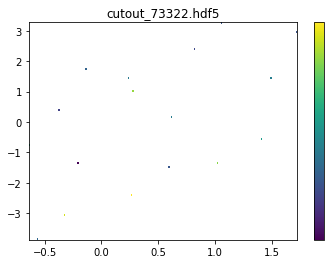

YZ-plane


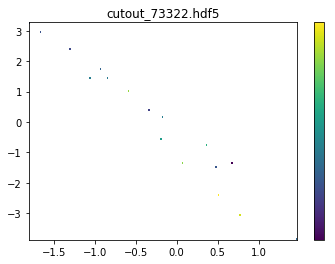

XY-plane


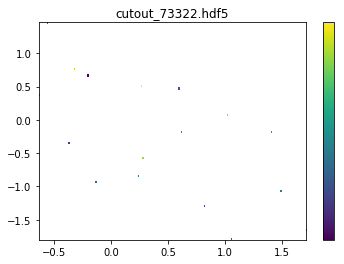

XZ-plane
------------------------Best cutout--------------------------


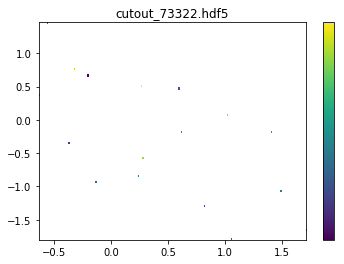

XZ-plane
0.2013479 0.29589814
[-0.5494406 -0.3306729 -0.7673138]
------------------------Best cutout--------------------------


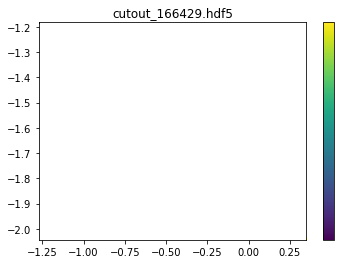

YZ-plane


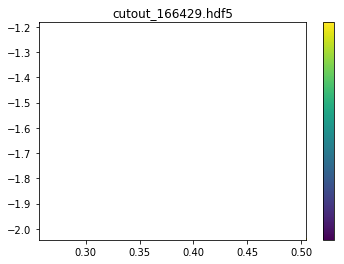

XY-plane


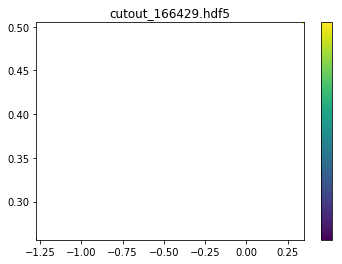

XZ-plane
------------------------Best cutout--------------------------


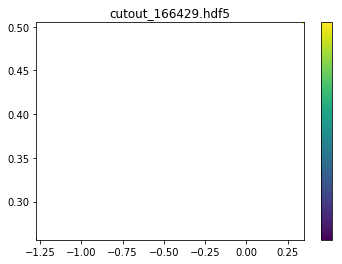

XZ-plane
1.2088708 1.2400423
[ 0.27139765 -0.27230993  0.9231417 ]
------------------------Best cutout--------------------------


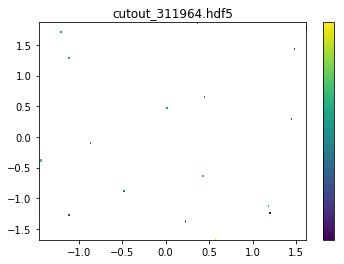

YZ-plane


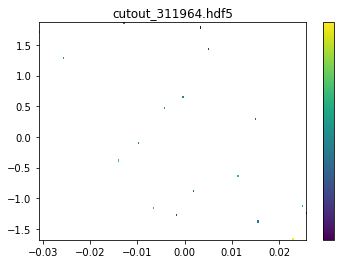

XY-plane


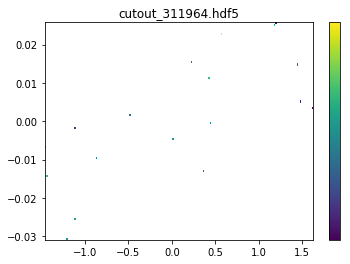

XZ-plane
------------------------Best cutout--------------------------


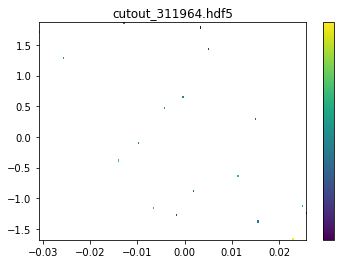

XY-plane
0.011182904 0.019506533
[ 0.01526926 -0.8046587   0.5935412 ]
------------------------Best cutout--------------------------


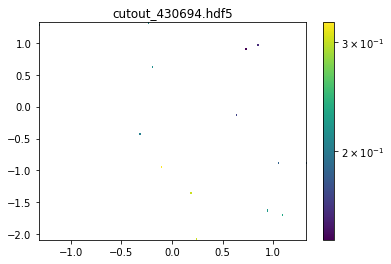

YZ-plane


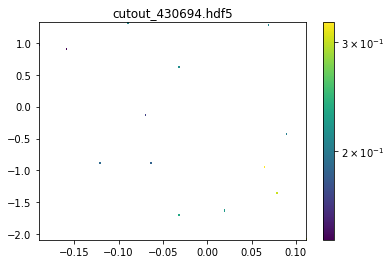

XY-plane


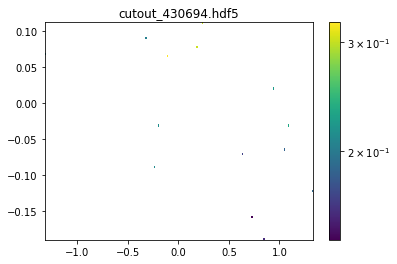

XZ-plane
------------------------Best cutout--------------------------


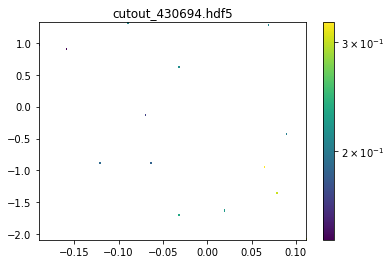

XY-plane
0.14363928 0.32312053
[-0.15450272 -0.8158496  -0.5572418 ]
------------------------Best cutout--------------------------


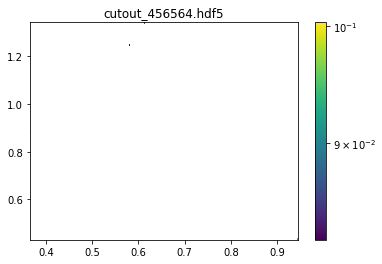

YZ-plane


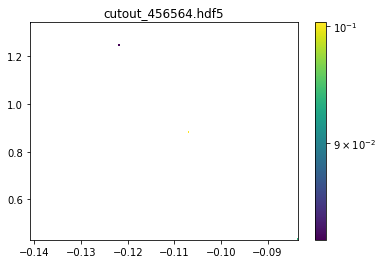

XY-plane


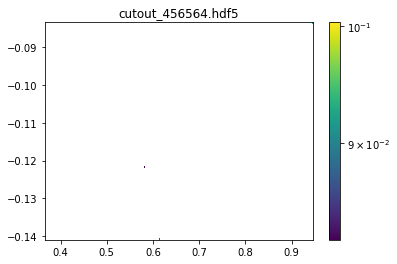

XZ-plane
------------------------Best cutout--------------------------


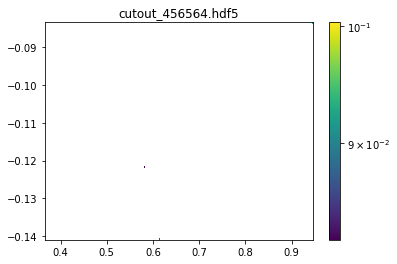

XZ-plane
0.08250671 0.10036089
[-0.09513211  0.39456105 -0.91393185]
------------------------Best cutout--------------------------


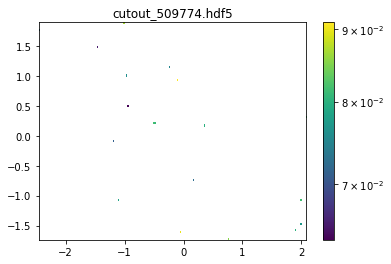

YZ-plane


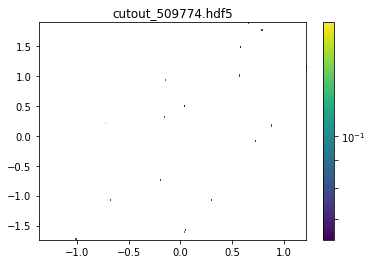

XY-plane


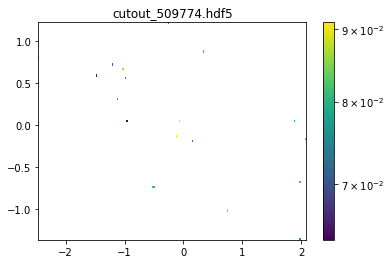

XZ-plane
------------------------Best cutout--------------------------


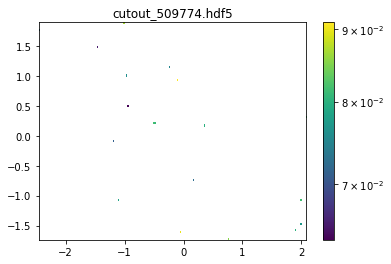

YZ-plane
0.06396271 0.09096748
[-0.815536   -0.17270347  0.55233556]
------------------------Best cutout--------------------------


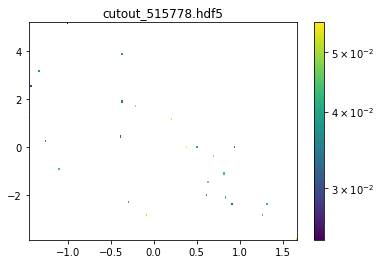

YZ-plane


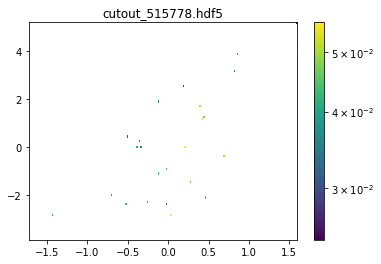

XY-plane


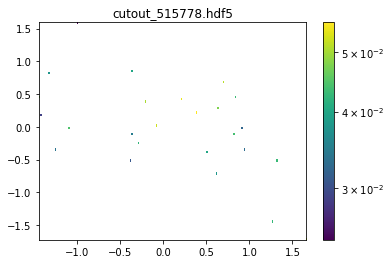

XZ-plane
------------------------Best cutout--------------------------


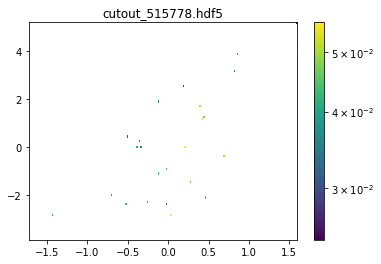

XY-plane
0.024764054 0.055820793
[-0.60064584  0.601235    0.5270114 ]
------------------------Best cutout--------------------------


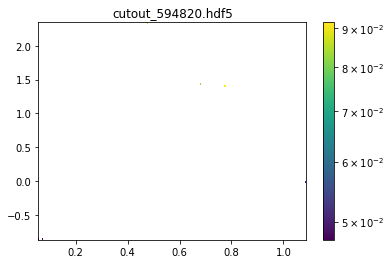

YZ-plane


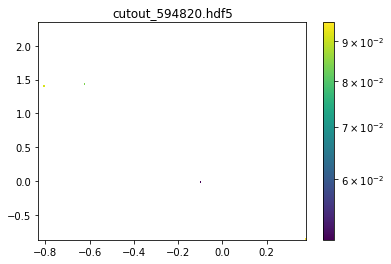

XY-plane


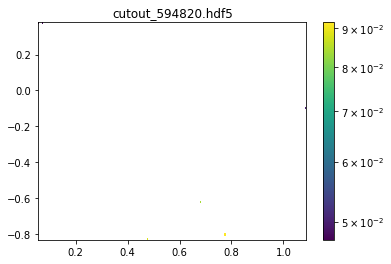

XZ-plane
------------------------Best cutout--------------------------


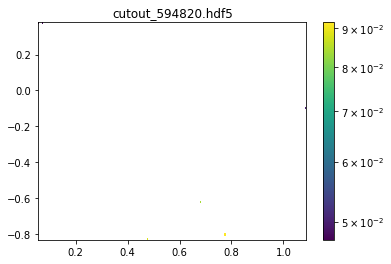

XZ-plane
0.047308087 0.091588765
[-0.32522535 -0.5752086  -0.75057536]
------------------------Best cutout--------------------------


In [339]:
# This loops over all of the galaxies that don't have nan values and plots the metallicity distribution for each

for i in entry:
    metallicity_plot('cutout_'+str(halo_ids[i])+'.hdf5',Lhat[i]) 

In [340]:
# This function obtains the mean metallicity in solar units for a given galaxy

def get_metallicity(halo_ids):
    f = []
    Z = []
    mean = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=2/cutout_'+str(i)+'.hdf5', 'r')
        Z.append(f['PartType0']['GFM_Metallicity'][:]/0.0127)
    for j in range(0,len(Z)):
        mean.append(numpy.ndarray.mean(Z[j]))

    return mean

In [341]:
# This function obtains the total star formation rate in solar masses per year for a given galaxy

def get_SFR(halo_ids):
    f = []
    SFR = []
    mean = []
    total = []
    for i in halo_ids:
        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/z=2/cutout_'+str(i)+'.hdf5', 'r')
        SFR.append(f['PartType0']['StarFormationRate'][:])
    for j in range(0,len(SFR)):
        mean.append(numpy.ndarray.mean(SFR[j]))
    for k in range(0,len(SFR)):
        total.append(numpy.ndarray.sum(SFR[k]))

    return total

In [342]:
metallicity = get_metallicity(halo_ids)
print(metallicity)

starformation = get_SFR(halo_ids)
print(starformation)

[0.2422176, 1.2244565, 0.014454769, 0.04365568, 0.21906939, 0.08148669, 0.025278175, 0.090641946, 0.0028010786, 0.15005028, 0.04745799, 0.07862483, 0.04180419, 0.037441567, 0.061232876, 0.06811521, 0.009814052, 0.03080601, 0.02662921, 0.047651503]
[0.008583183, 0.0018092336, 0.0031026688, 0.00056866184, 0.008513693, 0.001406453, 0.0005211561, 0.0006023325, 0.001149204, 0.006973585, 0.0036504078, 0.006218077, 0.0056426283, 0.0005237776, 0.00082258467, 0.0011202496, 0.002520721, 0.0045585586, 0.0020847432, 0.0036263112]


In [343]:
# This creates a text file with information about all galaxies that passed the mass cuts

with open("master_dwarf_z=2.txt", "a") as myfile:
    for i in range(0,len(halo_ids)):
        ids = halo_ids[i],stellar_mass[i],fluid_mass[i],virial_mass[i],HI_abundance[i], HI[i], [Lhat[i][0],Lhat[i][1],Lhat[i][2]], metallicity[i], starformation[i]
        myfile.write(str(ids)+'\n')

In [ ]:
metallicity = get_metallicity(halo_ids)
print(metallicity)

starformation = get_SFR(halo_ids)
print(starformation)

# This converts the stellar mass to units of solar masses
converted_stellar_mass = []
for i in stellar_mass:
    x = i*1e10*0.704
    converted_stellar_mass.append(x)

In [14]:
# This is the array of information about all of the galaxies that met the mass cuts
# I had a hard time trying to read in information from the text file so I just copied and pasted the information into an array
# It isn't the best way of doing things, but it works
# Note that I am ignoring the galaxies with nan values of Lhat in my analysis

all_data = [['halo_ids', 'stellar_mass', 'fluid_mass', 'virial_mass', 'HI_abundance', 'HI', 'Lhat', 'metallicity', 'starformation'],
[37867, 0.000437, 0.00964, 8.155758599419215, 0.44093677, 0.004250630501508712, [0.76439214, 0.3207612, -0.55930036], 0.17868477, 0.00041112097],
[127954, 0.000157, 0.009869, 8.15359835579929, 0.8416197, 0.008305944527089595, [-0.7143281, 0.5817596, -0.38896155], 0.27605218, 0.00042593078],
#(153332, 0.000104, 0.000667, 8.153728273878306, 0.53357697, 0.00035589583587646484, [nan, nan, nan], 0.0036763356, 0.00047413827)
[202337, 0.000479, 0.009601, 8.155887872967394, 0.7415695, 0.0071198089523315435, [-0.34150362, -0.8192945, -0.46057773], 0.25723743, 0.011191864],
#(306944, 0.000132, 0.009928, 8.155025321577796, 0.78549474, 0.0077983918261528016, [nan, nan, nan], 0.08513963, 0.0102103)
[440425, 0.000195, 0.000633, 8.156189361686135, 0.75399464, 0.00047727860945463187, [0.334682, 0.068883225, 0.9398101], 0.016185608, 0.0007073712],
#(581392, 0.000103, 0.001531, 8.152948181794073, 0.766684, 0.001173793197453022, [nan, nan, nan], 0.019812467, 0.001327987)
#(637145, 0.000128, 0.001989, 8.154723023412823, 0.79465914, 0.0015805770249366759, [nan, nan, nan], 0.033775996, 0.00206623)
[648789, 0.000166, 0.001924, 8.153555041134922, 0.6830062, 0.0013141039807796477, [-0.341601, 0.113464944, 0.93297076], 0.020635866, 0.004515931],
[41225, 0.00036, 0.00064, 8.163490035587623, 0.35305095, 0.00022595260620117186, [0.633147, 0.7712079, 0.066054955], 0.08732152, 0.0009740606],
[130685, 0.000344, 0.009929, 8.164082351582666, 0.7182464, 0.007131468509137631, [-0.59687, 0.004153076, 0.8023273], 0.26101387, 0.016094083],
#(359417, 0.000133, 0.000882, 8.164166902246206, 0.45376432, 0.00040022012972831724, [nan, nan, nan], 0.10136726, 0.000604983)
#(505058, 0.000105, 0.000915, 8.164378206917286, 0.8203179, 0.0007505909004807472, [nan, nan, nan], 0.13384567, 0.0005461863)
[660184, 0.000223, 0.000809, 8.164884919058661, 0.6837406, 0.0005531461582183838, [0.53212374, -0.65416485, 0.537506], 0.08623902, 0.0018492078],
[2090002, 0.000308, 0.009958, 8.163828600782631, 0.73057455, 0.007275061351418495, [-0.77329266, -0.0012582251, -0.634048], 0.007641073, 0.0082138255],
[28544, 0.000991, 0.009308, 8.16526456556306, 0.7857973, 0.007314201249361039, [-0.23824827, -0.64333063, 0.72757363], 0.26830727, 0.0007912584],
#(185821, 0.000198, 0.000508, 8.169711162417906, 0.59154147, 0.0003005030663013458, [nan, nan, nan], 0.085792385, 0.0018203501)
[196215, 0.000432, 0.000255, 8.168917472478716, 0.16463745, 4.198254883289338e-05, [0.91294765, -0.18404226, 0.3642183], 0.024589371, 0.0009366912],
[203454, 0.000188, 0.000441, 8.166485618282223, 0.8344966, 0.000368013008236885, [0.70138544, -0.67695564, -0.22313537], 0.10205802, 0.00020003194],
#(222753, 0.000119, 0.009894, 8.17170983661962, 0.827679, 0.008189055812716485, [nan, nan, nan], 0.08467249, 0.0035277167)
#(283476, 0.000197, 7.9e-05, 8.170128312082005, 0.0035896387, 2.835814605932683e-07, [nan, nan, nan], 0.5194698, 0.00082880526)
#(321067, 0.000121, 0.002689, 8.16547533697312, 0.7971265, 0.0021434730831980703, [nan, nan, nan], 0.022302339, 0.00044993233)
#(342230, 0.000108, 9e-05, 8.16686386868956, 0.2644852, 2.3803668916225435e-05, [nan, nan, nan], 0.026628897, 0.0005075101)
#(349867, 0.000157, 8.6e-05, 8.168792020314182, 0.5870693, 5.048795747756958e-05, [nan, nan, nan], 0.091141395, 0.00037478213)
[358491, 0.000505, 0.000203, 8.169794624411418, 0.7379769, 0.0001498093124628067, [0.27177814, -0.5585666, 0.7836709], 0.22056285, 0.0004730116],
[413469, 0.000298, 0.009607, 8.167199814930951, 0.8207322, 0.007884774017751216, [-0.67079836, 0.12426716, 0.73115474], 0.06074285, 0.00085125526],
#(432519, 0.000104, 0.000993, 8.167619382620723, 0.7466161, 0.0007413898122310639, [nan, nan, nan], 0.018550113, 0.0015839561)
#(469231, 0.000117, 0.000127, 8.168833841729006, 0.33851448, 4.299133858084678e-05, [nan, nan, nan], 0.09012619, 0.0006725479)
#(475066, 0.000105, 0.000497, 8.165348886402448, 0.7759518, 0.0003856480459570885, [nan, nan, nan], 0.03457616, 0.00080033235)
#(490021, 0.000171, 0.001342, 8.166569702402894, 0.73754805, 0.0009897894874811174, [nan, nan, nan], 0.040003825, 0.0005536431)
[519881, 0.000404, 0.000198, 8.165348886402448, 0.67992234, 0.00013462462377548219, [-0.35311195, 0.2618141, -0.8982011], 0.063997075, 0.0005941118],
[520234, 0.000185, 0.000162, 8.17307860886223, 0.5711131, 9.252032375335694e-05, [0.80628985, -0.46762028, -0.3622539], 0.1318757, 0.00072309596],
[579684, 0.000157, 0.000586, 8.171252618861839, 0.48926967, 0.0002867120288610459, [-0.25285685, -0.96068424, 0.11466985], 0.09905172, 0.0028033429],
#(580821, 0.000116, 0.000166, 8.170420078624321, 0.7544701, 0.00012524203824996948, [nan, nan, nan], 0.032143906, 0.00034077952)
#(585911, 0.000139, 0.000566, 8.169669425405534, 0.7348179, 0.0004159069439172745, [nan, nan, nan], 0.054936446, 0.00088583445)
#(624823, 0.000143, 0.00102, 8.170378409688631, 0.77383137, 0.0007893079948425294, [nan, nan, nan], 0.046369486, 0.0009823856)
#(675113, 0.000101, 0.00102, 8.168582852809342, 0.77242565, 0.0007878741645812988, [nan, nan, nan], 0.0135644665, 0.0011966978)
#(678674, 0.000154, 0.000502, 8.167619382620723, 0.39218277, 0.00019687574923038482, [nan, nan, nan], 0.024228925, 0.0026014696)
[704672, 0.000131, 0.000975, 8.167996647287767, 0.6597758, 0.0006432813987135886, [-0.9869095, 0.01401926, -0.1606645], 0.028370218, 0.0023923628],
#(816635, 0.000115, 0.001423, 8.167619382620723, 0.7601121, 0.001081639527976513, [nan, nan, nan], 0.005760902, 0.001378274)
#(61292, 0.000154, 0.001373, 8.185287756810032, 0.5519734, 0.0007578594816327097, [nan, nan, nan], 0.007907713, 0.0030971067)
[70073, 0.002277, 0.008607, 8.189215873965608, 0.70320857, 0.00605251612508297, [-0.85001105, 0.38119313, -0.36355612], 0.5648234, 0.0072426675],
[91207, 0.001111, 0.009714, 8.18689536361293, 0.7740253, 0.007518881968259812, [-0.8084518, 0.56950563, 0.1485567], 0.3532011, 0.00624453],
[130354, 0.000628, 0.009607, 8.180835905973359, 0.84259546, 0.008094814565300942, [-0.039966885, -0.9025161, -0.42879745], 0.42124662, 0.0021657976],
#(130851, 0.000303, 0.000635, 8.179287326842449, 0.33906087, 0.00021530365422368054, [nan, nan, nan], 0.11434071, 0.0034212102)
#(211151, 0.000183, 0.00058, 8.189973352943715, 0.52516454, 0.00030459543585777284, [nan, nan, nan], 0.1313974, 0.0022560258)
[233484, 0.000544, 0.000296, 8.19302968097196, 0.30865392, 9.136156058311462e-05, [-0.94306576, -0.12169684, 0.30954295], 0.57114494, 0.0016212172],
#(243643, 0.000198, 0.001411, 8.18857697060374, 0.74224585, 0.0010473088985085489, [nan, nan, nan], 0.042326972, 0.0024166268)
#(295058, 0.000101, 0.001068, 8.188616929612087, 0.82463133, 0.0008807062640190124, [nan, nan, nan], 0.107153706, 0.00074611657)
#(309741, 0.000131, 0.000683, 8.192039722754611, 0.32240382, 0.00022020180794596672, [nan, nan, nan], 0.17024602, 0.0010611736)
[342086, 0.000151, 0.000773, 8.17871540288183, 0.6327291, 0.0004890996044278145, [0.39595288, 0.80395716, -0.44370508], 0.025595715, 0.0024670842],
[350922, 0.000178, 0.00187, 8.188497041555589, 0.78955275, 0.0014764636391401292, [0.68451416, -0.61090285, 0.3977914], 0.059299536, 0.0015229145],
#(376403, 0.000101, 0.000866, 8.180428920204745, 0.76726747, 0.0006644536252021789, [nan, nan, nan], 0.04535018, 0.0010761777)
#(397777, 0.000149, 0.000888, 8.183310293967555, 0.7848005, 0.0006969028701782228, [nan, nan, nan], 0.14311633, 0.0009004897)
[423044, 0.000164, 0.000916, 8.185046101708608, 0.8425779, 0.0007718013331890106, [0.59767085, -0.77742714, -0.19595012], 0.037923355, 0.00045287673],
#(431063, 0.000114, 0.001178, 8.193464548724917, 0.77543706, 0.0009134648531675339, [nan, nan, nan], 0.040454004, 0.001491016)
[449498, 0.000183, 0.00091, 8.185569517918513, 0.5818678, 0.0005294997107982636, [0.7408492, 0.655062, -0.14844598], 0.05600895, 0.0029923767],
#(450911, 0.000195, 0.000521, 8.188097175509569, 0.82921916, 0.0004320231836438179, [nan, nan, nan], 0.036363263, 0.00050455984)
[476815, 0.0003, 0.000909, 8.190212282611526, 0.51949394, 0.0004722199891805649, [-0.14780521, 0.78974, -0.595369], 0.16669352, 0.0040340982],
#(495351, 0.000304, 0.000832, 8.187296337219019, 0.7404462, 0.0006160512466430665, [nan, nan, nan], 0.06952317, 0.0014003024)
#(508578, 0.000128, 0.001692, 8.179287326842449, 0.6929217, 0.001172423513174057, [nan, nan, nan], 0.047424264, 0.0039580693)
#(527316, 0.000127, 0.001108, 8.191285842417654, 0.6382692, 0.0007072022581100464, [nan, nan, nan], 0.035049863, 0.002238697)
#(549563, 0.000185, 0.000956, 8.187496685278992, 0.7807175, 0.0007463659224510192, [nan, nan, nan], 0.018873064, 0.0009470363)
#(553336, 0.000211, 0.0021, 8.181323785989358, 0.7762313, 0.0016300857067108154, [nan, nan, nan], 0.06305767, 0.0005834758)
#(602262, 0.000111, 0.000378, 8.178960605381185, 0.4660607, 0.00017617094385623933, [nan, nan, nan], 0.0239832, 0.001475724)
[628674, 0.000151, 0.001537, 8.191722458942198, 0.8008571, 0.001230917403757572, [0.3071583, -0.18722978, -0.9330588], 0.05032879, 0.0014626252],
[645035, 0.000228, 0.001471, 8.192158636956579, 0.818272, 0.0012036781040430072, [-0.65643495, 0.629189, -0.4161903], 0.0134226335, 0.0016300583],
[648260, 0.000188, 0.000431, 8.184239612188259, 0.69030184, 0.00029752009111642843, [0.85098135, 0.24260814, 0.46580255], 0.035071813, 0.0011352978],
#(673803, 0.00011, 0.001254, 8.178674522335662, 0.79645544, 0.000998755125403404, [nan, nan, nan], 0.00443774, 0.0005077917)
#(734640, 0.000112, 0.001628, 8.193780542904863, 0.81762064, 0.0013310863938331605, [nan, nan, nan], 0.017318904, 0.0010455598)
[749837, 0.000163, 0.001442, 8.188417097794314, 0.666019, 0.0009603994303941727, [-0.3552955, -0.40870088, -0.8406716], 0.030246157, 0.003259492],
#(292869, 0.000102, 0.001557, 8.207767440402069, 0.7726144, 0.0012029606510996819, [nan, nan, nan], 0.035514627, 0.0019831052)
#(297973, 0.000186, 0.000459, 8.202652378741542, 0.62715995, 0.0002878664184808731, [nan, nan, nan], 0.14483044, 0.00037945923)
[379822, 0.000445, 0.00019, 8.202265341480471, 0.45498437, 8.644702970981598e-05, [-0.04584254, 0.080015555, 0.9957389], 0.2530127, 0.00092851126],
[383242, 0.000411, 0.001248, 8.207767440402069, 0.6016852, 0.0007509031620025633, [0.11076117, -0.993821, -0.0071889865], 0.3078215, 0.0041326084],
#(413689, 0.000128, 0.001888, 8.204505371342057, 0.8055825, 0.0015209398040771484, [nan, nan, nan], 0.014868188, 0.0018357297)
[437334, 0.000875, 0.009479, 8.203039071387428, 0.8053451, 0.007633866373956203, [-0.01983424, 0.054148715, -0.9983359], 0.433828, 0.004072776],
#(447644, 0.000212, 0.000545, 8.20696379351284, 0.7345575, 0.0004003338426351547, [nan, nan, nan], 0.2553906, 0.001042108)
#(476227, 0.000188, 0.000599, 8.2081114057773, 0.48211402, 0.00028878629618883135, [nan, nan, nan], 0.05935508, 0.0028586735)
#(481153, 0.000168, 0.002235, 8.20245890322629, 0.7835084, 0.0017511413186788558, [nan, nan, nan], 0.065448806, 0.0027052579)
#(512729, 0.000139, 0.002269, 8.202652378741542, 0.7846919, 0.0017804658535122873, [nan, nan, nan], 0.01810075, 0.002314853)
#(520519, 0.000149, 0.002748, 8.204543891407885, 0.7800271, 0.0021435144474506373, [nan, nan, nan], 0.03048789, 0.0005214241)
#(520694, 0.000121, 0.001465, 8.204928904271668, 0.7759751, 0.001136803533434868, [nan, nan, nan], 0.015544058, 0.0012104581)
[618011, 0.000178, 0.001034, 8.207537978712034, 0.79885215, 0.0008260131186246871, [0.44476324, 0.5370817, -0.7167489], 0.023980923, 0.0014743017],
[664630, 0.000147, 0.002853, 8.208455098944249, 0.735025, 0.0020970262926220894, [-0.010488751, -0.93046355, -0.36623436], 0.0069128526, 0.002038056],
#(673089, 0.000169, 0.001787, 8.202226618776875, 0.8069907, 0.0014420923506617545, [nan, nan, nan], 0.023162302, 0.0016066664)
#(681233, 0.000172, 0.001067, 8.20856960291694, 0.86252177, 0.0009203107260465623, [nan, nan, nan], 0.0463329, 0.00046658973)
#(888276, 0.000104, 0.002404, 8.206503898148398, 0.8475529, 0.0020375171608924864, [nan, nan, nan], 0.006021818, 0.0007713932)
[46708, 0.002237, 0.009641, 8.22720722318982, 0.7808724, 0.007528390852510928, [0.23861185, -0.9266822, -0.29038674], 0.643076, 0.0103282295],
#(218550, 0.000204, 0.000571, 8.224198920274643, 0.3719055, 0.00021235804373025895, [nan, nan, nan], 0.34644616, 0.0005966885)
[219119, 0.000202, 0.000872, 8.218939618714483, 0.72061783, 0.0006283787484169007, [-0.08419377, 0.8912613, -0.44560605], 0.2523004, 0.0015283758],
[227407, 0.000188, 0.001301, 8.218007055586336, 0.5975972, 0.000777473933517933, [0.09522877, -0.40162647, 0.91083896], 0.09773964, 0.0011159641],
[242367, 0.000864, 0.000385, 8.225412085485818, 0.44849065, 0.00017266890004277228, [0.6371827, -0.36261335, -0.68008065], 0.40891746, 0.0018823022],
#(275814, 0.000133, 0.000227, 8.225155030443153, 0.6166653, 0.00013998302394151686, [nan, nan, nan], 0.3264652, 0.00055972656)
[276944, 0.000229, 0.001032, 8.225889070137724, 0.5867715, 0.0006055481758117675, [0.34486648, 0.85231215, 0.3932317], 0.15220787, 0.001308691],
[329640, 0.000132, 0.000628, 8.223646359257863, 0.6481184, 0.000407018340587616, [0.5738943, -0.722027, 0.3864225], 0.06689309, 0.0020766342],
[333680, 0.000272, 0.001657, 8.217932363956278, 0.7876906, 0.0013052032908797263, [0.15060246, 0.8538799, 0.49820477], 0.16840154, 0.0020052218],
#(335476, 0.000141, 0.001908, 8.222428244660232, 0.7459025, 0.0014231819293498993, [nan, nan, nan], 0.04186517, 0.003166995)
#(377092, 0.000145, 0.00045, 8.217483944213907, 0.4760999, 0.00021424495875835417, [nan, nan, nan], 0.11145898, 0.0018516224)
#(382135, 0.000108, 0.000283, 8.226328899172096, 0.4977368, 0.00014085951769351958, [nan, nan, nan], 0.15428352, 0.0013438585)
[434452, 0.000128, 9.5e-05, 8.220093222832137, 0.5865251, 5.57198828458786e-05, [0.06767618, -0.45805722, 0.8863428], 0.08877839, 0.0004155332],
#(439182, 0.000105, 0.002486, 8.22610904033417, 0.7719124, 0.0019189742163419723, [nan, nan, nan], 0.033642493, 0.0017588125)
#(447681, 0.00013, 0.000856, 8.215648076439882, 0.6584113, 0.0005636000933647155, [nan, nan, nan], 0.02453256, 0.0014798681)
#(481212, 0.000128, 0.000622, 8.223314484876429, 0.8309476, 0.0005168493934869766, [nan, nan, nan], 0.03756112, 0.00035676768)
#(499790, 0.000228, 0.000448, 8.220576081831181, 0.67010474, 0.0003002069244384766, [nan, nan, nan], 0.039066322, 0.0014857573)
#(526244, 0.000147, 0.000103, 8.221095484143788, 0.4491753, 4.6265055716037746e-05, [nan, nan, nan], 0.021956135, 0.00050711096)
[536753, 0.000188, 0.001631, 8.213842119134961, 0.8062383, 0.0013149746569395065, [0.3784919, -0.8827286, 0.27844965], 0.1025557, 0.0008077891],
#(536892, 0.000112, 0.001026, 8.22135495253996, 0.8330799, 0.0008547399512529373, [nan, nan, nan], 0.061551902, 0.00066714414)
#(594056, 0.000193, 0.001025, 8.224309348164013, 0.7354207, 0.000753806221485138, [nan, nan, nan], 0.04994759, 0.0013254085)
[598010, 0.000198, 0.003048, 8.217745578661624, 0.7544816, 0.0022996599583625793, [-0.6702518, 0.4432706, -0.5952088], 0.01631941, 0.00086538395],
[600887, 0.000141, 0.000265, 8.226841470699023, 0.8069813, 0.00021385005116462705, [-0.90457904, -0.21615744, 0.36744067], 0.040115144, 0.00035057415],
#(604913, 0.000106, 0.000674, 8.224419747982063, 0.71451586, 0.000481583692908287, [nan, nan, nan], 0.0026423263, 0.0012847694)
[614912, 0.000169, 0.001838, 8.22087295921224, 0.7351202, 0.0013511508858203888, [-0.5682389, 0.7339951, 0.3719619], 0.048757862, 0.001785744],
#(618434, 0.000104, 0.000673, 8.224272541987297, 0.6261415, 0.0004213932217955589, [nan, nan, nan], 0.026997406, 0.0020532245)
#(626774, 0.000142, 0.001408, 8.220241852019727, 0.66344196, 0.0009341262741088866, [nan, nan, nan], 0.020987848, 0.003753302)
#(636063, 0.000169, 0.000607, 8.224235732691017, 0.7828252, 0.0004751748793721199, [nan, nan, nan], 0.033106346, 0.0011576628)
#(663371, 0.000107, 0.002229, 8.216698093831894, 0.7931421, 0.0017679136970043185, [nan, nan, nan], 0.014235445, 0.0007327596)
#(674617, 0.000117, 0.001431, 8.220167543784129, 0.7346674, 0.0010513090785741806, [nan, nan, nan], 0.02315874, 0.00041628603)
#(728574, 0.000127, 0.002702, 8.218641416329131, 0.74398035, 0.0020102349005937576, [nan, nan, nan], 0.024209606, 0.0013727479)
[737474, 0.000177, 0.000391, 8.216510776821483, 0.6859968, 0.00026822473740577697, [0.5309424, -0.8469641, 0.0274191], 0.071282804, 0.0010888322],
#(751227, 0.000128, 0.000562, 8.221058404572204, 0.8044687, 0.0004521114045381546, [nan, nan, nan], 0.016092334, 0.0006747116)
[755915, 0.000157, 0.002247, 8.219200377942913, 0.76427543, 0.001717326894879341, [-0.51789534, -0.46086353, 0.72068655], 0.014802149, 0.0027271388],
#(764207, 0.000106, 0.001455, 8.220687434632588, 0.8330465, 0.001212082651555538, [nan, nan, nan], 0.014885205, 0.00037976788)
#(768508, 0.000123, 0.002176, 8.215310030988253, 0.7222676, 0.0015716543579101562, [nan, nan, nan], 0.013850592, 0.0010051983)
#(832921, 0.000111, 0.001926, 8.221984445440583, 0.764965, 0.0014733225857019425, [nan, nan, nan], 0.001990221, 0.0010755965)
[59026, 0.000189, 0.004539, 8.239605152619044, 0.75796264, 0.0034403924415707587, [-0.80032897, -0.5635739, -0.20459251], 0.060494963, 0.0024508743],
#(219916, 0.000191, 0.003557, 8.236109088132189, 0.8067322, 0.002869546356201172, [nan, nan, nan], 0.02055555, 0.00092700374)
[266944, 0.000619, 0.000214, 8.242191195349577, 0.1058893, 2.266030977666378e-05, [-0.04835573, -0.60904866, 0.79165745], 0.38359874, 0.0014439148],
#(341911, 0.000112, 0.000462, 8.232945601385005, 0.5136294, 0.0002372967721223831, [nan, nan, nan], 0.034450095, 0.0005160446)
[343827, 0.000127, 0.000118, 8.236967872919372, 0.2884589, 3.403815180063248e-05, [-0.28039142, 0.32960427, 0.90152186], 0.06617142, 0.00065478124],
#(347980, 0.000171, 0.001973, 8.241802501673988, 0.76113343, 0.001501716262102127, [nan, nan, nan], 0.022229267, 0.0024144817)
#(353100, 0.000191, 0.000189, 8.241767148628918, 0.6974939, 0.00013182634913921356, [nan, nan, nan], 0.03616504, 0.00051705114)
#(417920, 0.000162, 0.001284, 8.232584651828072, 0.83611566, 0.001073572505235672, [nan, nan, nan], 0.04937603, 0.0006997392)
#(443316, 0.000119, 0.000236, 8.240882385902053, 0.3183749, 7.51364768743515e-05, [nan, nan, nan], 0.12581758, 0.001294903)
#(470235, 0.000196, 0.002245, 8.236681799969118, 0.8118445, 0.0018225909647345542, [nan, nan, nan], 0.067670636, 0.000923523)
[494143, 0.00015, 0.000393, 8.231825679877742, 0.64991146, 0.0002554152050614357, [-0.74836725, 0.46342146, -0.4745387], 0.10209099, 0.00064116786],
[519862, 0.000239, 0.000418, 8.235965792088027, 0.78166825, 0.0003267373267412186, [0.4357397, 0.71249926, 0.5499778], 0.04637688, 0.00031672837],
[524701, 0.000198, 0.002395, 8.242085222479417, 0.7654167, 0.0018331729528307916, [-0.9751867, 0.08021425, -0.20634067], 0.04990907, 0.0023782798],
#(561159, 0.00012, 0.00361, 8.235463883269853, 0.7947088, 0.00286889872610569, [nan, nan, nan], 0.017339112, 0.0018150867)
#(594711, 0.000274, 0.000305, 8.233125963729018, 0.81903374, 0.0002498052912950516, [nan, nan, nan], 0.026539, 0.0003773389)
#(635639, 0.000103, 0.000163, 8.237717919087952, 0.6735723, 0.00010979228520393372, [nan, nan, nan], 0.016928408, 0.00034978308)
[637077, 0.00036, 0.000671, 8.233522497419228, 0.6681123, 0.00044830333852767946, [0.40009585, 0.42403463, -0.8124764], 0.06603683, 0.0017593316],
#(637785, 0.000112, 0.003632, 8.23600162053188, 0.6425377, 0.002333696973800659, [nan, nan, nan], 0.012972813, 0.0005022584)
#(646176, 0.000104, 0.002331, 8.236431331465917, 0.8218495, 0.0019157312427163125, [nan, nan, nan], 0.0052706036, 0.0014419197)
#(655865, 0.000111, 0.002305, 8.235786605518706, 0.74328583, 0.0017132738491892816, [nan, nan, nan], 0.0059442353, 0.00068310363)
#(777702, 0.000131, 0.001107, 8.240953233289144, 0.693771, 0.0007680045021772385, [nan, nan, nan], 0.012687183, 0.0014997597)
#(789305, 0.000112, 0.001443, 8.236538692798565, 0.78016716, 0.0011257812153697014, [nan, nan, nan], 0.029257976, 0.0013514357)
#(50865, 0.000112, 0.000163, 8.253486695766004, 0.49132416, 8.008583751320839e-05, [nan, nan, nan], 0.032922525, 0.000530231)
[285937, 0.000283, 0.001347, 8.254586524101573, 0.37266868, 0.0005019847167134285, [-0.46049494, 0.31159478, -0.8311757], 0.12848614, 0.0066587944],
[307038, 0.000246, 0.000402, 8.251140271436768, 0.83805233, 0.00033689703762531276, [0.02075782, -0.048052773, -0.99862903], 0.17674413, 0.00034936448],
[318442, 0.000164, 0.001268, 8.247736202243269, 0.71242076, 0.0009033495256900787, [-0.011548687, 0.86051875, -0.50928783], 0.029325819, 0.0027255677],
[326810, 0.000454, 0.000234, 8.252556544217695, 0.47985154, 0.0001122852612733841, [0.83364916, -0.5522221, 0.008934689], 0.24820271, 0.0003121473],
#(332472, 0.000281, 0.000373, 8.251382401296357, 0.5028909, 0.00018757830005884172, [nan, nan, nan], 0.10291417, 0.0014086443)
#(333339, 0.000135, 0.000112, 8.252522055872877, 0.5833738, 6.533786392211913e-05, [nan, nan, nan], 0.18667431, 0.0004905753)
#(375595, 0.000146, 0.001532, 8.256231061813844, 0.76280034, 0.0011686101145744325, [nan, nan, nan], 0.02937092, 0.0004796883)
#(408816, 0.00011, 0.00136, 8.249059316416048, 0.77143234, 0.0010491479825973512, [nan, nan, nan], 0.032833524, 0.0024898038)
#(441090, 0.000171, 0.001877, 8.253830691413219, 0.7853708, 0.0014741410417556764, [nan, nan, nan], 0.015782427, 0.00036801965)
#(462228, 0.000165, 0.001323, 8.249684650551307, 0.75953466, 0.0010048643512129782, [nan, nan, nan], 0.06950232, 0.0026223345)
[462736, 0.000554, 0.001808, 8.24944157203592, 0.65275526, 0.001180181510925293, [-0.2049706, -0.8617817, 0.46402496], 0.06937405, 0.0041182805],
[467966, 0.000314, 0.001778, 8.255306775727266, 0.8304685, 0.0014765729500055315, [0.5006871, 0.6589284, -0.5613606], 0.038212743, 0.00058602967],
[482646, 0.000243, 0.002945, 8.247492030406523, 0.7617387, 0.0022433205232024194, [0.21863316, -0.20519987, 0.9539877], 0.06625546, 0.0026038876],
[574522, 0.000257, 0.000744, 8.248084781186376, 0.6413512, 0.00047716530990600585, [-0.7865618, -0.5698787, 0.23782116], 0.0346284, 0.0025108724],
[608166, 0.000179, 0.000863, 8.249545765202537, 0.81887025, 0.0007066850226521492, [-0.54427063, -0.5861502, 0.6001644], 0.04603506, 0.00070190773],
[619622, 0.000156, 0.002379, 8.255375308863261, 0.6852183, 0.0016301342752575874, [0.103008024, 0.9030596, -0.41698033], 0.046913717, 0.0063658534],
#(625163, 0.000108, 9.4e-05, 8.25096723885075, 0.57493824, 5.4044194340705874e-05, [nan, nan, nan], 0.025828214, 0.00041897257)
#(659231, 0.000147, 0.004161, 8.255717812415638, 0.7515377, 0.0031271482890844345, [nan, nan, nan], 0.029580861, 0.00041709698)
#(660408, 0.000102, 0.001473, 8.25269447021549, 0.70720196, 0.0010417084836959838, [nan, nan, nan], 0.024498565, 0.003120272)
#(692312, 0.000115, 0.000957, 8.250551679152123, 0.7669599, 0.0007339806296825408, [nan, nan, nan], 0.03156244, 0.0014472844)
#(727852, 0.00011, 0.001811, 8.249406835424672, 0.81262827, 0.001471669795513153, [nan, nan, nan], 0.0057508685, 0.0009864502)
#(753153, 0.000148, 0.001903, 8.253899457858125, 0.8154786, 0.001551855819404125, [nan, nan, nan], 0.012259141, 0.001058782)
#(753714, 0.000109, 0.000888, 8.24798023687729, 0.77627957, 0.0006893362569808961, [nan, nan, nan], 0.018927848, 0.0013069897)
[791687, 0.000195, 0.001825, 8.252866816136995, 0.7560905, 0.001379865202307701, [-0.6941262, 0.33572575, -0.63677067], 0.031925127, 0.00052638137],
#(798390, 0.000115, 0.00271, 8.25020507539717, 0.8104581, 0.002196341515183449, [nan, nan, nan], 0.010603151, 0.00080537377)
#(798769, 0.000127, 0.00217, 8.247177893335392, 0.76227844, 0.0016541442096233369, [nan, nan, nan], 0.024153735, 0.0022025467)
[832044, 0.000201, 0.002093, 8.247038203890025, 0.8316501, 0.0017406436138749121, [-0.70394117, 0.6658804, 0.24712367], 0.012651613, 0.001037206],
[82014, 0.005254, 0.00777, 8.267171728403014, 0.7447009, 0.005786326060295105, [0.30795467, 0.6863548, 0.6588482], 1.0003814, 0.0058114906],
#(150865, 0.000142, 0.001104, 8.271353093683665, 0.789842, 0.0008719855785369872, [nan, nan, nan], 0.047943223, 0.0012951548)
[155610, 0.001713, 0.000173, 8.263319941660106, 0.064676486, 1.1189032070338726e-05, [0.8968521, -0.14481309, 0.417954], 1.6919284, 0.0012172725],
#(181811, 0.000129, 0.001399, 8.266103352754987, 0.5885439, 0.0008233729047775268, [nan, nan, nan], 0.0100048585, 0.0003079064)
[182591, 0.000146, 0.001862, 8.267405085643196, 0.79571974, 0.0014816301610469816, [-0.0638632, 0.5244169, 0.8490632], 0.057666797, 0.0013958153],
[250492, 0.000409, 0.001868, 8.26160076228336, 0.4067056, 0.0007597260385751725, [-0.40226662, 0.91231257, 0.07659803], 0.88946706, 0.008099303],
[345537, 0.000151, 0.000409, 8.263185349737775, 0.58113027, 0.00023768227887153626, [0.095864505, 0.96897775, -0.22779866], 0.03325169, 0.001704569],
[347620, 0.00068, 0.000537, 8.270394276349656, 0.47976464, 0.0002576336118578911, [-0.9172319, -0.2182584, -0.33324], 0.24114117, 0.0021331739],
#(365909, 0.000156, 0.000514, 8.266871513303142, 0.6585246, 0.00033848163044452673, [nan, nan, nan], 0.49198288, 0.0013427584)
[452413, 0.000207, 0.000945, 8.268204217016851, 0.6781634, 0.0006408644217252732, [0.5254758, 0.840905, 0.12943693], 0.045064047, 0.002793644],
#(459601, 0.000117, 0.00153, 8.270063158247382, 0.819246, 0.0012534463709592818, [nan, nan, nan], 0.010157387, 0.0018141465)
#(466082, 0.000168, 0.00171, 8.263017051157137, 0.76411, 0.001306628149151802, [nan, nan, nan], 0.019442115, 0.0011439219)
[469765, 0.00017, 0.001267, 8.263017051157137, 0.729292, 0.0009240129329562186, [-0.8629838, 0.014813711, 0.5050144], 0.029925667, 0.0005656535],
#(471599, 0.000151, 0.000509, 8.26653769738978, 0.82683045, 0.00042085669738054274, [nan, nan, nan], 0.035955038, 0.00061169325)
[484813, 0.000154, 0.002428, 8.271782222154314, 0.8135377, 0.00197526957654953, [-0.42251956, -0.9020423, 0.088299274], 0.066528715, 0.001951993],
#(514539, 0.00012, 0.002055, 8.272902557554414, 0.77116966, 0.001584753656387329, [nan, nan, nan], 0.0484211, 0.0025587121)
#(519818, 0.000123, 0.001439, 8.267238414695951, 0.82492214, 0.0011870629658102992, [nan, nan, nan], 0.17959338, 0.0007651581)
[532455, 0.000151, 0.001279, 8.26278132352189, 0.84320694, 0.0010784616789221765, [0.8730087, -0.45864627, 0.16582923], 0.14097546, 0.00042226093],
[570733, 0.000366, 0.001189, 8.266971608063752, 0.49856284, 0.0005927912198603153, [0.5248692, 0.82215136, -0.22040762], 0.061262786, 0.002406888],
[575667, 0.000216, 0.002243, 8.267704932253789, 0.79016256, 0.0017723346295356753, [0.011835687, -0.9321671, -0.36183482], 0.027122699, 0.0023433072],
#(642381, 0.000177, 0.00126, 8.263050716091218, 0.68411463, 0.0008619844400882721, [nan, nan, nan], 0.014114856, 0.00055801054)
#(672200, 0.000123, 0.002443, 8.271287036267475, 0.8015376, 0.0019581562916636468, [nan, nan, nan], 0.0055575455, 0.0005092905)
#(680058, 0.000326, 0.001375, 8.271815214480224, 0.8117995, 0.0011162243485450744, [nan, nan, nan], 0.07456423, 0.0009746086)
[698232, 0.000229, 0.000971, 8.269864366140506, 0.8034395, 0.0007801397525072097, [0.7250524, -0.08692859, 0.6831856], 0.028977867, 0.001029734],
[754987, 0.000156, 0.002103, 8.261026186831455, 0.73697025, 0.0015498484269976616, [-0.7978412, -0.053605963, -0.6004796], 0.009958503, 0.0005708105],
[755186, 0.000145, 0.002077, 8.259739086348562, 0.7413507, 0.0015397854254841803, [0.6930239, 0.6954769, 0.18981542], 0.019743599, 0.0008167734],
#(798257, 0.000105, 0.002411, 8.26963232695067, 0.8165514, 0.0019687053948044776, [nan, nan, nan], 0.008548037, 0.0015886514)
#(230177, 0.000106, 0.000232, 8.284847138955502, 0.52370125, 0.00012149869012832642, [nan, nan, nan], 0.06949777, 0.0010056081)
[238410, 0.000148, 0.000631, 8.284847138955502, 0.7664013, 0.00048359921455383306, [0.58895385, -0.748495, -0.30477628], 0.13937882, 0.0006064475],
[253405, 0.000243, 0.000828, 8.280082760633094, 0.8133359, 0.0006734421215057372, [0.32978714, 0.32381052, -0.8867847], 0.040803522, 0.00095241435],
[304204, 0.000379, 0.000243, 8.279758950237909, 0.22115387, 5.374039046466351e-05, [0.47642973, 0.38589045, -0.7900021], 0.6839384, 0.0005299557],
[318800, 0.000342, 0.000449, 8.28526314519626, 0.25506517, 0.00011452426263689996, [0.7670544, -0.5577101, 0.31715438], 0.10072491, 0.0025790115],
[342956, 0.000207, 0.002362, 8.285710706718877, 0.76984715, 0.0018183789792060852, [-0.91608334, -0.2802053, -0.2868384], 0.03639532, 0.0018078932],
[349142, 0.000211, 0.000538, 8.283885600964412, 0.19750388, 0.00010625708726048468, [-0.6404518, -0.6877037, -0.34188467], 0.18491682, 0.0032463074],
#(429130, 0.000364, 0.001503, 8.277257490271747, 0.79857147, 0.0012002529155015946, [nan, nan, nan], 0.08730146, 0.001683352)
[469310, 0.000217, 0.001019, 8.285359090072802, 0.6823556, 0.0006953203387856483, [0.54927766, -0.70461965, 0.4492273], 0.067396946, 0.0020881272],
#(474100, 0.000212, 0.001204, 8.27693156569217, 0.6517878, 0.0007847525322437286, [nan, nan, nan], 0.11590989, 0.0019301279)
#(483408, 0.000102, 0.001928, 8.282568046677163, 0.82148695, 0.0015838268394470214, [nan, nan, nan], 0.040383767, 0.00041432315)
[506582, 0.000245, 0.000501, 8.28378932997383, 0.8280109, 0.0004148334692716599, [0.57731247, -0.14443849, -0.8036466], 0.04954442, 0.0007119583],
[522795, 0.000166, 0.00062, 8.285071191830967, 0.6480349, 0.0004017816197872162, [-0.642233, -0.53253764, 0.5513079], 0.036033455, 0.0013632858],
#(525355, 0.000147, 0.000667, 8.285934314636238, 0.80795705, 0.0005389073544740676, [nan, nan, nan], 0.08670519, 0.0006102458)
[536405, 0.000272, 0.000844, 8.281504665110624, 0.76520777, 0.000645835355758667, [-0.8511372, -0.23950605, -0.4671212], 0.079382285, 0.0011509764],
#(578368, 0.000105, 0.003958, 8.276996770178728, 0.5678865, 0.0022476946551799773, [nan, nan, nan], 0.020328458, 0.0005379107)
[585849, 0.000156, 0.001914, 8.283821422675262, 0.7592183, 0.0014531437793970107, [-0.78379685, 0.30718264, 0.5397234], 0.0551358, 0.0010701055],
#(587332, 0.000194, 0.003221, 8.284526862774392, 0.73088264, 0.0023541729984283446, [nan, nan, nan], 0.01536587, 0.0022567713)
[594363, 0.000296, 0.000849, 8.282471483145493, 0.84646857, 0.0007186518141031265, [-0.6056651, 0.39824674, 0.68889], 0.054112155, 0.00060409],
[609900, 0.000335, 0.001093, 8.27732264584638, 0.6549793, 0.0007158923624157906, [-0.71676296, 0.062536485, 0.69450706], 0.047308825, 0.0007447366],
#(612405, 0.000125, 0.003949, 8.27735521996842, 0.8293374, 0.003275053463995457, [nan, nan, nan], 0.01586292, 0.0021344381)
#(641251, 0.000114, 0.000681, 8.285359090072802, 0.7376863, 0.0005023643542528152, [nan, nan, nan], 0.03718721, 0.00060401444)
#(646992, 0.000101, 0.000855, 8.276311634317896, 0.75763756, 0.0006477801141142846, [nan, nan, nan], 0.027184285, 0.0019939085)
#(663301, 0.000112, 0.001776, 8.277941136762003, 0.6280448, 0.0011154075365066528, [nan, nan, nan], 0.046221152, 0.003963938)
#(731679, 0.000166, 0.001849, 8.282052792893571, 0.84976184, 0.0015712096489667892, [nan, nan, nan], 0.02193547, 0.00065744907)
[4645, 0.004095, 0.00937, 8.295629565907484, 0.7978372, 0.007475734543204307, [-0.08902865, -0.7435057, 0.6627769], 0.738856, 0.009937363],
[75911, 0.000224, 0.000571, 8.299268274892954, 0.6898188, 0.000393886534512043, [0.8740107, -0.20157051, 0.44212508], 0.050177343, 0.00030733654],
#(124479, 0.000118, 0.002777, 8.296004173016884, 0.81093156, 0.0022519569514989853, [nan, nan, nan], 0.0060328385, 0.00296066)
#(171624, 0.000328, 0.000514, 8.300690570494767, 0.45837826, 0.00023560642325878145, [nan, nan, nan], 0.028405458, 0.00067955)
[183887, 0.000378, 0.000391, 8.298431274668756, 0.79587394, 0.00031118671053648, [-0.8638973, 0.20627998, 0.45948875], 0.10615393, 0.00060109363],
[231785, 0.000194, 0.002362, 8.299144376601864, 0.70509374, 0.0016654314172267913, [-0.3707661, 0.7763714, 0.5096861], 0.1857527, 0.005119648],
#(249959, 0.000274, 0.00022, 8.289813105191858, 0.029951312, 6.58928856253624e-06, [nan, nan, nan], 0.41638023, 0.0016932088)
[288765, 0.000381, 0.000217, 8.293061065992706, 0.4503404, 9.772386467456817e-05, [0.9311513, 0.15440735, 0.33032668], 0.39840686, 0.0007246342],
[303310, 0.00048, 0.000831, 8.301554040600502, 0.09703252, 8.063402178883553e-05, [-0.4221801, 0.55060136, -0.7201403], 0.15210158, 0.0072035845],
[359200, 0.000359, 0.000184, 8.291361281114812, 0.51048106, 9.392851495742796e-05, [-0.093616344, -0.6310684, 0.7700576], 0.27433315, 0.0008460778],
[366224, 0.000425, 0.000502, 8.289591485987243, 0.26255444, 0.0001318023273348808, [-0.7887412, 0.24603933, 0.56334007], 0.43819737, 0.002908117],
#(412743, 0.000122, 0.002483, 8.300659700502793, 0.7338647, 0.0018221861112713812, [nan, nan, nan], 0.01546596, 0.0038545958)
[426358, 0.000273, 0.000471, 8.29765483351028, 0.5322618, 0.0002506953025460243, [-0.906385, 0.15495566, 0.39300746], 0.09778768, 0.0016137417],
[445969, 0.000483, 0.001769, 8.289623152798436, 0.64004934, 0.0011322472795248031, [-0.8016406, -0.51351714, -0.30605942], 0.1654369, 0.0049556857],
[463381, 0.000204, 0.001042, 8.299577866067958, 0.3679972, 0.0003834530816674232, [0.93368745, 0.23199591, 0.272774], 0.058926113, 0.0053733774],
[468596, 0.000375, 0.000872, 8.299577866067958, 0.77189636, 0.0006730936279296876, [-0.10703491, 0.98167443, 0.15766658], 0.18570903, 0.0012361794],
#(471272, 0.000245, 0.000964, 8.298400243660069, 0.27652794, 0.0002665729353427887, [nan, nan, nan], 0.10656683, 0.0052606515)
[483710, 0.000374, 0.000757, 8.29597296809631, 0.3240482, 0.00024530448082089423, [-0.4145897, 0.9060944, 0.08431082], 0.1887889, 0.00410479],
#(485360, 0.000102, 0.002282, 8.293783033061777, 0.8014108, 0.0018288194324970245, [nan, nan, nan], 0.037526853, 0.0025216863)
[556865, 0.000198, 0.000609, 8.299577866067958, 0.65388066, 0.0003982133193612098, [0.04331787, -0.90817195, 0.4163499], 0.060763076, 0.001450961],
[557552, 0.000154, 0.00083, 8.29132974079148, 0.745469, 0.0006187392485141754, [0.4211985, 0.84171385, 0.33780116], 0.026579063, 0.0015349908],
#(576196, 0.000113, 0.001141, 8.299794448651674, 0.74800223, 0.0008534705457091332, [nan, nan, nan], 0.096537866, 0.0009724352)
#(576504, 0.00018, 0.000846, 8.292683910535304, 0.62716246, 0.0005305794382095338, [nan, nan, nan], 0.037144527, 0.0019807261)
[578755, 0.000272, 0.000677, 8.290256004614468, 0.67511564, 0.000457053291618824, [0.89777255, -0.12377507, -0.42271057], 0.041192833, 0.0014832879],
[596836, 0.000158, 0.002607, 8.291897116447318, 0.8357248, 0.0021787344780564307, [-0.25297287, 0.5639333, -0.7861195], 0.061131585, 0.0004271436],
#(658020, 0.000106, 0.001016, 8.295692022869108, 0.84272957, 0.0008562132415771484, [nan, nan, nan], 0.019742845, 0.00023920287)
[658521, 0.000249, 0.002109, 8.29296680783023, 0.76017314, 0.0016032051563858987, [-0.7262817, -0.47774225, 0.49424413], 0.04134591, 0.001820219],
#(676859, 0.000158, 0.001869, 8.296409633081865, 0.8157333, 0.0015246055630445481, [nan, nan, nan], 0.04760119, 0.0004764092)
#(680499, 0.000106, 0.002577, 8.289338068339264, 0.7144647, 0.0018411755939126012, [nan, nan, nan], 0.011276224, 0.0020807642)
#(680832, 0.000156, 0.002539, 8.289686479494655, 0.83007336, 0.002107556252479553, [nan, nan, nan], 0.03336409, 0.0010344055)
#(729373, 0.00016, 0.002449, 8.300783167307292, 0.8312878, 0.0020358238252997395, [nan, nan, nan], 0.020030444, 0.0012030052)
#(738734, 0.000128, 0.001418, 8.295160852171406, 0.8036869, 0.0011396280480623245, [nan, nan, nan], 0.013683817, 0.0007071695)
#(778754, 0.000174, 0.001037, 8.29846230346039, 0.764035, 0.0007923042809963226, [nan, nan, nan], 0.02561249, 0.0008097254)
#(794857, 0.000114, 0.003632, 8.295035776360361, 0.63445574, 0.002304343249320984, [nan, nan, nan], 0.022077642, 0.0025122277)
#(898121, 0.00012, 0.00176, 8.29180260529786, 0.69843686, 0.0012292488670349122, [nan, nan, nan], 0.0042084865, 0.0024052938)
[108328, 0.00045, 0.000221, 8.308946205604915, 0.1084901, 2.3976312540471553e-05, [-0.7395162, 0.3876606, -0.5503045], 0.6074751, 0.0014672894],
[215412, 0.000177, 0.001253, 8.305204755655133, 0.65565175, 0.0008215316404700278, [-0.532336, -0.79446703, 0.2923022], 0.083342165, 0.00242911],
#(233418, 0.000106, 0.001381, 8.306942606650285, 0.8121687, 0.0011216049987077714, [nan, nan, nan], 0.021208731, 0.0006520074)
[254897, 0.00046, 0.00156, 8.309763202955168, 0.3970178, 0.0006193477785587311, [0.7790602, 0.21138865, -0.59023726], 0.3879442, 0.007171264],
#(365331, 0.000193, 0.000892, 8.308127668417205, 0.79678863, 0.0007107354605197906, [nan, nan, nan], 0.039089184, 0.0009680887)
#(383379, 0.000245, 0.00011, 8.312685727060558, 0.24948937, 2.7443830370903014e-05, [nan, nan, nan], 0.06716581, 0.00062492426)
#(420040, 0.000121, 0.002007, 8.312985902965446, 0.7541101, 0.0015134989664554598, [nan, nan, nan], 0.012541814, 0.003343167)
[454602, 0.000123, 0.001498, 8.311000897030144, 0.73691934, 0.0011039051765203477, [-0.3973927, -0.71259415, 0.5781771], 0.021471133, 0.0005309485],
#(470254, 0.000111, 0.001456, 8.309339766557905, 0.75570124, 0.0011003010110855103, [nan, nan, nan], 0.02135239, 0.0005040063)
#(471212, 0.000174, 0.00222, 8.307702633587988, 0.773671, 0.0017175495564937593, [nan, nan, nan], 0.05138242, 0.0033367379)
#(488136, 0.000239, 0.003171, 8.311753861055754, 0.7285472, 0.0023102232202291493, [nan, nan, nan], 0.056216836, 0.0010529783)
[494943, 0.000312, 0.001337, 8.311844129074627, 0.70250225, 0.0009392455091476441, [0.970513, 0.12020436, -0.20893903], 0.10539896, 0.0027258028],
[507750, 0.00032, 0.000939, 8.313375821722584, 0.7744392, 0.0007271984235048294, [0.16909203, 0.6867709, 0.70693254], 0.06811916, 0.0013193625],
#(511998, 0.000191, 0.00107, 8.313435778163889, 0.7084712, 0.0007580641615390777, [nan, nan, nan], 0.055760913, 0.0015928228)
#(541832, 0.000106, 0.000606, 8.310156024569338, 0.66881543, 0.00040530215299129483, [nan, nan, nan], 0.035738148, 0.0016048567)
#(544348, 0.000169, 0.001789, 8.307854479497685, 0.7625799, 0.0013642554731369018, [nan, nan, nan], 0.035396893, 0.003717295)
[562828, 0.000193, 0.002266, 8.309672501333083, 0.74096054, 0.0016790165799856183, [0.6817712, 0.40648, -0.608245], 0.027329965, 0.0018311859],
#(577041, 0.00014, 0.002415, 8.312535561268838, 0.82008094, 0.00198049546033144, [nan, nan, nan], 0.018773051, 0.00082436553)
[601227, 0.000216, 0.002299, 8.311362482687805, 0.82507026, 0.0018968365322351453, [0.05600442, -0.93544894, -0.34899685], 0.026284663, 0.0011020463],
#(601597, 0.000162, 0.003684, 8.311603372651357, 0.7512001, 0.0027674210944175722, [nan, nan, nan], 0.03490649, 0.000987613)
#(624300, 0.000105, 0.001363, 8.306364095318823, 0.8112932, 0.0011057926108241083, [nan, nan, nan], 0.016984375, 0.0008940145)
#(632809, 0.000111, 0.001818, 8.307003457775773, 0.7545774, 0.001371821710109711, [nan, nan, nan], 0.014712276, 0.002242421)
[653249, 0.000187, 0.001416, 8.310457953448228, 0.7363735, 0.0010427048535346984, [-0.8491485, 0.34140468, -0.40297598], 0.026840273, 0.0021036263],
#(656955, 0.000119, 0.002356, 8.310156024569338, 0.84649867, 0.0019943508622646336, [nan, nan, nan], 0.023348266, 0.0009901747)
#(657137, 0.000218, 0.000916, 8.309612023059499, 0.59920233, 0.0005488693387508392, [nan, nan, nan], 0.055884033, 0.0026807722)
#(657718, 0.000167, 0.001424, 8.310125820133404, 0.8568055, 0.0012200910367965699, [nan, nan, nan], 0.044590965, 0.0004951456)
#(669319, 0.000172, 0.000174, 8.312415391239874, 0.636746, 0.00011079380214214327, [nan, nan, nan], 0.016435796, 0.0007144835)
[671832, 0.000219, 0.001648, 8.305082539675178, 0.53421676, 0.0008803892230987548, [-0.79093707, 0.3778832, -0.481272], 0.030759444, 0.006144667],
#(675674, 0.000167, 0.0024, 8.312925884380233, 0.7762754, 0.0018630609512329099, [nan, nan, nan], 0.014991671, 0.000534062)
[788568, 0.000136, 0.002182, 8.305388015162137, 0.79980135, 0.0017451665449142457, [0.6122538, 0.78064406, -0.12546033], 0.010875356, 0.00046431823],
[270093, 0.000267, 0.000708, 8.322747740731268, 0.6440091, 0.00045595845222473147, [-0.95810425, -0.017196441, 0.2859027], 0.3349517, 0.0012852688],
[287074, 0.000284, 0.001253, 8.321631377381507, 0.5627349, 0.0007051068320870399, [0.39954084, -0.33341375, 0.8539335], 0.027072413, 0.001319],
#(311343, 0.00025, 0.000397, 8.321395987412654, 0.535198, 0.00021247359538078308, [nan, nan, nan], 0.13922814, 0.0010648943)
[340510, 0.000144, 0.001261, 8.317731033326249, 0.84481907, 0.00106531684589386, [0.46602327, -0.6538947, 0.59602356], 0.11839939, 0.0005100743],
[343752, 0.000203, 0.000915, 8.322278042719386, 0.7918985, 0.0007245871174335481, [0.83001333, -0.010645212, -0.5576419], 0.063808925, 0.00043928792],
#(368526, 0.000106, 0.00152, 8.324241521909034, 0.6295965, 0.0009569866371154786, [nan, nan, nan], 0.07417272, 0.0047069057)
[379405, 0.000154, 0.001831, 8.321837238998588, 0.5736671, 0.0010503844766020774, [-0.66497624, -0.73398596, 0.13809851], 0.03953553, 0.00613953],
#(428231, 0.000102, 0.000248, 8.325584461011356, 0.7395005, 0.00018339612960815432, [nan, nan, nan], 0.099481225, 0.00058262894)
[429532, 0.000256, 0.001622, 8.318679792812048, 0.7465691, 0.0012109350754022597, [-0.92653966, -0.32055795, -0.19689284], 0.0746522, 0.0026178854],
#(460348, 0.000369, 0.001905, 8.317345006958845, 0.6651785, 0.0012671650001406672, [nan, nan, nan], 0.21018703, 0.004584579)
[467813, 0.000141, 0.00184, 8.321749024539725, 0.67297965, 0.0012382825613021851, [0.60630745, 0.3023132, 0.73552567], 0.032696743, 0.004238709],
#(477108, 0.000181, 0.000761, 8.317047829937598, 0.4982842, 0.0003791942692697048, [nan, nan, nan], 0.0371715, 0.0033996915)
[508434, 0.000407, 0.000973, 8.316988370123445, 0.5611418, 0.0005459909606575965, [0.6887999, 0.37076965, 0.62296426], 0.08181206, 0.0035835025],
#(509014, 0.000208, 0.000797, 8.318946258398833, 0.7030938, 0.0005603657799363135, [nan, nan, nan], 0.007418186, 0.0021203258)
#(512684, 0.000141, 0.000603, 8.324241521909034, 0.6675436, 0.00040252878481149675, [nan, nan, nan], 0.10891364, 0.001784663)
#(543497, 0.000131, 0.002565, 8.316780196642325, 0.7715561, 0.00197904134362936, [nan, nan, nan], 0.024452114, 0.0027800128)
[548401, 0.000173, 0.0012, 8.316780196642325, 0.78177345, 0.0009381281375885009, [-0.40157545, -0.56936353, -0.71733], 0.05319849, 0.00068298535],
[581100, 0.000257, 0.000862, 8.322307413732274, 0.75755477, 0.0006530122113227845, [0.13305572, 0.88292885, 0.45025864], 0.039762005, 0.0015716585],
#(584445, 0.000114, 0.002158, 8.317285587820443, 0.7361382, 0.0015885862886905672, [nan, nan, nan], 0.09889505, 0.003076806)
#(614728, 0.000151, 0.001684, 8.317404417968774, 0.7468696, 0.0012577284462451934, [nan, nan, nan], 0.023523048, 0.0015922806)
[666556, 0.000206, 0.003411, 8.31793875164344, 0.7945803, 0.0027103133377432823, [-0.5143012, -0.4834528, 0.7083556], 0.010807027, 0.0014138776],
#(668213, 0.000112, 0.002594, 8.317077556792185, 0.75603724, 0.0019611605882644653, [nan, nan, nan], 0.011760432, 0.0011324965)
#(702340, 0.000204, 0.001808, 8.322630363843553, 0.68530536, 0.0012390320854187011, [nan, nan, nan], 0.015708659, 0.0012743231)
#(748213, 0.000105, 0.003512, 8.31793875164344, 0.7552916, 0.00265258403301239, [nan, nan, nan], 0.029652473, 0.002723686)
#(3215, 0.000107, 0.00059, 8.335611741156104, 0.4255153, 0.00025105402350425726, [nan, nan, nan], 0.006658133, 0.0014198514)
#(135106, 0.000245, 0.000869, 8.334899058463263, 0.42840558, 0.00037228445154428483, [nan, nan, nan], 0.042655382, 0.0014916492)
[276128, 0.000288, 0.001535, 8.32996384078775, 0.6679431, 0.001025292689204216, [-0.7380508, 0.6456136, -0.19612247], 0.25958544, 0.003818246],
[291310, 0.000871, 8.2e-05, 8.330309984123213, 0.5259526, 4.312811136245728e-05, [-0.47631148, -0.14534713, -0.8671802], 0.25898093, 0.0003815158],
#(295876, 0.000103, 0.00188, 8.334556554910886, 0.8307844, 0.0015618746352195738, [nan, nan, nan], 0.11798787, 0.0013416386)
[314724, 0.000489, 0.000677, 8.33640855977248, 0.6780258, 0.0004590234544873238, [0.3442232, 0.7766991, -0.52749306], 0.5461044, 0.0012022541],
#(369608, 0.000129, 0.003306, 8.338224388304088, 0.76538455, 0.002530361338376999, [nan, nan, nan], 0.023115614, 0.0015001209)
#(373018, 0.000282, 0.00046, 8.336891630204878, 0.7680797, 0.00035331666111946105, [nan, nan, nan], 0.105150074, 0.0006544921)
[375504, 0.000248, 0.001634, 8.331663062056368, 0.47443244, 0.0007752226046919822, [0.9234728, 0.15927903, -0.34903902], 0.12314306, 0.0064887297],
[385399, 0.000198, 0.000849, 8.332983281561528, 0.66012865, 0.0005604492264389991, [0.997813, -0.0022433081, 0.0660619], 0.06324249, 0.002365645],
#(397812, 0.000191, 0.001144, 8.328576501984438, 0.8015298, 0.0009169501194953918, [nan, nan, nan], 0.031072684, 0.0016078779)
#(413848, 0.000141, 0.001917, 8.336692783919995, 0.7828944, 0.0015008085129261017, [nan, nan, nan], 0.025897425, 0.002690753)
#(416496, 0.000183, 0.000921, 8.334642206125423, 0.777913, 0.0007164578493833541, [nan, nan, nan], 0.0334841, 0.0013310036)
#(428036, 0.000257, 0.000246, 8.330021550505714, 0.7131119, 0.00017542552185058593, [nan, nan, nan], 0.06852147, 0.00065046706)
[435292, 0.000328, 6.5e-05, 8.339468380900216, 0.5947402, 3.865811377763748e-05, [0.37268606, 0.6862459, -0.62463725], 0.40387663, 0.0002801514],
[438804, 0.000541, 0.003146, 8.332839973696212, 0.7131439, 0.0022435506626367566, [0.42175254, 0.7208411, 0.55001175], 0.046152238, 0.007029315],
[450119, 0.000142, 0.000155, 8.336749606435045, 0.6999254, 0.00010848844051361084, [0.797695, 0.39415333, 0.4564274], 0.03746678, 0.00045072704],
#(481761, 0.000197, 0.00162, 8.329790665608249, 0.8176334, 0.0013245660924911498, [nan, nan, nan], 0.057015043, 0.00053289346)
#(497592, 0.000163, 0.002058, 8.328721223396654, 0.72605455, 0.0014942202622890471, [nan, nan, nan], 0.032357622, 0.0005263875)
[512758, 0.00033, 0.000273, 8.332897302517086, 0.65083355, 0.000177677558362484, [0.9339019, 0.35680753, -0.022706302], 0.043230653, 0.00051755167],
#(517053, 0.000171, 0.001686, 8.33094386459147, 0.73802257, 0.0012443060460090637, [nan, nan, nan], 0.03308977, 0.0034796852)
#(529609, 0.000234, 0.001452, 8.338677161636976, 0.6524423, 0.0009473461854457856, [nan, nan, nan], 0.029669164, 0.0034516791)
#(585435, 0.000102, 0.00257, 8.329039440849755, 0.7320716, 0.0018814239567518233, [nan, nan, nan], 0.0143631445, 0.0004863531)
#(612903, 0.000109, 0.001125, 8.338337625898602, 0.62757546, 0.0007060223892331123, [nan, nan, nan], 0.030038726, 0.0036300458)
#(617138, 0.000242, 0.000663, 8.328923752388254, 0.47978863, 0.00031809986248612404, [nan, nan, nan], 0.013571163, 0.0030813585)
#(619367, 0.000103, 0.003519, 8.330972655368894, 0.7975395, 0.002806541404008866, [nan, nan, nan], 0.019678205, 0.0035200387)
[623835, 0.000264, 0.003066, 8.335241292115253, 0.75902265, 0.0023271634544134137, [0.25274938, 0.72426444, 0.6415284], 0.029170532, 0.0015967013],
#(677343, 0.000108, 0.00087, 8.331030231198477, 0.6102678, 0.0005309330016374588, [nan, nan, nan], 0.035220157, 0.0017680501)
[710468, 0.000148, 0.001132, 8.339637740507941, 0.79351175, 0.0008982552990913391, [0.9640977, -0.1649652, -0.20809178], 0.045243487, 0.0005656455],
#(733430, 0.000137, 0.001532, 8.338196074291501, 0.83129007, 0.0012735363814830778, [nan, nan, nan], 0.02651751, 0.00022117706)
#(813186, 0.000177, 0.002271, 8.335241292115253, 0.7633563, 0.0017335822209119797, [nan, nan, nan], 0.019003434, 0.0006237329)
[820902, 0.000301, 0.003863, 8.333870736399785, 0.7468641, 0.002885135942697525, [-0.69942933, -0.71268845, -0.05360679], 0.034769416, 0.0004955342],
#(848971, 0.000186, 0.003403, 8.330050402489244, 0.76421404, 0.0026006203742027284, [nan, nan, nan], 0.025937922, 0.0020038888)
[13551, 0.003701, 0.000871, 8.345384870742544, 0.37256908, 0.00032450767230987555, [0.5092334, -0.8533134, 0.11197144], 1.46932, 0.0015774425],
[79463, 0.000189, 0.000884, 8.346191773622273, 0.6590114, 0.0005825660984516144, [-0.4310004, 0.67654467, -0.59709793], 0.24215704, 0.0011935469],
#(85560, 0.000102, 0.000541, 8.34646966874431, 0.27185318, 0.00014707256969809533, [nan, nan, nan], 0.014722378, 0.0021943825)
[136102, 0.000375, 0.000867, 8.35083697439565, 0.82395095, 0.0007143654704689979, [-0.25103217, 0.70711344, -0.66103965], 0.31149152, 0.00034967824],
#(150907, 0.000111, 0.000557, 8.347163629586582, 0.59603995, 0.00033199425262212754, [nan, nan, nan], 0.29018173, 0.0019763187)
[265907, 0.000185, 0.000605, 8.35053433973129, 0.34389716, 0.00020805778414011, [0.58353734, 0.7608954, 0.28376457], 0.7221045, 0.001170354],
#(317507, 0.000144, 0.001315, 8.344660163782164, 0.8243028, 0.0010839581722021103, [nan, nan, nan], 0.03692867, 0.0011175228)
[328213, 0.000399, 0.000301, 8.348050284444824, 0.61427236, 0.00018489597916603086, [0.01904893, -0.2144758, 0.9765435], 0.11146677, 0.0011230835],
#(347599, 0.000206, 0.001407, 8.348935132797584, 0.7102913, 0.0009993798957467078, [nan, nan, nan], 0.04233213, 0.0033542127)
#(373795, 0.000133, 0.006263, 8.347080412810822, 0.7941264, 0.004973613589406014, [nan, nan, nan], 0.024314871, 0.0008497429)
[400834, 0.00029, 0.002543, 8.346080565765087, 0.72608185, 0.0018464261398315432, [-0.04372147, 0.78216076, -0.6215408], 0.06863069, 0.0040696054],
#(405218, 0.00015, 8.8e-05, 8.347496337326477, 0.6087147, 5.356689357757568e-05, [nan, nan, nan], 0.05494303, 0.00037497946)
#(420597, 0.000109, 0.001065, 8.34899037600594, 0.75758266, 0.0008068255376815797, [nan, nan, nan], 0.063613705, 0.001585004)
[423872, 0.000165, 0.003238, 8.34962516834569, 0.74857557, 0.002423887689828873, [-0.08503674, -0.4534245, -0.88722885], 0.054239247, 0.0012205576],
[439834, 0.000367, 0.000262, 8.34610837039917, 0.5501974, 0.0001441517246961594, [-0.3848354, 0.35205352, 0.85320574], 0.13209677, 0.00088368746],
#(449518, 0.00013, 0.000833, 8.34312313334962, 0.7351588, 0.0006123872812986373, [nan, nan, nan], 0.01583054, 0.0017700989)
[460215, 0.00051, 0.002013, 8.349707898983507, 0.7115877, 0.0014324260945916176, [-0.04005284, -0.58304346, -0.81145304], 0.10341199, 0.0041730646],
#(463548, 0.000324, 0.000442, 8.349873312994992, 0.4264905, 0.0001885087946653366, [nan, nan, nan], 0.11552639, 0.0021258597)
[467261, 0.000191, 0.000436, 8.346052759350767, 0.50372076, 0.0002196222515106201, [-0.32871467, 0.9428204, -0.0551023], 0.075858615, 0.001688588],
#(484027, 0.000134, 0.000528, 8.347024926100397, 0.7527801, 0.00039746788215637213, [nan, nan, nan], 0.06373132, 0.00033957284)
[485464, 0.000161, 0.001024, 8.349294088107127, 0.7872893, 0.0008061842651367186, [-0.627308, 0.58123523, -0.51831484], 0.12903132, 0.0005176354],
#(495503, 0.000106, 0.001383, 8.34549625686316, 0.5962379, 0.000824597012758255, [nan, nan, nan], 0.023528704, 0.0046363445)
#(540443, 0.000208, 0.000961, 8.348852254807083, 0.5018806, 0.00048230724328756334, [nan, nan, nan], 0.022605956, 0.004131004)
#(543166, 0.00017, 0.000519, 8.3477457009709, 0.76599467, 0.00039755123269557955, [nan, nan, nan], 0.07532926, 0.0006443481)
#(545751, 0.000109, 0.000457, 8.34432527533331, 0.8024149, 0.00036670360660552977, [nan, nan, nan], 0.022963025, 0.00047143325)
#(547972, 0.000147, 0.001485, 8.349459659775889, 0.61595243, 0.0009146893617510795, [nan, nan, nan], 0.043507107, 0.00536447)
[556745, 0.000396, 0.001532, 8.34541271995105, 0.7826037, 0.0011989488394260406, [-0.19196452, -0.22795488, 0.95456076], 0.05003585, 0.0021456745],
#(589344, 0.000293, 0.002629, 8.348548233456269, 0.6999221, 0.0018400951609611512, [nan, nan, nan], 0.042408343, 0.0027348376)
#(595889, 0.000163, 0.003939, 8.344576465876422, 0.83491933, 0.0032887472544908523, [nan, nan, nan], 0.033074744, 0.0005461333)
[608105, 0.000258, 0.002055, 8.343878355322783, 0.76420903, 0.0015704495608806612, [0.66389924, 0.19783378, 0.72117937], 0.044850007, 0.0020276268],
[611964, 0.000469, 0.004528, 8.344939040361389, 0.66409767, 0.0030070342350006106, [0.120216236, 0.6262405, -0.77030575], 0.043079022, 0.0062499866],
#(628141, 0.000158, 0.002191, 8.344911160760551, 0.77499926, 0.0016980233806371686, [nan, nan, nan], 0.035820954, 0.0014886445)
#(633327, 0.000167, 0.001364, 8.346664089581717, 0.7827616, 0.0010676867866516115, [nan, nan, nan], 0.035903826, 0.00056490087)
#(642836, 0.000127, 0.001822, 8.345997141180504, 0.7319348, 0.0013335851798057558, [nan, nan, nan], 0.060386475, 0.0018930758)
[644090, 0.000228, 0.001401, 8.349376881831885, 0.76220095, 0.0010678435331583022, [0.4193238, -0.30468965, 0.85517937], 0.08833709, 0.0026573762],
#(802146, 0.000113, 0.003733, 8.349707898983507, 0.6285737, 0.0023464656806588178, [nan, nan, nan], 0.012884557, 0.0005906318)
#(836993, 0.00011, 0.00349, 8.342871100564578, 0.77755773, 0.0027136764800548556, [nan, nan, nan], 0.0006774169, 0.0035988293)
#(895785, 0.000103, 0.002178, 8.34298313319306, 0.7374489, 0.0016061636413335799, [nan, nan, nan], 0.012553327, 0.0006359516)
#(164367, 0.000158, 0.000101, 8.36008863205467, 0.4112734, 4.1538612395524984e-05, [nan, nan, nan], 0.04487305, 0.0005164988)
#(252968, 0.000123, 0.002352, 8.360411587624045, 0.75456166, 0.001774729030609131, [nan, nan, nan], 0.009918635, 0.0012783642)
[276864, 0.000959, 0.001506, 8.360142474663455, 0.12269591, 0.00018478003737330435, [-0.7771439, 0.2612678, -0.5725264], 0.7720376, 0.010081324],
[289897, 0.000182, 0.001978, 8.363761504590437, 0.8158293, 0.0016137103099822998, [0.37117293, 0.04105355, -0.92765576], 0.061536733, 0.0003970037],
[301674, 0.000244, 0.002287, 8.361915546271716, 0.68348616, 0.0015631328561902045, [-0.5335727, -0.6913605, 0.48715594], 0.05549002, 0.002181462],
[320014, 0.000403, 0.002363, 8.356357278102514, 0.7709249, 0.0018216955996751786, [-0.14051265, 0.093086526, -0.9856932], 0.038292028, 0.0023874398],
#(332532, 0.00015, 0.003021, 8.35537858589813, 0.79192775, 0.002392413747489452, [nan, nan, nan], 0.020002138, 0.001962619)
[334135, 0.000617, 0.001106, 8.36389496529703, 0.43615076, 0.00048238273996114726, [-0.19946681, 0.9685583, 0.14868732], 0.15502323, 0.0051501277],
#(337013, 0.000188, 0.000157, 8.362397857567231, 0.44968393, 7.060037770867348e-05, [nan, nan, nan], 0.08912079, 0.0007726869)
[353861, 0.000409, 0.000545, 8.35502462655032, 0.72872555, 0.0003971554261445999, [-0.42317072, 0.8356477, 0.35017064], 0.10467993, 0.00044099535],
#(370571, 0.000207, 0.002792, 8.362638812499721, 0.72047365, 0.0020115624227523806, [nan, nan, nan], 0.025139282, 0.0023614303)
[375432, 0.000467, 0.00133, 8.353988318974626, 0.5201046, 0.0006917391008138657, [-0.9725375, -0.19263951, -0.13061737], 0.14221472, 0.0048593376],
[385639, 0.000338, 0.001719, 8.36102991532042, 0.41928348, 0.000720748301178217, [0.21686111, 0.7850415, 0.5802423], 0.41701752, 0.0071911584],
[387369, 0.000138, 0.000691, 8.363547882115936, 0.5289439, 0.0003655002323389053, [0.3390734, 0.71053576, -0.61657774], 0.07700535, 0.0028050996],
#(400292, 0.000149, 0.003253, 8.361620536577417, 0.8118678, 0.0026410058673024175, [nan, nan, nan], 0.026119625, 0.0010990119)
#(409843, 0.00019, 0.000674, 8.36448170565905, 0.469488, 0.0003164349085688591, [nan, nan, nan], 0.08460946, 0.0027836799)
#(409911, 0.000206, 0.001374, 8.36006170824685, 0.8296809, 0.0011399815835952758, [nan, nan, nan], 0.030403806, 0.00046667503)
#(424600, 0.000164, 0.001901, 8.361244779632486, 0.8022122, 0.0015250053517222404, [nan, nan, nan], 0.05319945, 0.0005479925)
[446135, 0.000133, 0.000447, 8.356845798381137, 0.56043136, 0.0002505128184556961, [0.22686101, 0.86886084, 0.440017], 0.101442136, 0.0016690304],
[455072, 0.000476, 0.00093, 8.35535136849569, 0.4807787, 0.00044712418556213377, [0.55640787, 0.7845811, -0.27357394], 0.21278232, 0.0037274074],
#(458236, 0.000129, 0.000618, 8.361352171938153, 0.6389137, 0.00039484866106510164, [nan, nan, nan], 0.07828892, 0.0018665943)
#(471005, 0.000118, 0.001743, 8.355705061750305, 0.7578948, 0.00132101066082716, [nan, nan, nan], 0.053306885, 0.003727138)
[473368, 0.000314, 0.000656, 8.35548743845385, 0.68667054, 0.00045045587539672857, [-0.98342216, -0.018142343, 0.18042101], 0.10895628, 0.0013840199],
#(477418, 0.000207, 0.000553, 8.361701013642763, 0.6871842, 0.00038001287066936494, [nan, nan, nan], 0.07155732, 0.0016823265)
#(479783, 0.000166, 0.002315, 8.360546081596164, 0.77391607, 0.001791615692079067, [nan, nan, nan], 0.04322946, 0.0037437489)
#(499973, 0.000169, 0.001196, 8.35423398381491, 0.6890272, 0.0008240765194892883, [nan, nan, nan], 0.14531812, 0.0005028173)
#(501966, 0.000111, 0.001364, 8.357225379048742, 0.5190209, 0.0007079445281028748, [nan, nan, nan], 0.066534445, 0.0048244726)
[513125, 0.000205, 0.001006, 8.361969162874487, 0.7797297, 0.0007844081022739409, [-0.9845926, -0.15711714, -0.07675698], 0.09825677, 0.0012367783],
#(517565, 0.000109, 0.001001, 8.359280190864586, 0.85331047, 0.0008541637762784957, [nan, nan, nan], 0.008022864, 0.0003879267)
[524415, 0.000287, 0.002704, 8.362397857567231, 0.74773985, 0.002021888558387756, [-0.6106211, -0.6449901, -0.45948836], 0.044440694, 0.0014648682],
[528162, 0.00016, 0.001299, 8.356791545478893, 0.73559153, 0.0009555333985090255, [0.8021398, -0.5795171, 0.14398538], 0.08642075, 0.0019881316],
#(530073, 0.000115, 0.001451, 8.359657650706241, 0.78688437, 0.0011417692171931267, [nan, nan, nan], 0.015836194, 0.0007796721)
[536264, 0.000227, 0.001334, 8.359549838508851, 0.5736327, 0.000765226044654846, [0.5717236, 0.66436857, -0.48140058], 0.036316283, 0.003349063],
[539055, 0.00013, 0.001604, 8.36418843456525, 0.7253394, 0.0011634444179534913, [-0.44039774, 0.85076624, 0.2867868], 0.0787336, 0.0034494165],
#(546077, 0.000182, 0.001189, 8.354397683206935, 0.71226925, 0.0008468881341814995, [nan, nan, nan], 0.03994469, 0.0018546481)
#(552009, 0.000113, 0.001605, 8.363761504590437, 0.8009319, 0.0012854956528544426, [nan, nan, nan], 0.032554552, 0.0006602955)
#(574992, 0.000153, 0.000638, 8.362558509042024, 0.79639065, 0.0005080972363948822, [nan, nan, nan], 0.043679416, 0.0004750323)
#(588106, 0.000102, 0.001944, 8.36073430321155, 0.72636586, 0.0014120552401542664, [nan, nan, nan], 0.027454829, 0.00401362)
#(588725, 0.000179, 0.00125, 8.355976937608629, 0.75641155, 0.000945514440536499, [nan, nan, nan], 0.07720896, 0.002169732)
#(591206, 0.000257, 0.001851, 8.362397857567231, 0.8133552, 0.001505520488977432, [nan, nan, nan], 0.0062464853, 0.00073527265)
[617397, 0.000226, 0.001425, 8.361969162874487, 0.72711694, 0.0010361416429281233, [0.33929086, 0.9231153, 0.18094143], 0.07237641, 0.002767677],
[626970, 0.000182, 0.001866, 8.360788065836267, 0.84124166, 0.0015697569333314896, [-0.709365, -0.11249614, 0.69580597], 0.037216738, 0.0012032958],
[641181, 0.000328, 0.002354, 8.35404292317183, 0.7945841, 0.0018704509607553484, [-0.7644097, 0.6224692, 0.16795823], 0.051990762, 0.00092574884],
[643904, 0.000278, 0.00111, 8.35486116334712, 0.6220485, 0.0006904738318920135, [0.63162434, 0.65428936, 0.41587996], 0.030937448, 0.002831526],
#(656441, 0.000129, 0.001332, 8.356818672777187, 0.7379955, 0.0009830100131034852, [nan, nan, nan], 0.016027821, 0.00066282006)
#(658966, 0.000117, 0.00062, 8.361110501895304, 0.6361574, 0.0003944175839424133, [nan, nan, nan], 0.06604001, 0.0005723245)
[668035, 0.000141, 0.002222, 8.35741504504504, 0.8185119, 0.001818733449101448, [-0.49638626, 0.80716604, 0.3195053], 0.023102023, 0.0010902443],
#(670014, 0.000115, 0.00223, 8.356900044506851, 0.8299853, 0.001850867264866829, [nan, nan, nan], 0.012925093, 0.00037955865)
#(714298, 0.000218, 0.004399, 8.35871338527032, 0.76203173, 0.0033521775978207586, [nan, nan, nan], 0.019330114, 0.004077853)
#(732533, 0.000199, 0.002968, 8.35526970605252, 0.7671228, 0.0022768204855918885, [nan, nan, nan], 0.028539814, 0.00053397607)
#(742444, 0.000272, 0.003463, 8.35871338527032, 0.8106907, 0.0028074218975901607, [nan, nan, nan], 0.04612299, 0.0012692586)
#(754136, 0.000128, 0.002655, 8.356818672777187, 0.6993976, 0.0018569006904959678, [nan, nan, nan], 0.012819751, 0.0014365969)
#(771824, 0.000259, 0.002545, 8.35738795497349, 0.70474166, 0.0017935675165057182, [nan, nan, nan], 0.026911093, 0.0017672582)
[88308, 0.016334, 0.000167, 8.369911285071794, 0.0053594923, 8.950352082028985e-07, [-0.7374852, -0.035072956, -0.674452], 3.2221758, 0.0016346271],
[113305, 0.016464, 9.1e-05, 8.371356525945975, 0.06297377, 5.730612844228745e-06, [0.44324398, 0.5986035, 0.66723955], 3.0454993, 0.00063709286],
[115221, 0.000293, 0.000756, 8.369410900239982, 0.48189145, 0.00036430993866920475, [-0.790957, -0.15825547, -0.5910519], 0.056258906, 0.0018780396],
#(234804, 0.000287, 0.003576, 8.373815494164232, 0.62180763, 0.0022235841021537783, [nan, nan, nan], 0.01975988, 0.00049438374)
[318902, 0.000195, 0.000349, 8.367721139044402, 0.75608826, 0.00026387480163574226, [0.12794916, 0.40618068, -0.90479076], 0.23097253, 0.00069009315],
#(332685, 0.000208, 0.000883, 8.370516243718733, 0.8148959, 0.0007195531043410302, [nan, nan, nan], 0.16889921, 0.00053991546)
#(340049, 0.000287, 0.001566, 8.367324148418108, 0.7587451, 0.0011881947863101958, [nan, nan, nan], 0.16940989, 0.0013693732)
#(344364, 0.000103, 0.001324, 8.367747592187818, 0.7087898, 0.000938437728881836, [nan, nan, nan], 0.0046020513, 0.0033295187)
#(344661, 0.000704, 0.000861, 8.371356525945975, 0.814658, 0.0007014205260872841, [nan, nan, nan], 0.14031106, 0.0005330016)
#(357247, 0.000215, 0.000581, 8.374336887446022, 0.7502188, 0.00043587712782621385, [nan, nan, nan], 0.06218649, 0.00041815068)
[371076, 0.000138, 0.001732, 8.367774043720056, 0.55790085, 0.0009662842652797699, [-0.20567665, 0.7651212, 0.6101529], 0.1186268, 0.0042030467],
[396034, 0.000152, 0.000635, 8.374076269050116, 0.67158145, 0.00042645421892404566, [0.6044638, -0.7646497, 0.22345997], 0.042818688, 0.0015220235],
#(397994, 0.000126, 0.001574, 8.374883677537134, 0.6406829, 0.001008434846997261, [nan, nan, nan], 0.017641285, 0.0048414436)
#(401613, 0.000103, 0.000127, 8.371041610602981, 0.46858886, 5.951078507304192e-05, [nan, nan, nan], 0.15451261, 0.0006176325)
[452019, 0.000382, 0.002597, 8.373763320391715, 0.6669454, 0.001732057198226452, [-0.5578751, 0.44074017, -0.70322365], 0.07625509, 0.0068624197],
#(454823, 0.000179, 0.001724, 8.36867243856371, 0.8400915, 0.0014483177917003634, [nan, nan, nan], 0.041985527, 0.00045179224)
#(456497, 0.000172, 0.001753, 8.369252764123935, 0.8529304, 0.0014951870378255843, [nan, nan, nan], 0.12589385, 0.00045371044)
[461950, 0.000308, 0.002571, 8.37114660775838, 0.7342209, 0.00188768199044466, [0.19429612, -0.82774025, -0.5263982], 0.096298754, 0.0038277637],
#(468923, 0.000246, 0.00169, 8.369542636365571, 0.73944366, 0.0012496597850322727, [nan, nan, nan], 0.07797653, 0.0033388305)
[470529, 0.000374, 0.003871, 8.372273726882248, 0.67474586, 0.0026119412152171132, [0.78750056, 0.21537222, 0.5774579], 0.07794227, 0.00812516],
[480360, 0.000265, 0.000393, 8.370726466743061, 0.6558813, 0.00025776134526729583, [-0.9877456, -0.033515655, -0.15243171], 0.16530912, 0.0014784689],
#(496147, 0.000111, 0.003506, 8.367350625752785, 0.7384222, 0.0025889082857370373, [nan, nan, nan], 0.035634823, 0.0046311375)
#(496721, 0.000148, 0.000518, 8.370910328451533, 0.8287711, 0.0004293034372329712, [nan, nan, nan], 0.04224599, 0.00053439516)
#(516706, 0.000158, 0.001384, 8.370752737467559, 0.746708, 0.001033443838596344, [nan, nan, nan], 0.03852582, 0.00048569695)
[519182, 0.000165, 0.003547, 8.36988496339647, 0.69679874, 0.0024715451372265816, [0.4975347, -0.28638014, 0.8188075], 0.028211143, 0.001039394],
[525017, 0.000157, 0.002693, 8.370384802634861, 0.7447663, 0.002005655632317066, [-0.9974971, 0.061938953, -0.034103595], 0.055388045, 0.002222306],
[537542, 0.000234, 0.002774, 8.374519227312147, 0.732995, 0.002033328056931496, [0.7859697, -0.61295706, 0.080841385], 0.045891803, 0.00262139],
[537835, 0.00011, 0.002471, 8.374883677537134, 0.6578284, 0.0016254939531683923, [-0.5405035, 0.7808396, 0.3132819], 0.009557276, 0.0063317046],
[548867, 0.000242, 0.002748, 8.374050198606678, 0.65081125, 0.0017884293286800383, [-0.5761415, -0.805574, -0.13824452], 0.086838745, 0.0073768045],
#(565228, 0.000103, 0.002353, 8.371592562688228, 0.79614365, 0.0018733260108232499, [nan, nan, nan], 0.02283735, 0.001990622)
#(591345, 0.000104, 0.001401, 8.369779660739251, 0.69748956, 0.00097718287307024, [nan, nan, nan], 0.01922405, 0.0007920366)
#(600353, 0.000202, 0.000358, 8.368117767111091, 0.74085844, 0.00026522731995582576, [nan, nan, nan], 0.034763433, 0.00053033844)
#(609526, 0.000114, 0.002181, 8.367377101473334, 0.8325983, 0.0018158969546556475, [nan, nan, nan], 0.021807784, 0.0008043609)
[624560, 0.000182, 0.002398, 8.374857655518378, 0.68114114, 0.001633376449108124, [0.80888194, 0.29421502, -0.50906533], 0.02488567, 0.0027605689],
#(624920, 0.000128, 0.002286, 8.370489958684262, 0.7614113, 0.0017405862529277802, [nan, nan, nan], 0.012463713, 0.0010753503)
#(634658, 0.000112, 0.001905, 8.371644997880795, 0.6952267, 0.0013244069185853005, [nan, nan, nan], 0.032758225, 0.00045659917)
[685472, 0.000263, 0.002223, 8.372378426613205, 0.7089694, 0.0015760390078425409, [-0.35707876, -0.6712664, 0.64953536], 0.025440654, 0.0058811214],
[730107, 0.000154, 0.001281, 8.367932719089707, 0.70679444, 0.0009054036785960197, [-0.208738, -0.10449437, 0.97237307], 0.01749323, 0.0022527094],
[748829, 0.000146, 0.000454, 8.369173674467863, 0.84527767, 0.0003837560608386993, [0.52043533, 0.815213, 0.2541157], 0.02630875, 0.00056101644],
[21640, 0.003361, 0.000748, 8.380185536968803, 0.14275196, 0.00010677846753597258, [-0.012462691, -0.92821693, 0.37183052], 1.7544763, 0.004571382],
#(120104, 0.000152, 0.00219, 8.380108413610758, 0.6497677, 0.0014229912561178207, [nan, nan, nan], 0.012064826, 0.0062277387)
[236668, 0.000244, 0.002079, 8.379593907589317, 0.78021806, 0.0016220733566880228, [0.6464872, -0.057427816, 0.7607604], 0.067237064, 0.0023451191],
[243550, 0.001319, 0.001406, 8.382288289512879, 0.24521834, 0.0003447769812345505, [0.93299836, -0.25911936, -0.24974234], 1.5092075, 0.0073150294],
[255475, 0.000457, 0.000664, 8.382722954774934, 0.24919878, 0.00016546798956394194, [0.12972622, 0.45713755, -0.87988424], 0.64006644, 0.0038240822],
[265152, 0.000264, 0.00071, 8.378924137213406, 0.08630819, 6.127881400287151e-05, [0.25303805, 0.491028, 0.83358455], 0.39350915, 0.0049393564],
#(310402, 0.00017, 0.001891, 8.38417719525658, 0.77968466, 0.0014743836973905564, [nan, nan, nan], 0.01433879, 0.0016243388)
#(314407, 0.000101, 0.001356, 8.380031276554476, 0.6809978, 0.000923433001756668, [nan, nan, nan], 0.022465665, 0.0033193317)
[314657, 0.000375, 0.001546, 8.38062231082124, 0.7362065, 0.001138175205588341, [-0.42504773, -0.89203185, 0.15366691], 0.18851778, 0.0027201667],
[319237, 0.000217, 0.002588, 8.380673667113134, 0.5249005, 0.0013584424836635591, [0.7925869, 0.30323842, 0.5290109], 0.09548304, 0.010566798],
[327304, 0.000299, 0.000402, 8.383233769326772, 0.78562796, 0.00031582244038581847, [0.9660921, 0.25748232, -0.019207338], 0.03244428, 0.0005257341],
#(333163, 0.000157, 0.000183, 8.385271040481008, 0.7092823, 0.00012979865705966948, [nan, nan, nan], 0.17080954, 0.00048821478)
[343352, 0.000697, 0.000847, 8.382262707415153, 0.48117095, 0.0004075517966151237, [0.81120485, 0.56809264, 0.13862692], 0.45626757, 0.00411856],
[352598, 0.000198, 0.003414, 8.378717846041305, 0.71734375, 0.0024490115543603897, [0.99504346, -0.08526089, 0.051176086], 0.037006345, 0.0011083311],
[353546, 0.000566, 0.000481, 8.380802031279796, 0.8023978, 0.0003859533358216285, [0.18684281, -0.97560835, 0.11523073], 0.5287259, 0.00048150448],
#(355923, 0.000113, 0.00275, 8.382160363952465, 0.7560611, 0.0020791679620742794, [nan, nan, nan], 0.038662862, 0.0021126512)
#(389016, 0.000166, 0.000789, 8.378459844202848, 0.5594958, 0.0004414421914815903, [nan, nan, nan], 0.047922127, 0.0032654544)
[411136, 0.000599, 0.001439, 8.383616486340555, 0.6081974, 0.0008751960456967354, [-0.34004065, -0.16552058, -0.92572963], 0.15989088, 0.0037916463],
[418253, 0.000301, 0.002579, 8.38256959317653, 0.79743654, 0.002056588824689388, [-0.7400245, -0.44257393, 0.5064504], 0.19031574, 0.0008996229],
#(419629, 0.000138, 0.001819, 8.38154579618684, 0.70884156, 0.001289382801771164, [nan, nan, nan], 0.1054155, 0.0038007805)
[422622, 0.00039, 0.000221, 8.38095601821507, 0.3966286, 8.765491804480552e-05, [-0.32382068, -0.454824, 0.8296236], 0.09879996, 0.0011189417],
#(424254, 0.000139, 0.000413, 8.379439436848973, 0.59146297, 0.0002442742065191269, [nan, nan, nan], 0.062268756, 0.0015927652)
[437633, 0.00025, 0.001148, 8.378485651285, 0.7711568, 0.000885287992477417, [-0.86555177, 0.17575423, 0.4689676], 0.06365062, 0.0017088421],
#(467421, 0.000137, 0.000972, 8.382365026765822, 0.77880263, 0.0007569961595535278, [nan, nan, nan], 0.035495307, 0.0014205958)
[483433, 0.000212, 0.001862, 8.384533633472545, 0.7708795, 0.0014353776421546934, [-0.3346798, 0.90206575, -0.27251944], 0.03673245, 0.002740504],
#(495324, 0.000127, 0.002713, 8.38154579618684, 0.7477746, 0.002028712492465973, [nan, nan, nan], 0.037787303, 0.0015217544)
[499763, 0.000209, 0.000802, 8.37987696132773, 0.68539685, 0.0005496882737874984, [-0.457578, -0.013734961, -0.8890634], 0.07706094, 0.0019857944],
[500575, 0.000233, 0.004006, 8.38353996991424, 0.7129843, 0.0028562151999473573, [-0.40276822, -0.7948433, -0.4538743], 0.0625391, 0.00534638],
#(508356, 0.000158, 0.002589, 8.379181863457932, 0.76179713, 0.0019722927698493007, [nan, nan, nan], 0.052533798, 0.0035606117)
[509569, 0.00021, 0.002752, 8.384660861972622, 0.8343792, 0.0022962115478515626, [0.5981692, -0.6601585, -0.45429537], 0.034195207, 0.0007116649],
[535643, 0.000164, 0.002323, 8.383794972259599, 0.7199253, 0.0016723864356279375, [-0.8114676, 0.3468723, -0.470319], 0.062475286, 0.004455336],
[563613, 0.000196, 0.001466, 8.385245633485248, 0.8046791, 0.0011796595543622972, [0.19320905, 0.15820472, -0.96831894], 0.06154543, 0.0008457507],
#(572558, 0.000125, 0.001974, 8.385169403578624, 0.70873314, 0.0013990392211675644, [nan, nan, nan], 0.024548525, 0.0011415877)
[582290, 0.000172, 0.003986, 8.381443283621298, 0.759651, 0.003027968906998634, [0.78359324, 0.62033826, -0.034088973], 0.052690208, 0.0009270604],
[594414, 0.000262, 0.001195, 8.380031276554476, 0.48141453, 0.0005752903594076634, [0.11646124, 0.91187143, 0.3936081], 0.083982654, 0.0040881275],
#(596147, 0.000285, 0.000482, 8.384940633543945, 0.7251039, 0.0003495000869035721, [nan, nan, nan], 0.03110161, 0.001109052)
#(623342, 0.000122, 0.002342, 8.383233769326772, 0.6895114, 0.0016148357417583464, [nan, nan, nan], 0.010017996, 0.0044827764)
#(644713, 0.00012, 0.003046, 8.378614663697768, 0.78973776, 0.002405541220068932, [nan, nan, nan], 0.004918325, 0.0015470046)
#(664479, 0.000109, 0.003912, 8.377917540929172, 0.75893265, 0.0029689445271492004, [nan, nan, nan], 0.0126291085, 0.0005230796)
#(666151, 0.000125, 0.004111, 8.383412412571442, 0.6354326, 0.002612263422608375, [nan, nan, nan], 0.008572349, 0.0011745503)
[677570, 0.000162, 0.002159, 8.379568166281075, 0.74653184, 0.001611762251496315, [-0.23303504, 0.9104598, -0.34169805], 0.045147605, 0.0041906983],
#(742861, 0.00015, 0.001484, 8.384533633472545, 0.6999482, 0.0010387231163978578, [nan, nan, nan], 0.043746736, 0.0009815594)
#(785035, 0.000306, 0.002236, 8.385220225003046, 0.7215857, 0.0016134656050205232, [nan, nan, nan], 0.04195867, 0.0019016898)
#(818187, 0.00011, 0.002429, 8.385143990636056, 0.8068993, 0.001959958421945572, [nan, nan, nan], 0.020513318, 0.0010725001)
[866016, 0.00016, 0.002596, 8.37938793439034, 0.7359341, 0.00191048486828804, [-0.1906137, 0.31577405, 0.92949075], 0.013577922, 0.0010601659],
[866378, 0.000149, 0.002283, 8.3824161774027, 0.6869842, 0.0015683848861455917, [-0.95532256, -0.2954766, 0.0072342725], 0.002192047, 0.00081460667],
[41416, 0.000221, 0.00102, 8.39680343487846, 0.7215679, 0.0007359992873668672, [-0.7609519, -0.19731283, 0.6180776], 0.022110216, 0.0025052289],
#(52521, 0.000107, 0.000339, 8.387955787765437, 0.552687, 0.00018736088937520979, [nan, nan, nan], 0.020044174, 0.0009505835)
[55980, 0.014593, 0.00244, 8.39481967223363, 0.13041733, 0.00031821829020977016, [-0.61616987, -0.70804304, 0.34497795], 3.2683089, 0.016120981],
#(61036, 0.000241, 0.00143, 8.396531204234396, 0.22950993, 0.00032819920673966406, [nan, nan, nan], 0.07692882, 0.0078095114)
#(131926, 0.000148, 0.002773, 8.394745104573083, 0.7856788, 0.002178687323272228, [nan, nan, nan], 0.061292335, 0.004113908)
#(144104, 0.00012, 0.001377, 8.392202156024407, 0.74364686, 0.0010240017263889313, [nan, nan, nan], 0.0072103436, 0.0021018928)
#(163480, 0.000184, 0.003041, 8.391326133085729, 0.7154352, 0.002175638464152813, [nan, nan, nan], 0.12841798, 0.00675324)
[226007, 0.000273, 0.000181, 8.388182975444606, 0.20089626, 3.636222362518311e-05, [-0.4108841, 0.75848943, 0.505834], 0.2680558, 0.0012734671],
#(274195, 0.000113, 0.002743, 8.393126320044196, 0.45527545, 0.001248820548862219, [nan, nan, nan], 0.063948415, 0.011560412)
#(293544, 0.000199, 0.000329, 8.390046470804077, 0.8069714, 0.0002654935811161995, [nan, nan, nan], 0.014995679, 0.0003155296)
#(312080, 0.000197, 0.003945, 8.392202156024407, 0.7418844, 0.002926733998954296, [nan, nan, nan], 0.027731445, 0.0016242999)
[314282, 0.000304, 0.001926, 8.388485707596443, 0.501117, 0.0009651513247489929, [0.5523743, -0.69187117, -0.46497], 0.054597784, 0.0026792306],
#(330515, 0.000272, 0.000697, 8.390021341657135, 0.38034388, 0.00026509968730807306, [nan, nan, nan], 0.07364585, 0.0011958635)
[344333, 0.000224, 0.00073, 8.389644229865889, 0.5511767, 0.00040235901057720185, [-0.7022437, -0.7052457, -0.09737756], 0.085491724, 0.0023530617],
[351086, 0.000234, 0.000319, 8.390649134535693, 0.61411476, 0.00019590260887145995, [0.5315482, -0.41181326, 0.74018], 0.09402541, 0.0009835055],
#(370171, 0.000262, 0.002905, 8.38987053623335, 0.7213694, 0.0020955780655145645, [nan, nan, nan], 0.12152547, 0.005519744)
#(380138, 0.000241, 0.001121, 8.388813429467442, 0.7030889, 0.0007881626340150834, [nan, nan, nan], 0.056804135, 0.002822428)
#(388026, 0.000138, 0.001828, 8.3929266673654, 0.80716836, 0.0014755037703514098, [nan, nan, nan], 0.025542004, 0.0005895886)
#(400951, 0.00011, 0.002248, 8.391676754334613, 0.77165616, 0.0017346830377578735, [nan, nan, nan], 0.008155202, 0.0008812849)
#(403564, 0.000109, 0.001571, 8.396753951088524, 0.8162537, 0.0012823345968127247, [nan, nan, nan], 0.03830275, 0.0011213254)
[412078, 0.000296, 0.000224, 8.389845396904123, 0.52847254, 0.00011837784957885743, [-0.95419455, -0.06546328, -0.2919374], 0.068074025, 0.0010443184],
#(415393, 0.000129, 0.002555, 8.388788228870812, 0.6889978, 0.001760389392077923, [nan, nan, nan], 0.013514875, 0.0057530324)
#(418245, 0.000441, 0.000796, 8.396729207079066, 0.76742685, 0.0006108717713356019, [nan, nan, nan], 0.23586756, 0.0011100096)
#(423298, 0.000118, 0.002788, 8.394372074102154, 0.75062776, 0.002092750184059143, [nan, nan, nan], 0.032779206, 0.0008223618)
[424282, 0.000307, 0.003119, 8.396333111075409, 0.7431837, 0.0023179898743033406, [-0.8752664, 0.10917076, -0.47115865], 0.05745941, 0.0051915417],
[427724, 0.000208, 0.001502, 8.397495616576288, 0.79632205, 0.0011960757156610489, [0.87318444, 0.17029618, -0.45667073], 0.08220962, 0.00087780127],
[430842, 0.000128, 0.000844, 8.390096724736313, 0.75718266, 0.0006390621631145477, [0.85389835, -0.10522449, -0.5096915], 0.11625105, 0.0017535058],
#(438173, 0.000173, 0.001355, 8.392976589140488, 0.78714174, 0.0010665770581364633, [nan, nan, nan], 0.024976311, 0.0006266677)
#(447326, 0.000185, 0.002213, 8.392701948336777, 0.82137084, 0.0018176936690807344, [nan, nan, nan], 0.06814954, 0.00061803893)
#(453681, 0.000104, 0.001898, 8.393824382507534, 0.71831626, 0.001363364255785942, [nan, nan, nan], 0.02471413, 0.0016222803)
#(460274, 0.000236, 0.001639, 8.390649134535693, 0.58945155, 0.0009661110928058625, [nan, nan, nan], 0.097320154, 0.0049007256)
[468672, 0.000313, 0.002937, 8.391952044014555, 0.8298127, 0.002437159916102886, [0.15642998, 0.095506206, -0.9830606], 0.054660834, 0.00046901955],
#(474419, 0.000135, 0.001823, 8.392701948336777, 0.8161322, 0.0014878089784383776, [nan, nan, nan], 0.015763797, 0.0012955279)
[474886, 0.000404, 0.001039, 8.390849836743367, 0.74709994, 0.000776236833512783, [0.90437037, 0.16522203, -0.39346662], 0.12392363, 0.0023530135],
[489935, 0.000173, 0.000279, 8.38810725942258, 0.75939965, 0.00021187250304222107, [0.43771565, 0.5946512, -0.6743849], 0.06774604, 0.00052105496],
#(491473, 0.000105, 0.004637, 8.396159705410536, 0.8201155, 0.0038028756043314927, [nan, nan, nan], 0.012169955, 0.0009410692)
#(494222, 0.000159, 0.002056, 8.388082017814837, 0.78367585, 0.0016112375464439393, [nan, nan, nan], 0.03978826, 0.002024058)
#(521634, 0.00022, 0.000765, 8.39042323362974, 0.5858357, 0.0004481643068790435, [nan, nan, nan], 0.05957987, 0.0015480537)
#(522550, 0.000103, 0.002609, 8.389518453131858, 0.6415176, 0.0016737193650603298, [nan, nan, nan], 0.017337514, 0.007170799)
[534660, 0.000347, 0.001781, 8.39692711969173, 0.5144826, 0.0009162935415506362, [-0.09841901, 0.8158404, 0.5698405], 0.036517434, 0.0072514005],
[537093, 0.000263, 0.002623, 8.393874201203534, 0.7439572, 0.0019513997920155525, [-0.9131179, 0.06852595, 0.4018954], 0.024798382, 0.0029239538],
[540362, 0.000187, 0.000912, 8.393275999343249, 0.63447195, 0.0005786384210586548, [-0.9913535, -0.10360095, -0.08052923], 0.030232111, 0.0011245103],
#(553345, 0.000195, 0.001378, 8.394098314642017, 0.7839794, 0.0010803236351013183, [nan, nan, nan], 0.034342073, 0.0023162572)
[554366, 0.000208, 0.002328, 8.396134927519679, 0.7384354, 0.001719077582359314, [0.44741014, -0.028304117, 0.8938809], 0.025080789, 0.0018814804],
#(572587, 0.000172, 0.00124, 8.39007159849708, 0.6173926, 0.0007655668234825134, [nan, nan, nan], 0.044344094, 0.0031730572)
#(585673, 0.000203, 0.002698, 8.394222772153087, 0.7895536, 0.0021302155660390854, [nan, nan, nan], 0.028640185, 0.0016397156)
[587947, 0.000488, 0.001431, 8.39172681998478, 0.79744774, 0.0011411477174162864, [0.07641103, -0.9095374, -0.4085377], 0.017286325, 0.00057113956],
#(597917, 0.000112, 0.001154, 8.397421506997556, 0.79131615, 0.0009131788389682771, [nan, nan, nan], 0.032229953, 0.0013313539)
[603820, 0.00017, 0.003083, 8.39202709274293, 0.74459845, 0.00229559701603651, [0.81553394, -0.55133116, 0.17589341], 0.015431825, 0.002230251],
#(632711, 0.000104, 0.003302, 8.395812686229545, 0.7158531, 0.0023637469198703764, [nan, nan, nan], 0.010205389, 0.0021679893)
[638265, 0.000241, 0.00294, 8.39022233413181, 0.6022869, 0.0017707234132289887, [-0.33341423, 0.6004152, -0.7268677], 0.037307892, 0.008150403],
#(661985, 0.000121, 0.003551, 8.39147643399808, 0.8079997, 0.002869206829965114, [nan, nan, nan], 0.01007293, 0.00057173934)
[736377, 0.000263, 0.00045, 8.3946456611055, 0.38621184, 0.00017379532903432843, [0.72943914, -0.67575777, -0.10616005], 0.05820099, 0.0023344322],
#(740649, 0.000106, 0.003149, 8.39207711802455, 0.7323563, 0.0023061900198459626, [nan, nan, nan], 0.012371793, 0.0029398715)
#(752643, 0.000144, 0.003566, 8.392452124076607, 0.7947645, 0.00283413027381897, [nan, nan, nan], 0.00742666, 0.0037045944)
[756730, 0.000179, 0.00298, 8.389644229865889, 0.74633354, 0.002224073947668076, [-0.75662965, -0.25273508, 0.6030228], 0.036892332, 0.001922871],
[798130, 0.000207, 0.002101, 8.39042323362974, 0.7735075, 0.0016251392067670822, [-0.2440022, -0.5231038, 0.81659377], 0.009994752, 0.0022667283],
#(861737, 0.000218, 0.003141, 8.3946456611055, 0.64581424, 0.0020285025277733807, [nan, nan, nan], 0.017177302, 0.00092613616)
[17992, 0.012322, 0.005636, 8.406685308081723, 0.06557947, 0.0003696058733165264, [-0.34317017, 0.85832447, -0.38146213], 1.7193413, 0.043095328],
[71251, 0.002373, 0.000101, 8.40540166620581, 0.07327076, 7.4003468081355105e-06, [0.28365508, 0.040300988, 0.95807916], 1.1146042, 0.00069574785],
#(93381, 0.000175, 0.002815, 8.407217028255097, 0.82266283, 0.0023157958674430846, [nan, nan, nan], 0.0134778125, 0.0013955503)
#(109287, 0.000108, 0.000849, 8.400670423912507, 0.62017626, 0.0005265296410918236, [nan, nan, nan], 0.09291927, 0.0025380184)
[189345, 0.000861, 0.000546, 8.40091556643533, 0.2189664, 0.00011955565148591996, [-0.18027289, -0.19535662, 0.96402156], 0.27351558, 0.0026651747],
#(221965, 0.000157, 0.002847, 8.407579191846818, 0.781082, 0.0022237403814196585, [nan, nan, nan], 0.017971152, 0.0027097536)
#(257004, 0.000111, 0.000167, 8.40559566675933, 0.5324526, 8.891958141326904e-05, [nan, nan, nan], 0.023298733, 0.0007677715)
#(291069, 0.000135, 0.000612, 8.406298193197571, 0.49146605, 0.0003007772197723389, [nan, nan, nan], 0.11588933, 0.002332065)
[294839, 0.000709, 0.001306, 8.404964847847891, 0.07336646, 9.581660091876985e-05, [-0.42006382, 0.8873115, -0.19032735], 0.37808865, 0.009904131],
[316157, 0.000242, 6.7e-05, 8.406370803527146, 0.59644437, 3.9961772680282596e-05, [-0.12615308, -0.3154136, 0.94053155], 0.079175934, 0.00028849757],
#(353683, 0.000114, 0.002008, 8.40753092081399, 0.75108844, 0.0015081855883598326, [nan, nan, nan], 0.10021201, 0.0019544724)
[355726, 0.000326, 0.000292, 8.403164408761677, 0.7694084, 0.00022466725420951843, [0.7684892, -0.27404767, 0.5782061], 0.2582038, 0.0003069672],
[379934, 0.000278, 0.000388, 8.404333111330015, 0.3622251, 0.00014054333317279816, [-0.9537349, -0.25702414, 0.15597577], 0.18090388, 0.0020849686],
#(391329, 0.000207, 0.000996, 8.406661123508034, 0.77950627, 0.0007763882410526275, [nan, nan, nan], 0.009597631, 0.00047730963)
[396459, 0.000133, 0.003972, 8.402188081745868, 0.69018143, 0.0027414006564617155, [-0.43584058, -0.8086243, 0.3951831], 0.03906479, 0.00057041727],
#(416987, 0.000147, 0.00124, 8.400425142938008, 0.7307412, 0.0009061190915107727, [nan, nan, nan], 0.056500044, 0.002263425)
#(421198, 0.00012, 0.001124, 8.407651588337732, 0.7091528, 0.0007970877671241761, [nan, nan, nan], 0.09007401, 0.0027032376)
[426310, 0.000287, 0.00117, 8.402139207732548, 0.849548, 0.0009939711391925812, [-0.7365189, 0.40502837, -0.5417489], 0.04815395, 0.00018774015],
[441445, 0.000735, 0.001669, 8.403700454532261, 0.78481364, 0.0013098539693355558, [0.015913004, 0.9987415, -0.04756205], 0.099990785, 0.0005157365],
[442520, 0.00025, 0.000817, 8.403359411058002, 0.59187824, 0.0004835645182728768, [0.013726924, 0.029274762, 0.9994771], 0.032904092, 0.0020126305],
#(456388, 0.000148, 0.000375, 8.400866548999398, 0.7373186, 0.00027649446576833727, [nan, nan, nan], 0.0065028425, 0.0006227416)
[479505, 0.000307, 0.001998, 8.401307506882173, 0.7783229, 0.0015550891052484516, [0.37933066, -0.6747474, 0.63310677], 0.028548991, 0.0022628533],
[498480, 0.000194, 0.003451, 8.401723556402164, 0.75347865, 0.002600254808306694, [-0.35526574, -0.75582033, 0.55001986], 0.020017002, 0.0033508572],
[524076, 0.000322, 0.002237, 8.40745850420344, 0.7187773, 0.0016079048177003858, [0.76748145, -0.24843737, 0.5909746], 0.06436458, 0.003162116],
#(540548, 0.000105, 0.003152, 8.40301809955808, 0.78957, 0.002488724557876587, [nan, nan, nan], 0.01913865, 0.0016154058)
#(545760, 0.000122, 0.003094, 8.401992552683234, 0.7777543, 0.0024063718252182007, [nan, nan, nan], 0.021535095, 0.0014015433)
#(561878, 0.000192, 0.003122, 8.404406050921269, 0.619201, 0.0019331455360651016, [nan, nan, nan], 0.022753237, 0.0048122257)
#(576871, 0.000228, 0.000353, 8.40226138245468, 0.7144687, 0.0002522074573040008, [nan, nan, nan], 0.08658737, 0.00032239253)
[580546, 0.000351, 0.001286, 8.406491793772226, 0.6891653, 0.0008862665683031083, [-0.60783076, 0.76907784, 0.19763863], 0.04507633, 0.0033773372],
#(589022, 0.000233, 0.001888, 8.407555057001058, 0.71055776, 0.0013415330486297608, [nan, nan, nan], 0.06435417, 0.00034439162)
#(596685, 0.000193, 0.002764, 8.406419203670058, 0.7419296, 0.002050693388700485, [nan, nan, nan], 0.0105944425, 0.000821806)
[614477, 0.000377, 0.000663, 8.402700927090134, 0.8013048, 0.0005312650938034057, [0.9995098, 0.019463329, -0.024523353], 0.061047804, 0.0010832263],
#(620512, 0.00014, 0.001867, 8.404770565237973, 0.7278975, 0.001358984678864479, [nan, nan, nan], 0.03697875, 0.002225745)
[630015, 0.000132, 0.000944, 8.403603040864628, 0.81926286, 0.0007733841419219971, [-0.9866953, 0.037275847, -0.15824932], 0.04920137, 0.00040469866],
#(646373, 0.000276, 0.001181, 8.40211476866319, 0.6320602, 0.0007464631313681602, [nan, nan, nan], 0.07692572, 0.0019912648)
[687712, 0.000189, 0.001386, 8.404989127064217, 0.6936921, 0.0009614572341442108, [-0.07144293, -0.6282154, -0.7747525], 0.04936319, 0.0012663081],
#(772729, 0.000166, 0.003056, 8.402163645426722, 0.7379596, 0.0022552046089172363, [nan, nan, nan], 0.022940775, 0.0033829506)
#(781192, 0.000231, 0.004052, 8.406515987776961, 0.7428702, 0.0030101100974082944, [nan, nan, nan], 0.02371144, 0.0014974358)
#(790963, 0.000114, 0.00406, 8.40387087589125, 0.72067165, 0.002925926914215088, [nan, nan, nan], 0.016372181, 0.00054551254)
#(819282, 0.000106, 0.002622, 8.400866548999398, 0.644863, 0.0016908308107852939, [nan, nan, nan], 0.017556714, 0.00066660525)
#(822575, 0.000108, 0.003339, 8.407603325351417, 0.7640784, 0.0025512577064037327, [nan, nan, nan], 0.0024097175, 0.00039430245)
#(882289, 0.000199, 0.003014, 8.401943656659551, 0.8135737, 0.0024521111862659457, [nan, nan, nan], 0.0045594135, 0.0008018523)
#(80321, 0.000148, 0.000938, 8.414427289509716, 0.4209005, 0.0003948046632409096, [nan, nan, nan], 0.03733727, 0.0039692214)
[190180, 0.000172, 0.001302, 8.4131663607683, 0.77410835, 0.001007889072060585, [0.48691368, -0.42592475, -0.7625635], 0.116900355, 0.0018315966],
[197488, 0.000302, 0.000293, 8.413237831924867, 0.5914923, 0.00017330724251270294, [0.43308705, -0.7249699, -0.53558785], 0.112302445, 0.00073484675],
[214584, 0.000628, 0.000454, 8.41433225269509, 0.48263332, 0.00021911552840471268, [0.8052566, -0.51411885, -0.29537013], 0.5090342, 0.0020951787],
[240569, 0.000443, 0.002953, 8.416914596638577, 0.40356755, 0.001191734982728958, [-0.9725956, -0.22488822, 0.059018716], 0.057324056, 0.014173478],
[313024, 0.000535, 0.001752, 8.411519269490102, 0.59646267, 0.0010450025925636294, [-0.67157567, -0.3444793, 0.6559879], 0.18392448, 0.006092043],
[338622, 0.00046, 0.004145, 8.414237195078972, 0.58333325, 0.0024179163372516632, [-0.8932997, -0.2649328, -0.36307892], 0.16504757, 0.009567365],
[353182, 0.000243, 0.000444, 8.415423922459382, 0.63154143, 0.0002804043953418732, [-0.4987264, -0.8467029, -0.18538135], 0.059535466, 0.0013644716],
[360279, 0.000385, 0.002572, 8.41696183593616, 0.80605835, 0.002073182069063187, [-0.94190925, 0.14139085, 0.3046566], 0.08615798, 0.0018701178],
[360988, 0.000342, 0.001296, 8.417079911704784, 0.7423013, 0.0009620224657058716, [-0.9357193, -0.19325499, -0.29509637], 0.075654335, 0.0024873978],
[364873, 0.000211, 0.002295, 8.416725588048104, 0.6797946, 0.001560128628909588, [-0.021743301, 0.74123573, -0.67089254], 0.0204929, 0.00045790136],
#(366640, 0.000146, 0.000594, 8.416678323044858, 0.7805075, 0.00046362145793437954, [nan, nan, nan], 0.053307164, 0.00056938676)
[406367, 0.000429, 0.003253, 8.413237831924867, 0.6447977, 0.002097526862025261, [0.86797506, -0.41730732, 0.26920962], 0.14488442, 0.009161294],
[411241, 0.000794, 0.002448, 8.413261653030206, 0.7110465, 0.0017406418733596802, [-0.28252235, -0.6660796, 0.6903037], 0.17472473, 0.0037987411],
[414902, 0.000452, 0.004182, 8.414902161878828, 0.6508823, 0.0027219897941350934, [-0.40964386, 0.21850501, -0.8856904], 0.08138556, 0.009862997],
#(433132, 0.000116, 0.00295, 8.419528637417857, 0.67829585, 0.0020009727597236635, [nan, nan, nan], 0.04342226, 0.0073168604)
[460900, 0.000266, 0.001678, 8.413856756417335, 0.55351776, 0.0009288027993440628, [-0.18384309, -0.065362275, -0.98078], 0.1138638, 0.00611051],
[461902, 0.000193, 0.002851, 8.419035294432398, 0.7658377, 0.0021834033653140065, [-0.11695927, 0.91278225, -0.3913426], 0.03826702, 0.0022693684],
#(463172, 0.000146, 0.002186, 8.412594167692243, 0.7817617, 0.0017089310890436172, [nan, nan, nan], 0.049380578, 0.0004648304)
[485055, 0.000218, 0.001677, 8.412689585572865, 0.68298453, 0.001145365058362484, [-0.3534752, 0.032081142, -0.93489367], 0.12320624, 0.0031782626],
#(490507, 0.000225, 0.000706, 8.410729316514812, 0.7089836, 0.0005005424216985702, [nan, nan, nan], 0.07364536, 0.0016145299)
[494054, 0.000378, 0.001698, 8.416985453658215, 0.7091546, 0.0012041445207595825, [-0.75368196, -0.64289534, 0.1365614], 0.094405726, 0.0042763203],
#(501020, 0.000101, 0.003664, 8.415234263858451, 0.7708006, 0.002824213363647461, [nan, nan, nan], 0.03487513, 0.00057950424)
[512641, 0.000273, 0.002472, 8.41194954807408, 0.78258, 0.0019345378046035765, [0.66760564, 0.43014723, -0.60768074], 0.046804126, 0.0017998936],
[524110, 0.000297, 0.001628, 8.413404552230368, 0.7134518, 0.0011614995348453521, [-0.07114206, -0.30618078, -0.9493114], 0.09834647, 0.0024509402],
[533059, 0.000511, 0.000842, 8.410297826681102, 0.70751953, 0.0005957314453124999, [-0.19103438, -0.96462834, -0.18165396], 0.09956651, 0.00063215144],
[537709, 0.000267, 0.002976, 8.413309291321474, 0.7707731, 0.0022938207836151123, [-0.80265033, 0.5927179, -0.06661837], 0.023605287, 0.00045313707],
[540475, 0.000326, 0.001365, 8.418329545159644, 0.6526086, 0.000890810702741146, [-0.49142852, -0.84994835, 0.18996269], 0.12190112, 0.0045485646],
#(548412, 0.000301, 0.002832, 8.410681394365035, 0.7743627, 0.0021929951190948487, [nan, nan, nan], 0.09279024, 0.0007168082)
#(560385, 0.000167, 0.002858, 8.418564922370924, 0.76152617, 0.0021764417864084244, [nan, nan, nan], 0.041355126, 0.0037594552)
#(575590, 0.000167, 0.003858, 8.4109209522518, 0.8223871, 0.003172769428968429, [nan, nan, nan], 0.020593261, 0.0029485058)
#(586001, 0.00011, 0.002505, 8.419317273328941, 0.7960032, 0.001993988072276115, [nan, nan, nan], 0.015590677, 0.00058116333)
[597740, 0.000335, 0.0007, 8.413214009512863, 0.8286085, 0.0005800259590148925, [0.15947181, 0.98293597, 0.0916819], 0.08000842, 0.0004269195],
#(599537, 0.000113, 0.00222, 8.41261802412785, 0.76911134, 0.0017074271643161773, [nan, nan, nan], 0.026116695, 0.0029083353)
[606204, 0.000313, 0.003146, 8.418400171718721, 0.69258344, 0.0021788675076961517, [0.43128648, 0.9022051, -0.0042206813], 0.037010003, 0.005768955],
#(622475, 0.000167, 0.002352, 8.41703268524955, 0.76145047, 0.001790931504249573, [nan, nan, nan], 0.042793125, 0.0022609038)
#(666892, 0.000236, 0.002623, 8.41466479059947, 0.827939, 0.0021716839285492893, [nan, nan, nan], 0.020953633, 0.0013096128)
[723615, 0.000216, 0.001675, 8.412594167692243, 0.8089761, 0.0013550349906086923, [0.67362106, 0.59981036, -0.43181276], 0.05078867, 0.0011126776],
#(743262, 0.000166, 0.002402, 8.418188257575498, 0.7716479, 0.0018534981850385668, [nan, nan, nan], 0.020003924, 0.0027654557)
#(794711, 0.000109, 0.003104, 8.412570309946094, 0.67127186, 0.0020836278553009032, [nan, nan, nan], 0.007175992, 0.0018720132)
[83560, 0.00016, 0.00081, 8.422103698487753, 0.7481703, 0.0006060179561376571, [0.8918627, 0.13522692, -0.4316187], 0.085439846, 0.0015767617],
#(103731, 0.000141, 0.002611, 8.422500303827682, 0.72687703, 0.0018978759350180628, [nan, nan, nan], 0.05526198, 0.0008065996)
[128578, 0.000346, 0.001202, 8.425266446042013, 0.5065733, 0.0006089011299610138, [0.88894224, 0.40096268, 0.22138336], 0.08002524, 0.000978083],
#(222959, 0.000148, 0.000173, 8.427508239314747, 0.674826, 0.00011674490249156952, [nan, nan, nan], 0.014227244, 0.00053489296)
[245659, 0.000857, 0.000306, 8.428889145031132, 0.0597997, 1.8298708498477937e-05, [-0.17842555, 0.234571, -0.95558393], 0.52214706, 0.0022097295],
[257054, 0.000181, 0.001415, 8.426377233407896, 0.8258855, 0.0011686279466748238, [0.40115088, -0.86779046, -0.2932879], 0.12829095, 0.0007340398],
[259021, 0.000321, 0.001284, 8.42656208873685, 0.33438343, 0.00042934832167625434, [-0.21479428, -0.9306973, -0.2960843], 0.07097068, 0.0072449176],
[304817, 0.000284, 0.000281, 8.422896547311085, 0.23213929, 6.523114031553268e-05, [-0.6978301, 0.37378615, -0.6109968], 0.038561977, 0.00072083063],
[310028, 0.000407, 0.001919, 8.422849949190665, 0.45637167, 0.0008757772251367569, [0.8195963, -0.56962967, 0.061514586], 0.24515697, 0.00838751],
#(325839, 0.000143, 0.003702, 8.427392965397175, 0.7441198, 0.0027547315846681592, [nan, nan, nan], 0.023251198, 0.0042976285)
#(333643, 0.000217, 0.003835, 8.421986980896708, 0.7452694, 0.0028581082171201706, [nan, nan, nan], 0.034225527, 0.0012907265)
#(353381, 0.000162, 0.000931, 8.42494193050884, 0.45906505, 0.0004273895614445209, [nan, nan, nan], 0.15488277, 0.0044090226)
[356804, 0.00056, 0.00083, 8.424268947394387, 0.6290139, 0.0005220815336704254, [-0.68034005, -0.58394814, -0.44287917], 0.33638725, 0.0026928706],
#(384506, 0.000257, 0.000276, 8.422173713988656, 0.6655446, 0.00018369031763076782, [nan, nan, nan], 0.1660403, 0.0008789309)
[408455, 0.000162, 0.003228, 8.427070035557213, 0.73208475, 0.0023631695766448972, [0.9821998, -0.05917411, -0.1782747], 0.06302712, 0.004773845],
[423363, 0.000285, 0.000492, 8.427830843603292, 0.720696, 0.00035458241844177243, [0.8931074, 0.2845834, 0.34838402], 0.045321956, 0.0006599545],
#(424049, 0.00023, 0.000834, 8.424268947394387, 0.7061786, 0.000588952957034111, [nan, nan, nan], 0.11605108, 0.0012297588)
#(441416, 0.000224, 0.002118, 8.423222594234735, 0.559658, 0.00118535562479496, [nan, nan, nan], 0.12138151, 0.007256306)
[442391, 0.000224, 0.00183, 8.42676995697477, 0.1798443, 0.0003291150780022145, [0.19842514, 0.8144724, 0.54521763], 0.04280014, 0.01224864],
#(448986, 0.00035, 0.00223, 8.428728265428662, 0.2743469, 0.0006117935603857041, [nan, nan, nan], 0.06335567, 0.01343174)
[452159, 0.000312, 0.001163, 8.423571658806965, 0.69321877, 0.0008062134267687798, [0.35224602, 0.9218669, -0.16150579], 0.046599984, 0.0029846379],
#(456972, 0.000105, 0.003696, 8.426400344627437, 0.721908, 0.0026681718692779543, [nan, nan, nan], 0.01995456, 0.0036647154)
#(476944, 0.000102, 0.002697, 8.423594919805975, 0.7274481, 0.00196192754137516, [nan, nan, nan], 0.022406537, 0.0016736242)
[512904, 0.000271, 0.002289, 8.428291291570408, 0.73654264, 0.001685946107804775, [-0.071333386, -0.80653614, -0.5868654], 0.15212196, 0.0022652317],
[529439, 0.000347, 0.002888, 8.423478602350235, 0.7627267, 0.0022027547793388364, [0.8865725, 0.46257818, 0.0032593075], 0.045406885, 0.0037995223],
#(529913, 0.000107, 0.000466, 8.423106177002595, 0.7938197, 0.0003699199920892716, [nan, nan, nan], 0.04413717, 0.00065248006)
[542717, 0.000249, 0.003484, 8.424802778158433, 0.7595207, 0.002646170151948929, [0.8933053, 0.15592313, -0.42153722], 0.0362018, 0.00042887914],
[553508, 0.000194, 0.004336, 8.422849949190665, 0.6484886, 0.002811846487998962, [0.58850485, -0.6763453, 0.4429665], 0.02166577, 0.00039869922],
[560531, 0.000224, 0.00263, 8.424872359906864, 0.69688886, 0.0018328177124261856, [-0.84200114, -0.20188044, 0.50027835], 0.041175216, 0.0057789893],
#(584071, 0.000215, 0.001744, 8.424570758448938, 0.69710225, 0.0012157463216781617, [nan, nan, nan], 0.036568537, 0.0031506459)
#(585277, 0.000103, 0.001839, 8.424176040242058, 0.7361956, 0.0013538637523055077, [nan, nan, nan], 0.026122563, 0.0012729652)
[594861, 0.000199, 0.00185, 8.426654486903658, 0.78805584, 0.0014579032987356187, [0.7166716, 0.36257154, -0.5957548], 0.048472025, 0.0020817767],
#(604868, 0.000199, 0.004946, 8.426908480546803, 0.76500916, 0.0037837353291511533, [nan, nan, nan], 0.01925744, 0.0020275211)
[616512, 0.000192, 0.002373, 8.428406327325035, 0.4872553, 0.0011562568388879299, [0.13376936, 0.26103294, -0.9560165], 0.023181261, 0.008061573],
#(617845, 0.000103, 0.005342, 8.423594919805975, 0.7681599, 0.00410351032435894, [nan, nan, nan], 0.033875678, 0.0018294546)
[638126, 0.000274, 0.003378, 8.422919844496505, 0.67949116, 0.002295321146249771, [0.8649519, 0.08692772, -0.49426895], 0.04125323, 0.0023124898],
#(638298, 0.00015, 0.006386, 8.428452333096466, 0.77666175, 0.0049597619588375086, [nan, nan, nan], 0.0132193705, 0.000378311)
[646240, 0.000223, 0.000999, 8.427899941927308, 0.6871026, 0.0006864155132174493, [0.9453743, 0.31152022, 0.09603433], 0.047238182, 0.002135424],
#(653032, 0.000154, 0.00197, 8.428383322611632, 0.7340843, 0.0014461460870504378, [nan, nan, nan], 0.0402153, 0.0033867555)
#(668837, 0.000107, 0.001982, 8.427577388981623, 0.7048613, 0.0013970350635051727, [nan, nan, nan], 0.0037083298, 0.00060777593)
[674380, 0.000204, 0.002969, 8.422033671697367, 0.8073181, 0.002396927413344383, [0.9102276, -0.34645045, 0.22684325], 0.028848158, 0.0028845053],
#(714873, 0.00016, 0.004338, 8.422103698487753, 0.7499402, 0.003253240659356117, [nan, nan, nan], 0.022490054, 0.001238714)
#(800867, 0.000105, 0.002887, 8.428061128608903, 0.7885446, 0.0022765282464623448, [nan, nan, nan], 0.008303847, 0.0010776359)
#(840908, 0.000138, 0.003611, 8.425173752059077, 0.6981685, 0.0025210865118503573, [nan, nan, nan], 0.002911689, 0.001449872)
[916882, 0.000264, 0.002293, 8.428199241022819, 0.6062, 0.0013900165536403655, [0.032948628, -0.9717585, 0.2336661], 0.020684296, 0.0011171534],
#(79760, 0.000199, 0.002084, 8.432003036984607, 0.7204828, 0.001501486209869385, [nan, nan, nan], 0.036003087, 0.0029066997)
#(152758, 0.000113, 0.000462, 8.433278766552094, 0.7259874, 0.0003354061671495438, [nan, nan, nan], 0.008739852, 0.00055960886)
[172534, 0.00514, 0.001161, 8.433165014362569, 0.12579834, 0.00014605187809467313, [-0.4757719, -0.8678143, 0.14331605], 1.6340635, 0.008610088],
#(184592, 0.000164, 0.003211, 8.436812950853657, 0.7591334, 0.0024375773426890375, [nan, nan, nan], 0.047614574, 0.0036495973)
#(221751, 0.000146, 0.001806, 8.434528078143735, 0.6559988, 0.0011847338798046112, [nan, nan, nan], 0.06979071, 0.0048394264)
[287070, 0.000413, 0.003166, 8.43143230270279, 0.65191233, 0.0020639544417858126, [-0.3623408, 0.61679596, -0.6987645], 0.117983736, 0.006459644],
#(313407, 0.00018, 0.001693, 8.432709707425754, 0.7348113, 0.0012440355410575866, [nan, nan, nan], 0.028381199, 0.0033340987)
[325709, 0.000444, 0.002341, 8.433415229862534, 0.5861259, 0.0013721207559704782, [0.0019361152, -0.88817424, 0.45950285], 0.049561523, 0.0077239],
[325872, 0.000307, 0.001355, 8.437939642924132, 0.4903582, 0.0006644353659451007, [0.8225722, 0.56782037, -0.030903978], 0.059571728, 0.0059189517],
[351195, 0.000178, 0.001669, 8.43216270826839, 0.73560035, 0.001227716987967491, [-0.1572335, 0.9499177, 0.270063], 0.09207054, 0.002489812],
[354568, 0.000247, 0.002071, 8.432800807008007, 0.67818403, 0.0014045191311836244, [-0.07509075, 0.7608907, 0.6445206], 0.0195049, 0.004557208],
#(362024, 0.000159, 0.001477, 8.437354127848176, 0.8393577, 0.0012397312846779821, [nan, nan, nan], 0.04908875, 0.0002645784)
#(377460, 0.000115, 0.002777, 8.435841652359082, 0.6941022, 0.0019275218862891198, [nan, nan, nan], 0.026805986, 0.0065112063)
#(423698, 0.000262, 0.00312, 8.436970863816638, 0.8273531, 0.0025813417339324955, [nan, nan, nan], 0.042074636, 0.0012074892)
[424163, 0.000217, 0.000838, 8.434187713057815, 0.7857299, 0.0006584416437149048, [0.48399648, -0.5003602, -0.7179047], 0.05966615, 0.0015392718],
[433751, 0.000213, 0.001841, 8.436835513364088, 0.8256296, 0.0015199840787649154, [-0.7664499, 0.17189984, -0.61887395], 0.19247635, 0.0010256507],
[450944, 0.000327, 0.000662, 8.432686929544024, 0.7011827, 0.0004641829626560212, [0.21392332, -0.7557752, -0.6189027], 0.06312002, 0.0009646068],
[468801, 0.000154, 0.001477, 8.43724143823912, 0.72690284, 0.0010736354984045029, [0.7305945, 0.09329172, 0.6764084], 0.18311572, 0.0019621677],
[470709, 0.000295, 0.001207, 8.434323891103949, 0.67693883, 0.0008170651699900627, [-0.8985469, -0.43658146, 0.04483452], 0.15909833, 0.0026220575],
#(491987, 0.000224, 0.001252, 8.43373347759971, 0.75141466, 0.0009407711501121522, [nan, nan, nan], 0.03591358, 0.0005161966)
#(523050, 0.000158, 0.001326, 8.43391522879797, 0.7738517, 0.0010261273444890976, [nan, nan, nan], 0.050932053, 0.0021539358)
#(537781, 0.000108, 0.002877, 8.437962146977918, 0.69893444, 0.0020108343719244, [nan, nan, nan], 0.039447844, 0.006660576)
[540060, 0.000193, 0.001677, 8.432664150467577, 0.7961098, 0.0013350761271715165, [-0.6106231, 0.78331643, -0.11642531], 0.17119412, 0.0015892496],
[549131, 0.00023, 0.001319, 8.435389144392223, 0.4976592, 0.0006564124932289125, [-0.38211882, -0.66432124, 0.64238805], 0.044120125, 0.0046909284],
[576638, 0.000229, 0.001615, 8.432071474723198, 0.73984647, 0.0011948520457744597, [-0.33028275, 0.58379155, -0.7416878], 0.05088655, 0.0034902971],
#(583389, 0.000203, 0.000532, 8.436903193863209, 0.5409945, 0.0002878090872764587, [nan, nan, nan], 0.042934574, 0.00042174273)
[592612, 0.000166, 0.001486, 8.437692021339041, 0.74391836, 0.001105462681889534, [0.8766597, 0.430434, -0.21492884], 0.033120174, 0.0013169623],
[601222, 0.000189, 0.002563, 8.432686929544024, 0.7614608, 0.0019516239819526676, [0.1656689, -0.30435032, 0.93804306], 0.03147022, 0.0014891181],
#(633390, 0.000233, 0.001397, 8.437218896808034, 0.69775665, 0.0009747660373449326, [nan, nan, nan], 0.06444345, 0.0017906183)
#(646786, 0.000256, 0.004304, 8.433665301285725, 0.7810959, 0.0033618368482589717, [nan, nan, nan], 0.029165328, 0.0035854192)
#(665646, 0.000115, 0.000566, 8.435705949468101, 0.8011312, 0.0004534402529001236, [nan, nan, nan], 0.007879393, 0.00070798513)
#(671378, 0.000189, 0.004503, 8.436654980451369, 0.74686044, 0.0033631125817894935, [nan, nan, nan], 0.022967964, 0.006303942)
[676083, 0.000172, 0.002174, 8.433460708105615, 0.6059791, 0.0013173985307216645, [-0.21316865, 0.2509528, 0.94423616], 0.036440782, 0.0041522174],
#(688289, 0.000339, 0.002154, 8.436790387170998, 0.7821058, 0.0016846559007167817, [nan, nan, nan], 0.037377745, 0.00053182343)
#(689234, 0.000104, 0.002406, 8.437173810435619, 0.78243965, 0.0018825497957468034, [nan, nan, nan], 0.011083233, 0.00070729887)
#(714364, 0.000169, 0.003673, 8.437399195505757, 0.7348768, 0.002699202528655529, [nan, nan, nan], 0.034549475, 0.0063093235)
#(724531, 0.000117, 0.003565, 8.433778922530625, 0.80813026, 0.0028809843921661377, [nan, nan, nan], 0.022725074, 0.002541341)
#(730606, 0.000217, 0.004684, 8.431409457723332, 0.72945815, 0.003416781989812851, [nan, nan, nan], 0.016429229, 0.00058971345)
#(762766, 0.000115, 0.00302, 8.43134091557385, 0.70860016, 0.002139972493648529, [nan, nan, nan], 0.013434337, 0.001006648)
#(770310, 0.000106, 0.002358, 8.436135529905354, 0.7655525, 0.0018051728439331051, [nan, nan, nan], 0.006575283, 0.0009966558)
#(786156, 0.000191, 0.003575, 8.435660705746642, 0.7769507, 0.002777598813176156, [nan, nan, nan], 0.013550503, 0.0029093092)
[82279, 0.000193, 0.001202, 8.441815597633665, 0.35037684, 0.00042115296697616575, [0.57347065, 0.29193005, -0.76544636], 0.013214511, 0.005547586],
[86579, 0.000183, 0.002805, 8.44781848842987, 0.7265241, 0.002037900141477585, [0.13028003, 0.7353515, 0.66504544], 0.0058018523, 0.0038651025],
#(90050, 0.000113, 0.002927, 8.448960906786875, 0.49351713, 0.0014445246413052084, [nan, nan, nan], 0.01057301, 0.001243597)
#(199281, 0.000164, 0.001302, 8.44341857288339, 0.55644834, 0.000724495739221573, [nan, nan, nan], 0.22291903, 0.003561216)
[205120, 0.001125, 0.000332, 8.443196290924448, 0.35995916, 0.00011950643956661223, [0.29147536, -0.755258, -0.5870497], 0.40913597, 0.0017843962],
#(239802, 0.000175, 0.000983, 8.44634208188899, 0.49870268, 0.0004902247296273708, [nan, nan, nan], 0.06181401, 0.0041324436)
[293080, 0.002818, 0.00186, 8.446187540476013, 0.15206793, 0.0002828463488817215, [0.33856294, 0.34354433, -0.8759866], 0.427586, 0.012343057],
[308761, 0.000321, 0.001043, 8.441145941124695, 0.70515, 0.0007354714585542679, [-0.45199078, -0.81449485, -0.3637341], 0.34147495, 0.001982624],
[309054, 0.000162, 0.001872, 8.446231700777224, 0.35542268, 0.0006653512487411499, [0.99878055, 0.01695945, 0.046366032], 0.3067792, 0.00846656],
#(317768, 0.000177, 0.003363, 8.440519995399757, 0.7613774, 0.0025605121766924858, [nan, nan, nan], 0.019750243, 0.0020067338)
[328101, 0.000738, 0.003982, 8.447135998798679, 0.39606476, 0.001577129867553711, [-0.035846114, -0.20248544, 0.97862905], 0.2881785, 0.01953255],
[331481, 0.000398, 0.000416, 8.448477942646628, 0.18331079, 7.625728940963745e-05, [0.025328819, -0.9995859, -0.01365594], 0.20905758, 0.0027608213],
[344607, 0.000153, 0.003835, 8.44065420259548, 0.6249572, 0.0023967108768224716, [0.053162027, 0.74672204, 0.66300833], 0.0971482, 0.0015352515],
[346928, 0.000172, 0.002218, 8.444350916741772, 0.72937155, 0.0016177460927963255, [-0.111339435, -0.9904391, -0.08144837], 0.020956501, 0.0011681501],
#(380015, 0.000104, 0.002606, 8.44165943678065, 0.82411236, 0.002147636798977852, [nan, nan, nan], 0.015789911, 0.0017047605)
[393680, 0.000392, 0.001105, 8.444106924840723, 0.34666574, 0.0003830656427145004, [0.8722861, -0.31307226, 0.3756364], 0.13095015, 0.005748024],
[404749, 0.000246, 0.003171, 8.447554426110079, 0.7611792, 0.002413699270963669, [-0.9140396, -0.003548906, -0.40560943], 0.057245232, 0.004700363],
#(407590, 0.000102, 0.00178, 8.442862654523385, 0.75047505, 0.0013358455872535704, [nan, nan, nan], 0.0493726, 0.0036321126)
[431368, 0.000213, 0.002782, 8.44797245066963, 0.5843259, 0.0016255946805477145, [0.8733348, -0.36239582, 0.32550812], 0.024092903, 0.0005392657],
#(431670, 0.000166, 0.001493, 8.447686477339568, 0.48841006, 0.0007291962130665779, [nan, nan, nan], 0.072095245, 0.0054038786)
#(436006, 0.000147, 0.002005, 8.448829242550032, 0.776675, 0.0015572333467006685, [nan, nan, nan], 0.034368556, 0.0024246161)
#(459261, 0.000114, 0.001119, 8.447994440820366, 0.8343884, 0.0009336805919408798, [nan, nan, nan], 0.026376396, 0.0004582704)
[461394, 0.000242, 0.000997, 8.448148340706723, 0.736128, 0.0007339195886850358, [-0.982135, 0.006333379, -0.18807124], 0.10955565, 0.0011820372],
#(462114, 0.000154, 0.001237, 8.441748678429356, 0.73378396, 0.0009076907589435577, [nan, nan, nan], 0.018611021, 0.0022086957)
[463331, 0.00021, 0.00392, 8.443818393936295, 0.77223265, 0.0030271519947051998, [0.9747287, 0.21846363, 0.046664722], 0.058606878, 0.003483813],
[465951, 0.000571, 0.003888, 8.441346946519614, 0.7252212, 0.0028196600904464722, [-0.0663048, -0.9662902, -0.24877109], 0.07395432, 0.004746151],
[467589, 0.000369, 0.001928, 8.442283743567145, 0.7207767, 0.0013896574335098269, [0.8860282, 0.40205836, 0.23087487], 0.109921865, 0.0020534275],
[480040, 0.00031, 0.002518, 8.444284387089349, 0.7851938, 0.001977117990732193, [-0.21692526, 0.8150816, 0.53720146], 0.07365059, 0.0031468773],
[481871, 0.000173, 0.001888, 8.4468274257677, 0.8195457, 0.001547302255630493, [0.39258122, -0.86697686, 0.30697083], 0.015600485, 0.00047109716],
[489074, 0.000459, 0.003227, 8.443751782650308, 0.6205922, 0.002002650954902172, [-0.31534883, -0.40498358, -0.85822105], 0.09393009, 0.008563935],
#(509039, 0.000102, 0.003371, 8.448785345599278, 0.77981573, 0.0026287588374018667, [nan, nan, nan], 0.010512451, 0.0023312902)
[518516, 0.000333, 0.003247, 8.441391601754027, 0.67804074, 0.0022015982921123507, [-0.47395334, -0.5477508, -0.68944716], 0.04074351, 0.0044526327],
#(521865, 0.000111, 0.001763, 8.442684610252407, 0.7036059, 0.0012404571845531464, [nan, nan, nan], 0.1434181, 0.0021008684)
#(531757, 0.000191, 0.00093, 8.445546710992186, 0.8026933, 0.0007465047758817672, [nan, nan, nan], 0.023198865, 0.00063641655)
[538456, 0.000219, 0.000898, 8.445458246464325, 0.8400674, 0.000754380513191223, [0.29265863, -0.68568325, -0.66647536], 0.079562314, 0.0006249136],
[561148, 0.00012, 0.001513, 8.447113965137332, 0.7147742, 0.001081453351557255, [-0.33662802, -0.88370997, 0.32517424], 0.028583856, 0.0024435404],
#(574374, 0.00014, 0.002952, 8.440340987933922, 0.5915896, 0.0017463725867271425, [nan, nan, nan], 0.061938386, 0.007555672)
#(578272, 0.000109, 0.004113, 8.445834096320672, 0.7401971, 0.003044430763185024, [nan, nan, nan], 0.04035009, 0.0070903897)
#(590658, 0.000148, 0.002818, 8.44733425146308, 0.70768327, 0.0019942514413595204, [nan, nan, nan], 0.022494296, 0.005221585)
#(613400, 0.000143, 0.003637, 8.445834096320672, 0.7504548, 0.002729404047369957, [nan, nan, nan], 0.032092597, 0.0020096558)
[625665, 0.000231, 0.002501, 8.442150039071686, 0.72471666, 0.0018125163750648497, [0.90565926, 0.048254963, -0.42125145], 0.03716396, 0.0041584317],
#(629412, 0.000228, 0.002461, 8.441212953260392, 0.79922235, 0.00196688620364666, [nan, nan, nan], 0.060311355, 0.00071450137)
#(651583, 0.000118, 0.002675, 8.443507453821415, 0.7748816, 0.0020728082835674284, [nan, nan, nan], 0.01338623, 0.003053488)
#(661509, 0.00019, 0.000396, 8.443463015626154, 0.6676404, 0.00026438559365272524, [nan, nan, nan], 0.03551521, 0.0012801782)
#(690295, 0.000182, 0.00278, 8.447246150340574, 0.7566699, 0.002103542263507843, [nan, nan, nan], 0.022893405, 0.00041597427)
#(698678, 0.000105, 0.00417, 8.447025819311596, 0.75991637, 0.003168851242661476, [nan, nan, nan], 0.019980108, 0.0004666229)
#(719772, 0.000108, 0.002007, 8.448016429857708, 0.7815636, 0.0015685981051325798, [nan, nan, nan], 0.035921857, 0.00040744603)
#(731209, 0.000177, 0.001913, 8.447466369645483, 0.8098397, 0.001549223394870758, [nan, nan, nan], 0.016449336, 0.0012485436)
[739523, 0.000217, 0.003768, 8.440587104181766, 0.8061059, 0.0030374070754051207, [-0.52055466, 0.85297066, -0.038261455], 0.029425412, 0.002529187],
#(740800, 0.00011, 0.003121, 8.443440794823267, 0.7302959, 0.0022792534930706028, [nan, nan, nan], 0.0317369, 0.0017411145)
[742400, 0.000181, 0.002488, 8.44074365102418, 0.76381767, 0.0019003783578872683, [-0.78307754, -0.20480528, 0.58723456], 0.027635543, 0.0022651434],
#(744103, 0.000166, 0.004, 8.444616933481386, 0.7218486, 0.002887394428253174, [nan, nan, nan], 0.005872747, 0.0005907738)
#(757709, 0.00019, 0.003437, 8.442461952220405, 0.68990785, 0.0023712132764458654, [nan, nan, nan], 0.034530617, 0.004623447)
#(765948, 0.000121, 0.003243, 8.446364154745181, 0.7053813, 0.0022875514723062515, [nan, nan, nan], 0.013884678, 0.002446377)
#(803893, 0.000101, 0.003218, 8.445391886240817, 0.6860181, 0.00220760627579689, [nan, nan, nan], 0.015578777, 0.0009030744)
#(814497, 0.000111, 0.004146, 8.446650999834473, 0.77896917, 0.003229606173276902, [nan, nan, nan], 0.0053089084, 0.00065612694)
#(819588, 0.00011, 0.004319, 8.44065420259548, 0.56599844, 0.0024445472408533096, [nan, nan, nan], 0.009894457, 0.00037176636)
#(1010877, 0.000113, 0.002798, 8.446121291603653, 0.7497888, 0.0020979091204404833, [nan, nan, nan], 0.0024522962, 0.0005106578)
[73322, 0.000364, 0.001484, 8.451825670926038, 0.2996778, 0.00044472183918952947, [-0.5494406, -0.3306729, -0.7673138], 0.2422176, 0.008583183],
[166429, 0.001666, 0.000237, 8.453001087743322, 0.2065773, 4.895882034301758e-05, [0.27139765, -0.27230993, 0.9231417], 1.2244565, 0.0018092336],
[311964, 0.000151, 0.002206, 8.453327028630136, 0.79038215, 0.0017435830159187318, [0.015269256, -0.8046587, 0.5935412], 0.014454769, 0.0031026688],
#(340923, 0.000139, 0.000865, 8.452653147626046, 0.2537134, 0.00021946209028363226, [nan, nan, nan], 0.04365568, 0.00056866184)
[430694, 0.000401, 0.001521, 8.453435621254888, 0.28630286, 0.0004354666569828987, [-0.15450272, -0.8158496, -0.5572418], 0.21906939, 0.008513693],
#(431402, 0.000247, 0.001584, 8.451454972929874, 0.7375167, 0.0011682264547348022, [nan, nan, nan], 0.08148669, 0.001406453)
#(450421, 0.000165, 0.001718, 8.45258787780924, 0.5766009, 0.0009906003620624541, [nan, nan, nan], 0.025278175, 0.0005211561)
[456564, 0.000132, 0.000376, 8.451433157308525, 0.777676, 0.00029240617084503174, [-0.095132105, 0.39456105, -0.91393185], 0.090641946, 0.0006023325],
#(463531, 0.000116, 0.002219, 8.45282715252922, 0.77776575, 0.0017258622012138367, [nan, nan, nan], 0.0028010786, 0.001149204)
#(464825, 0.000182, 0.002139, 8.452522598181604, 0.58626145, 0.0012540132442116737, [nan, nan, nan], 0.15005028, 0.006973585)
#(481764, 0.000292, 0.001562, 8.451934639558376, 0.7007266, 0.0010945349934101103, [nan, nan, nan], 0.04745799, 0.0036504078)
[509774, 0.000217, 0.002131, 8.45308802923441, 0.61105967, 0.0013021681475639346, [-0.815536, -0.17270347, 0.55233556], 0.07862483, 0.006218077],
[515778, 0.00027, 0.00244, 8.451389522778005, 0.72142357, 0.0017602735018730162, [-0.60064584, 0.601235, 0.5270114], 0.04180419, 0.0056426283],
#(545183, 0.000132, 0.00265, 8.452979349650773, 0.6716294, 0.0017798179864883423, [nan, nan, nan], 0.037441567, 0.0005237776)
#(548278, 0.000102, 0.00047, 8.45282715252922, 0.74838775, 0.0003517422443628311, [nan, nan, nan], 0.061232876, 0.00082258467)
[594820, 0.000303, 0.000734, 8.453348749327429, 0.80790836, 0.0005930047334432601, [-0.32522535, -0.5752086, -0.75057536], 0.06811521, 0.0011202496]]


In [15]:
Z_dwarf = []
stellarmass = []
hi_mass = []

# This reads in information from the array above and stores the data in smaller arrays

for i in range(1,len(all_data)):
    Z_dwarf.append(all_data[i][7])
    stellarmass.append(all_data[i][1])
    hi_mass.append(all_data[i][5])
    
    
print('There are '+str(len(Z_dwarf))+' galaxies downloaded')
    
print('The mean metallicity is: '+str(numpy.mean(Z_dwarf)))


# This finds the percentage of galaxies that have metallicities below 0.3 solar and stores their index values into an array called entry1
Z_cut = []
stellarmasscut = []
entry1 = []
for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]<=0.3:
        Z_cut.append(Z_dwarf[i])
        entry1.append(i)
        percentage = len(Z_cut)/len(Z_dwarf)
        
# This appends stellar mass values for galaxies that have metallicities below 0.3 solar to an array
for j in entry1:
    stellarmasscut.append(stellarmass[j])
    
        
print(Z_cut) 
print('')
print('Out of '+str(len(Z_dwarf))+' galaxies, '+str(len(Z_cut))+ ' have a metallicity below 0.3 solar')
print('')
print('This is ' +str(percentage * 100)+'% of the population')

There are 371 galaxies downloaded
The mean metallicity is: 0.17706673530296496
[0.17868477, 0.27605218, 0.25723743, 0.016185608, 0.020635866, 0.08732152, 0.26101387, 0.08623902, 0.007641073, 0.26830727, 0.024589371, 0.10205802, 0.22056285, 0.06074285, 0.063997075, 0.1318757, 0.09905172, 0.028370218, 0.025595715, 0.059299536, 0.037923355, 0.05600895, 0.16669352, 0.05032879, 0.0134226335, 0.035071813, 0.030246157, 0.2530127, 0.023980923, 0.0069128526, 0.2523004, 0.09773964, 0.15220787, 0.06689309, 0.16840154, 0.08877839, 0.1025557, 0.01631941, 0.040115144, 0.048757862, 0.071282804, 0.014802149, 0.060494963, 0.06617142, 0.10209099, 0.04637688, 0.04990907, 0.06603683, 0.12848614, 0.17674413, 0.029325819, 0.24820271, 0.06937405, 0.038212743, 0.06625546, 0.0346284, 0.04603506, 0.046913717, 0.031925127, 0.012651613, 0.057666797, 0.03325169, 0.24114117, 0.045064047, 0.029925667, 0.066528715, 0.14097546, 0.061262786, 0.027122699, 0.028977867, 0.009958503, 0.019743599, 0.13937882, 0.040803522, 0

Text(0,0.5,'Metallicity (Solar Units)')

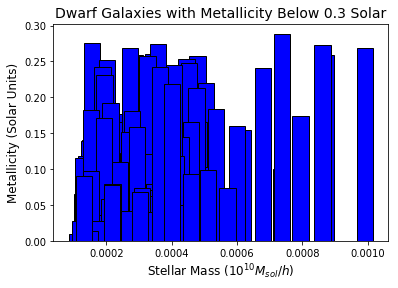

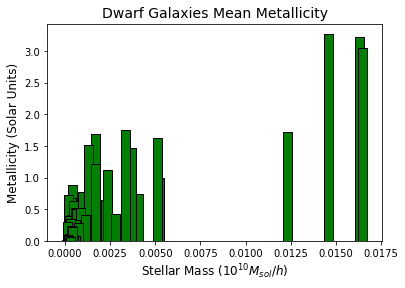

In [16]:
# This plots bar graphs of the stellar mass values that correspond to certain metallicities

plt.figure(1)
plt.bar(stellarmasscut,Z_cut,0.00005,color='blue',edgecolor='black')
plt.title('Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

plt.figure(2)
plt.bar(stellarmass,Z_dwarf,0.0005,color='green',edgecolor='black')
plt.title('Dwarf Galaxies Mean Metallicity',fontsize=14)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 12)
plt.ylabel('Metallicity (Solar Units)',fontsize = 12)

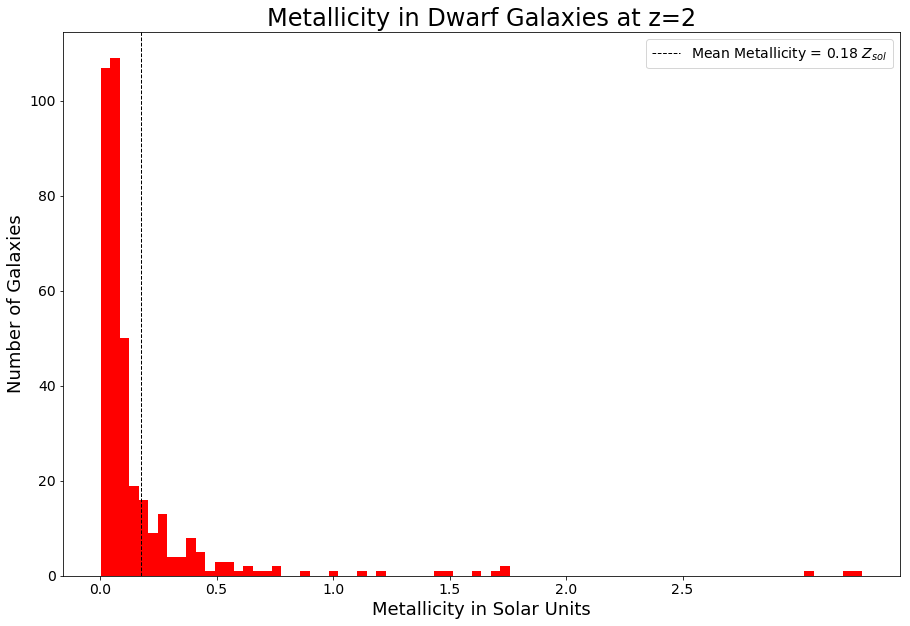

In [17]:
# This plots the metallicity in dwarf galaxies for all of the galaxies at a given redshift

plt.figure(figsize=(15,10))
plt.hist(Z_dwarf,color='red',bins=80)
plt.title('Metallicity in Dwarf Galaxies at z=2',fontsize = 24)
plt.xlabel('Metallicity in Solar Units',fontsize=18)
plt.xticks(numpy.arange(0,3,0.5),fontsize=14)
plt.axvline(x=0.17706673530296496,linewidth=1, color='k', linestyle='--',label='Mean Metallicity = 0.18 $Z_{sol}$')
plt.yticks(fontsize=14)
#plt.xlim(xmin=0,xmax=1)
plt.ylabel('Number of Galaxies',fontsize=18)
plt.legend(fontsize=14)

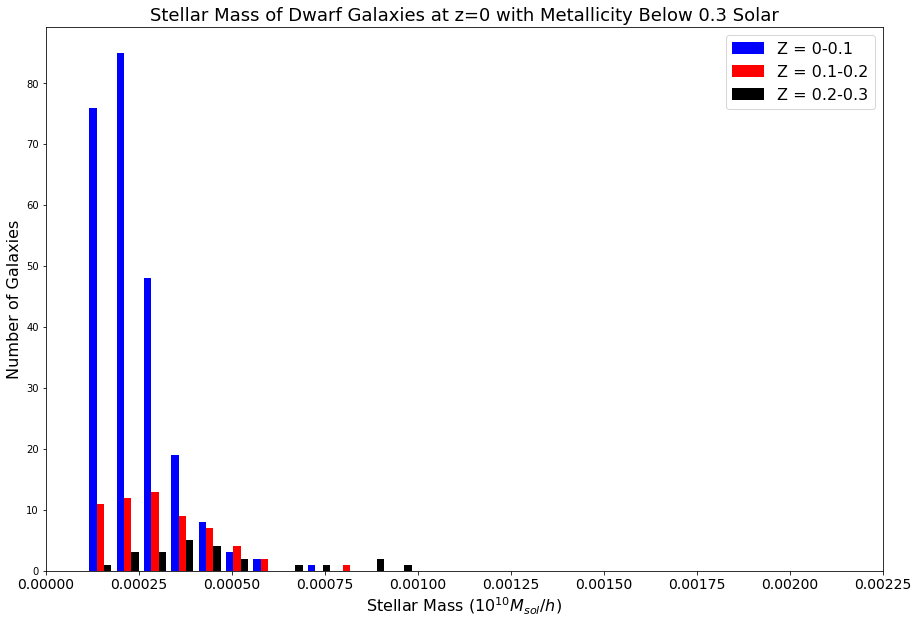

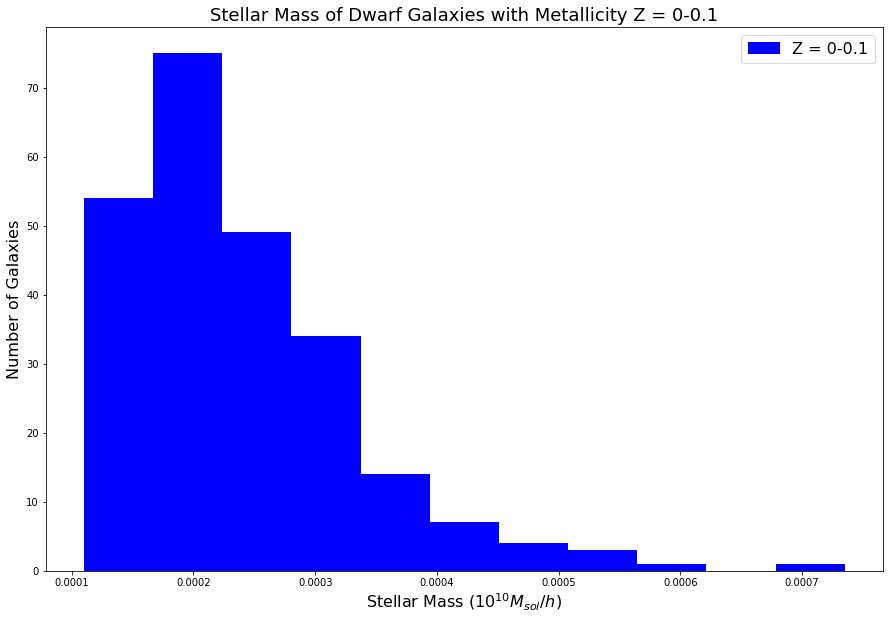

In [18]:
# This plots histograms of the stellar mass values that correspond to metallicity values below 0.3 solar

Z_0_1 = []
Z_1_2 = []
Z_2_3 = []
entry01 = []
entry12 = []
entry23 = []


# This loops over the metallicities and creates arrays with certain metallicity ranges
# It also stores the index values in separate arrays
# EX: Z_0_1 means metallicities with values of 0-0.1 solar
for i in range(0,len(Z_dwarf)):
    if Z_dwarf[i]>=0 and Z_dwarf[i]<=0.1:
        Z_0_1.append(Z_dwarf[i])
        entry01.append(i)
    if Z_dwarf[i]>=0.1 and Z_dwarf[i]<=0.2:
        Z_1_2.append(Z_dwarf[i])
        entry12.append(i)
    if Z_dwarf[i]>=0.2 and Z_dwarf[i]<=0.3:
        Z_2_3.append(Z_dwarf[i])
        entry23.append(i)
        
        
stellarmass01 = []
stellarmass12 = []
stellarmass23 = []

# This appends stellar mass values that correpond to the metallicity ranges
for j in entry01:
    stellarmass01.append(stellarmass[j])
for k in entry12:
    stellarmass12.append(stellarmass[k])
for l in entry23:
    stellarmass23.append(stellarmass[l])
    

colors = ['blue', 'red', 'black']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']

# This plots all three metallicity ranges
   
plt.figure(figsize=(15,10))
plt.hist([stellarmass01, stellarmass12, stellarmass23], bins = 12, color = colors, label=names)
plt.xticks(numpy.arange(0,0.0025,0.00025),fontsize=14)
#plt.yticks(numpy.arange(0,10,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies at z=0 with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})


# This plots metallicity ranges from 0-0.1 solar 

plt.figure(figsize=(15,10))
plt.hist(stellarmass01, bins = 11, color = colors[0], label=names[0])
#plt.xticks(numpy.arange(0,0.1,0.025),fontsize=14)
#plt.yticks(numpy.arange(0,6,1),fontsize=14)
plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0-0.1',fontsize=18)
plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

# This plots metallicity ranges form 0.1-0.2 solar

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass12, bins = 7, color = colors[1], label=names[1])
# #plt.xticks(numpy.arange(0.1,0.2,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,10,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.1-0.2',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

# This plots metallicity ranges from 0.2-0.3 solar

# plt.figure(figsize=(15,10))
# plt.hist(stellarmass23, bins = 9, color = colors[2], label=names[2])
# #plt.xticks(numpy.arange(0.2,0.3,0.025),fontsize=14)
# #plt.yticks(numpy.arange(0,8,1),fontsize=14)
# plt.title('Stellar Mass of Dwarf Galaxies with Metallicity Z = 0.2-0.3',fontsize=18)
# plt.xlabel(r'Stellar Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
# plt.ylabel('Number of Galaxies',fontsize = 16)
# plt.legend(prop={'size': 16})

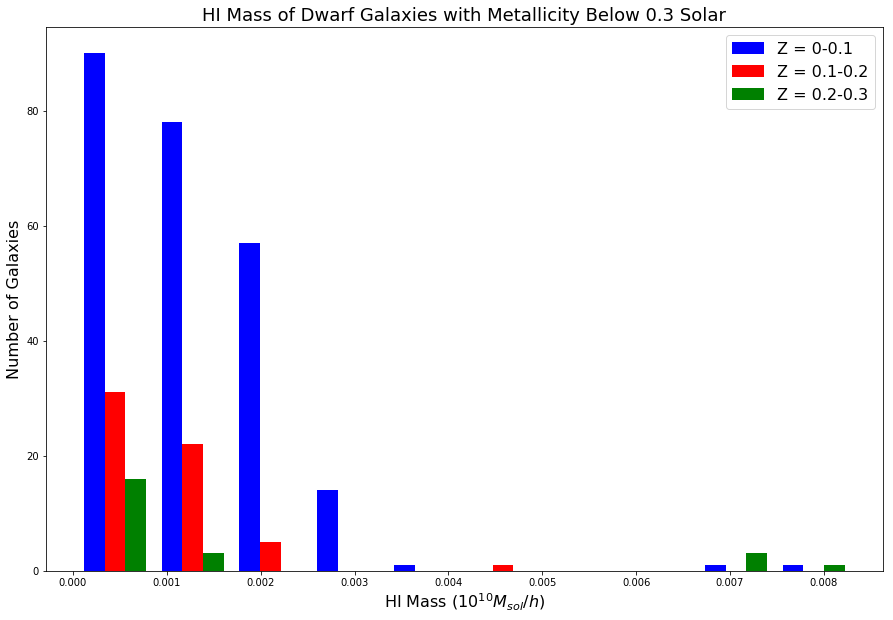

In [19]:
# This plots the HI masses for galaxies that have metallicity values below 0.3 solar

adjusted_HI_mass = []
for i in entry1:
    adjusted_HI_mass.append(hi_mass[i])

HImass01 = []
HImass12 = []
HImass23 = []


for j in entry01:
    HImass01.append(hi_mass[j])
for k in entry12:
    HImass12.append(hi_mass[k])
for l in entry23:
    HImass23.append(hi_mass[l])

#print(HImass01)
colors = ['blue', 'red', 'green']
names = ['Z = 0-0.1', 'Z = 0.1-0.2', 'Z = 0.2-0.3']
   
plt.figure(figsize=(15,10))
plt.hist([HImass01, HImass12, HImass23], bins = 10, color = colors, label=names)
#plt.xticks(numpy.arange(0,0.35,0.025),fontsize=14)
plt.title('HI Mass of Dwarf Galaxies with Metallicity Below 0.3 Solar',fontsize=18)
plt.xlabel(r'HI Mass ($10^{10} M_{sol}/h$)',fontsize = 16)
plt.ylabel('Number of Galaxies',fontsize = 16)
plt.legend(prop={'size': 16})

In [20]:
# These functions are taken from master.py script
# The only change made is the value of h to equal 0.704

def phistar(z) :
    phi0 = 0.0035
    phi1 = -2.2
    return phi0*(1+z)**phi1

def fracM(M, z) :
    M0 = 11.16
    M1 = 0.17
    M2 = -0.07

    hatM = 1e1**(M0 + M1*z + M2*z*z)
    return M/hatM

def phi(M,z=0.) :
    alpha0 = -1.18
    alpha1 = -0.082
    alpha = alpha0 + alpha1*z
    return math.log(10.) * phistar(z)*fracM(M,z)**(1.+alpha) * numpy.exp( -fracM(M,z))

def PanterZ(lgMstar) :

    logMc = 9.66
    Delta = 1.04
    A = -0.452
    B = 0.572
    out = numpy.tanh((lgMstar - logMc)/Delta)
    arg = A + B*out
    return 10**arg

def lamfit(Ptless,Zint):
# will return interpolated fit for lambda (fitting to O17 and Lamberts et al. 2016) given Z_HI or Z_dwarf (Zint) -- 
    Z = numpy.arange(0.001,1.,0.01)
    a = 3.9007870e-09
    b = 1.4792985e-07
    lamfit = a*((1./Z)**3) +b
    lamfit = lamfit/Ptless
    int = numpy.interp(Zint,Z,lamfit)
    ## now impose floor:
    lamint = numpy.minimum(int,1.5e-4*1.e1)
    print ("lamint=" + str(lamint))
    return lamint

def Richlambda(Zint):
# will read in file form Richard and return interpolated lambda values at Zint    
    #filename = "dat_lambda_factor.txt"  # old file don't use                     
    filename = "dat_lambda_M40cut.txt" # should have mass cut > 40 Msun           
    #filename = "dat_lambda.txt" # new file but doesn't have mass cut      

    data = loadtxt(filename,
              dtype=([('Z', 'float'), ('lambda', 'float'), ('av_mc', 'float'), ('V', 'float')]))

    lam = data["lambda"]/1.e-3
    Z = data["Z"]/0.0134

    lamint = numpy.interp(Zint,Z,lam)
    print ("lamint=" + str(lamint))
    return lamint

def TremontiZ(lgMstar, corr = 0.):
    lgZ = -1.492 + 1.847*lgMstar - 0.08026*(lgMstar**2) - 8.69 +corr
    return 10**lgZ

def AM13Z(lgMstar,OHasym,Mto,gamma):
    Mstar = 10**lgMstar
    lgZ = OHasym - numpy.log10(1.+(Mto/Mstar)**gamma) - 8.69
    return 10**lgZ

def LeeZ(lgMstar):
    lgZ = 5.65 + 0.298*lgMstar - 8.66
    return 10**lgZ

def mratedwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf):
    #lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)                                          
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()


def mratedwarfZP(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp) # leads to weird plot
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZAM13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum()

def mratedwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    #print "N_dwarf = " + str(Ndwarf)
    return (Zdwarf*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf).sum(), lmbda

def detectrdwarfZp(Mstar,SFRdwarf,Zdwarf,Ptless,dt,Zp,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zp)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zp)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZdwarf(Mstar,SFRdwarf,Zdwarf,Ptless,dt,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,Zdwarf)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/Zdwarf)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZAm13(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZAM13,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZAM13)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZAM13)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZTrem(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZTrem,dlgM,Mhdwarf,Phi_dwarf) :

#    lmbda = lamfit(Ptless,ZTrem)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZTrem)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)

def detectrdwarfZLee(Mstar,SFRdwarf,Zdwarf,Ptless,dt,ZLee,dlgM,Mhdwarf,Phi_dwarf) :
#    lmbda = lamfit(Ptless,ZLee)
    lmbda = Richlambda(Zdwarf)
#    lmbda = lamfit(Ptless,Zdwarf)

    Ndwarf = SFRdwarf*(1./Zdwarf)*lmbda*Ptless*dt
    return ((Zdwarf/ZLee)*Phi_dwarf*dlgM*(Mstar/Mhdwarf)*Ndwarf)


In [21]:
####--------Set parameters and return merger rate, detection rate, and plots --------

ZHI = 0.35
print ("Z_HI=" + str(ZHI))

M51 = 3.98e10  ## from Leroy et al. 2008                                        

SFRM51 = 0.1 ## Bigiel et al. 2010, C11
ZM51 = 0.1  # C11
dt = 10.e9  # Bigiel et al. 2010 - depletion time
                                                 
Ptless = 1.e-3  # the fraction of black holes that merge within Hubble time

dlgM = 0.1
lgMstar = numpy.arange(5, 9.89, dlgM)
Mstar =1e1**lgMstar

Phi_dwarf = phi(Mstar,z=0)
print(Phi_dwarf)
ZTrem = TremontiZ(lgMstar,corr=-0.26)
ZPanter = PanterZ(lgMstar)
ZLee = LeeZ(lgMstar)

## from Andrews & Martini 2013:
#Mto = 10**32.65
#OHasym = 16.988
#gamma = 0.373
### first row for MZR in Table 4:
#Mto = 10**8.901
#OHasym = 8.798
#gamma = 0.64
### second row:
Mto = 8.253
OHasym = 8.726
gamma = 0.734
ZAM13 = AM13Z(lgMstar,OHasym,Mto,gamma)

###----------dwarf galaxy parameters ---------------

print ("------dwarfs---------")

Mhdwarf = 2.5e8  ## from O17 h516
SFRdwarf = 0.01
Zdwarf = 0.1
## the bigger one h603
# Mhdwarf = 7.8e9
# SFRdwarf = 1.
# Zdwarf = 0.4

Z_HI=0.35
[0.1035341  0.09933067 0.09529788 0.09142882 0.08771684 0.08415555
 0.08073885 0.07746084 0.07431592 0.07129866 0.06840388 0.06562661
 0.06296207 0.06040567 0.05795304 0.05559993 0.0533423  0.05117628
 0.04909811 0.04710423 0.04519118 0.04335567 0.04159452 0.03990468
 0.0382832  0.03672728 0.03523418 0.03380128 0.03242606 0.03110606
 0.02983893 0.02862236 0.02745412 0.02633202 0.02525393 0.02421774
 0.02322136 0.0222627  0.02133968 0.02045018 0.01959202 0.01876295
 0.01796064 0.0171826  0.01642618 0.01568854 0.01496657 0.0142569
 0.01355583]
------dwarfs---------


In [22]:
# Obtaining all needed information from all_data array

StellarMass = []
converted_stellar_mass = []
HImass = []
VirialMass = []
Metallicity = []
StarFormation= []
HaloID = []
LHAT = []

for i in range(1,len(all_data)):
    StellarMass.append(all_data[i][1])
    converted_stellar_mass.append(all_data[i][1]*1e10*0.704)
    HImass.append(all_data[i][5])
    VirialMass.append(all_data[i][3])
    Metallicity.append(all_data[i][7])
    StarFormation.append(all_data[i][8])
    HaloID.append(all_data[i][0])
    LHAT.append(all_data[i][6])

In [23]:
# This loops over all galaxies in the all_data array and calculates the merger rates and detection rates below
# It stores the merger rate and detection rate of Zdwarf as well as lambda into an array

MRATEDDWARFZDWARF = []
DRATEDDWARFZDWARF = []
DRATEDDWARFZLEE = []
DRATEDDWARFZP = []
DRATEDDWARFZAM13 = []
DRATEDDWARFZTREM = []
LAMBDA = []

for i in range(0,len(Metallicity)):
    
    print('---------------------------------HALO  '+str(HaloID[i])+'----------------------------------------')

    MratedwarfZP= mratedwarfZP(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Panter = " + str(MratedwarfZP*1e3**3/dt)) # conversion to Gpc-3 and rate                                                                  
    print('')
    #MRATEDDWARFZP.append(MratedwarfZP*1e3**3/dt)
    
    MratedwarfZAM13= mratedwarfZAM13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w AM13 = " + str(MratedwarfZAM13*1e3**3/dt)) 
    print('')
    
    MratedwarfZTrem= mratedwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Tremonti = " + str(MratedwarfZTrem*1e3**3/dt))
    print('')
    
    DratedwarfZP = detectrdwarfZp(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZPanter,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Panter = " + str(DratedwarfZP.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZP.append(DratedwarfZP.sum()*1e3**3/dt)
    
    MratedwarfZdwarf, Lambda = mratedwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("merger rate dwarfs per cubic Gpc w Zdwarf = " + str(MratedwarfZdwarf*1e3**3/dt)) 
    print('')
    MRATEDDWARFZDWARF.append(MratedwarfZdwarf*1e3**3/dt)
    LAMBDA.append(Lambda)
    
    
    DratedwarfZdwarf = detectrdwarfZdwarf(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Zdwarf = " + str(DratedwarfZdwarf.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZDWARF.append(DratedwarfZdwarf.sum()*1e3**3/dt)
    
    DratedwarfZAM13 = detectrdwarfZAm13(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZAM13,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with AM13 = " + str(DratedwarfZAM13.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZAM13.append(DratedwarfZAM13.sum()*1e3**3/dt)
    
    DratedwarfZTrem = detectrdwarfZTrem(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZTrem,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Tremonti = " + str(DratedwarfZTrem.sum()*1e3**3/dt))
    print('')
    DRATEDDWARFZTREM.append(DratedwarfZTrem.sum()*1e3**3/dt)
    
    DratedwarfZLee = detectrdwarfZLee(Mstar,StarFormation[i],Metallicity[i],Ptless,dt,ZLee,dlgM,converted_stellar_mass[i],Phi_dwarf)
    print ("detection rate dwarfs per cubic Gpc with Lee = " + str(DratedwarfZLee.sum()*1e3**3/dt))
    DRATEDDWARFZLEE.append(DratedwarfZLee.sum()*1e3**3/dt)
    print('')
    print('')
    print('')
    print('')
    
    

---------------------------------HALO  37867----------------------------------------
lamint=0.0003522581224786889
merger rate dwarfs per cubic Gpc w Panter = 2.391441849361227

lamint=0.0003522581224786889
merger rate dwarfs per cubic Gpc w AM13 = 2.391441849361227

lamint=0.0003522581224786889
merger rate dwarfs per cubic Gpc w Tremonti = 2.391441849361227

lamint=0.0003522581224786889
detection rate dwarfs per cubic Gpc with Panter = 10.382484324347299

lamint=0.0003522581224786889
merger rate dwarfs per cubic Gpc w Zdwarf = 2.391441849361227

lamint=0.0003522581224786889
detection rate dwarfs per cubic Gpc with Zdwarf = 13.383579637823788

lamint=0.0003522581224786889
detection rate dwarfs per cubic Gpc with AM13 = 2.2012053029003553

lamint=0.0003522581224786889
detection rate dwarfs per cubic Gpc with Tremonti = 5.905458548998116

lamint=0.0003522581224786889
detection rate dwarfs per cubic Gpc with Lee = 4.4768415082418835




---------------------------------HALO  127954--------

lamint=0.000365253230128962
merger rate dwarfs per cubic Gpc w Tremonti = 35.442952524836215

lamint=0.000365253230128962
detection rate dwarfs per cubic Gpc with Panter = 153.8761643298956

lamint=0.000365253230128962
merger rate dwarfs per cubic Gpc w Zdwarf = 35.442952524836215

lamint=0.000365253230128962
detection rate dwarfs per cubic Gpc with Zdwarf = 212.62345725758402

lamint=0.000365253230128962
detection rate dwarfs per cubic Gpc with AM13 = 32.62350496582388

lamint=0.000365253230128962
detection rate dwarfs per cubic Gpc with Tremonti = 87.5233019132102

lamint=0.000365253230128962
detection rate dwarfs per cubic Gpc with Lee = 66.35013144066872




---------------------------------HALO  628674----------------------------------------
lamint=0.0004141075656273223
merger rate dwarfs per cubic Gpc w Panter = 28.945422030035314

lamint=0.0004141075656273223
merger rate dwarfs per cubic Gpc w AM13 = 28.945422030035314

lamint=0.0004141075656273223
merger rate dwarfs per cubic G

lamint=0.0004424260144681967
merger rate dwarfs per cubic Gpc w AM13 = 18.95150247377603

lamint=0.0004424260144681967
merger rate dwarfs per cubic Gpc w Tremonti = 18.95150247377603

lamint=0.0004424260144681967
detection rate dwarfs per cubic Gpc with Panter = 82.2782612963664

lamint=0.0004424260144681967
merger rate dwarfs per cubic Gpc w Zdwarf = 18.95150247377603

lamint=0.0004424260144681967
detection rate dwarfs per cubic Gpc with Zdwarf = 193.89781335163536

lamint=0.0004424260144681967
detection rate dwarfs per cubic Gpc with AM13 = 17.44393147353665

lamint=0.0004424260144681967
detection rate dwarfs per cubic Gpc with Tremonti = 46.799094165728356

lamint=0.0004424260144681967
detection rate dwarfs per cubic Gpc with Lee = 35.47770686576029




---------------------------------HALO  242367----------------------------------------
lamint=0.00022719437267628415
merger rate dwarfs per cubic Gpc w Panter = 3.571772540935041

lamint=0.00022719437267628415
merger rate dwarfs per c

lamint=0.0004028444270874312
detection rate dwarfs per cubic Gpc with Zdwarf = 215.1329644696478

lamint=0.0004028444270874312
detection rate dwarfs per cubic Gpc with AM13 = 13.076571854940408

lamint=0.0004028444270874312
detection rate dwarfs per cubic Gpc with Tremonti = 35.08221289063546

lamint=0.0004028444270874312
detection rate dwarfs per cubic Gpc with Lee = 26.595311027358026




---------------------------------HALO  285937----------------------------------------
lamint=0.0004302906495418581
merger rate dwarfs per cubic Gpc w Panter = 73.06034108673404

lamint=0.0004302906495418581
merger rate dwarfs per cubic Gpc w AM13 = 73.06034108673404

lamint=0.0004302906495418581
merger rate dwarfs per cubic Gpc w Tremonti = 73.06034108673404

lamint=0.0004302906495418581
detection rate dwarfs per cubic Gpc with Panter = 317.192678662497

lamint=0.0004302906495418581
merger rate dwarfs per cubic Gpc w Zdwarf = 73.06034108673404

lamint=0.0004302906495418581
detection rate dwarfs per 

lamint=0.0
detection rate dwarfs per cubic Gpc with AM13 = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Tremonti = 0.0

lamint=0.0
detection rate dwarfs per cubic Gpc with Lee = 0.0




---------------------------------HALO  345537----------------------------------------
lamint=0.00045302267232349703
merger rate dwarfs per cubic Gpc w Panter = 36.90355398893006

lamint=0.00045302267232349703
merger rate dwarfs per cubic Gpc w AM13 = 36.90355398893006

lamint=0.00045302267232349703
merger rate dwarfs per cubic Gpc w Tremonti = 36.90355398893006

lamint=0.00045302267232349703
detection rate dwarfs per cubic Gpc with Panter = 160.21738973294003

lamint=0.00045302267232349703
merger rate dwarfs per cubic Gpc w Zdwarf = 36.90355398893006

lamint=0.00045302267232349703
detection rate dwarfs per cubic Gpc with Zdwarf = 1109.824913829344

lamint=0.00045302267232349703
detection rate dwarfs per cubic Gpc with AM13 = 33.96791720359005

lamint=0.00045302267232349703
detection rate dwa

lamint=0.0010228976806078713
merger rate dwarfs per cubic Gpc w Zdwarf = 27.009103270626888

lamint=0.0010228976806078713
detection rate dwarfs per cubic Gpc with Zdwarf = 2712.164998155535

lamint=0.0010228976806078713
detection rate dwarfs per cubic Gpc with AM13 = 24.860559064719677

lamint=0.0010228976806078713
detection rate dwarfs per cubic Gpc with Tremonti = 66.69664154823609

lamint=0.0010228976806078713
detection rate dwarfs per cubic Gpc with Lee = 50.56174569104893




---------------------------------HALO  755186----------------------------------------
lamint=0.0005013419293012022
merger rate dwarfs per cubic Gpc w Panter = 20.37878220582912

lamint=0.0005013419293012022
merger rate dwarfs per cubic Gpc w AM13 = 20.37878220582912

lamint=0.0005013419293012022
merger rate dwarfs per cubic Gpc w Tremonti = 20.37878220582912

lamint=0.0005013419293012022
detection rate dwarfs per cubic Gpc with Panter = 88.47481984888064

lamint=0.0005013419293012022
merger rate dwarfs per cu

detection rate dwarfs per cubic Gpc with Lee = 17.318388350273914




---------------------------------HALO  426358----------------------------------------
lamint=0.00044250931320306006
merger rate dwarfs per cubic Gpc w Panter = 18.87575825190682

lamint=0.00044250931320306006
merger rate dwarfs per cubic Gpc w AM13 = 18.87575825190682

lamint=0.00044250931320306006
merger rate dwarfs per cubic Gpc w Tremonti = 18.87575825190682

lamint=0.00044250931320306006
detection rate dwarfs per cubic Gpc with Panter = 81.94941650491681

lamint=0.00044250931320306006
merger rate dwarfs per cubic Gpc w Zdwarf = 18.87575825190682

lamint=0.00044250931320306006
detection rate dwarfs per cubic Gpc with Zdwarf = 193.02797910643568

lamint=0.00044250931320306006
detection rate dwarfs per cubic Gpc with AM13 = 17.374212620499478

lamint=0.00044250931320306006
detection rate dwarfs per cubic Gpc with Tremonti = 46.61205036924456

lamint=0.00044250931320306006
detection rate dwarfs per cubic Gpc with Lee

lamint=0.00023742244707759537
merger rate dwarfs per cubic Gpc w Zdwarf = 26.709777640613392

lamint=0.00023742244707759537
detection rate dwarfs per cubic Gpc with Zdwarf = 68.84953465115187

lamint=0.00023742244707759537
detection rate dwarfs per cubic Gpc with AM13 = 24.58504445655319

lamint=0.00023742244707759537
detection rate dwarfs per cubic Gpc with Tremonti = 65.95748282640908

lamint=0.00023742244707759537
detection rate dwarfs per cubic Gpc with Lee = 50.00140030557237




---------------------------------HALO  454602----------------------------------------
lamint=0.0004947893833991256
merger rate dwarfs per cubic Gpc w Panter = 15.41268405312453

lamint=0.0004947893833991256
merger rate dwarfs per cubic Gpc w AM13 = 15.41268405312453

lamint=0.0004947893833991256
merger rate dwarfs per cubic Gpc w Tremonti = 15.41268405312453

lamint=0.0004947893833991256
detection rate dwarfs per cubic Gpc with Panter = 66.91442261931903

lamint=0.0004947893833991256
merger rate dwarfs pe

lamint=0.0009369189229571607
merger rate dwarfs per cubic Gpc w Tremonti = 46.404192608128476

lamint=0.0009369189229571607
detection rate dwarfs per cubic Gpc with Panter = 201.46456936286233

lamint=0.0009369189229571607
merger rate dwarfs per cubic Gpc w Zdwarf = 46.404192608128476

lamint=0.0009369189229571607
detection rate dwarfs per cubic Gpc with Zdwarf = 4293.890688727665

lamint=0.0009369189229571607
detection rate dwarfs per cubic Gpc with AM13 = 42.71279055901178

lamint=0.0009369189229571607
detection rate dwarfs per cubic Gpc with Tremonti = 114.59113505947268

lamint=0.0009369189229571607
detection rate dwarfs per cubic Gpc with Lee = 86.86985873397295




---------------------------------HALO  276128----------------------------------------
lamint=0.00031082602846076504
merger rate dwarfs per cubic Gpc w Panter = 29.7371547991867

lamint=0.00031082602846076504
merger rate dwarfs per cubic Gpc w AM13 = 29.7371547991867

lamint=0.00031082602846076504
merger rate dwarfs per

lamint=0.0003268803467383609
detection rate dwarfs per cubic Gpc with Tremonti = 36.785012845760605

lamint=0.0003268803467383609
detection rate dwarfs per cubic Gpc with Lee = 27.886178697681434




---------------------------------HALO  136102----------------------------------------
lamint=0.00030380464720437166
merger rate dwarfs per cubic Gpc w Panter = 2.0442893649526375

lamint=0.00030380464720437166
merger rate dwarfs per cubic Gpc w AM13 = 2.0442893649526375

lamint=0.00030380464720437166
merger rate dwarfs per cubic Gpc w Tremonti = 2.0442893649526375

lamint=0.00030380464720437166
detection rate dwarfs per cubic Gpc with Panter = 8.875316074158343

lamint=0.00030380464720437166
merger rate dwarfs per cubic Gpc w Zdwarf = 2.0442893649526375

lamint=0.00030380464720437166
detection rate dwarfs per cubic Gpc with Zdwarf = 6.562905355987338

lamint=0.00030380464720437166
detection rate dwarfs per cubic Gpc with AM13 = 1.8816684135549873

lamint=0.00030380464720437166
detection ra

lamint=0.00042714228140152956
detection rate dwarfs per cubic Gpc with Panter = 79.27787890793172

lamint=0.00042714228140152956
merger rate dwarfs per cubic Gpc w Zdwarf = 18.260411615014714

lamint=0.00042714228140152956
detection rate dwarfs per cubic Gpc with Zdwarf = 476.872408403512

lamint=0.00042714228140152956
detection rate dwarfs per cubic Gpc with AM13 = 16.807816126012025

lamint=0.00042714228140152956
detection rate dwarfs per cubic Gpc with Tremonti = 45.09250513823577

lamint=0.00042714228140152956
detection rate dwarfs per cubic Gpc with Lee = 34.183966755250985




---------------------------------HALO  334135----------------------------------------
lamint=0.00037790050834098375
merger rate dwarfs per cubic Gpc w Panter = 22.762550714320476

lamint=0.00037790050834098375
merger rate dwarfs per cubic Gpc w AM13 = 22.762550714320476

lamint=0.00037790050834098375
merger rate dwarfs per cubic Gpc w Tremonti = 22.762550714320476

lamint=0.00037790050834098375
detection ra

lamint=0.000409154525794754
detection rate dwarfs per cubic Gpc with AM13 = 7.670400386767142

lamint=0.000409154525794754
detection rate dwarfs per cubic Gpc with Tremonti = 20.57837652789037

lamint=0.000409154525794754
detection rate dwarfs per cubic Gpc with Lee = 15.600165414406243




---------------------------------HALO  643904----------------------------------------
lamint=0.00046807055669857917
merger rate dwarfs per cubic Gpc w Panter = 34.40310950572652

lamint=0.00046807055669857917
merger rate dwarfs per cubic Gpc w AM13 = 34.40310950572652

lamint=0.00046807055669857917
merger rate dwarfs per cubic Gpc w Tremonti = 34.40310950572652

lamint=0.00046807055669857917
detection rate dwarfs per cubic Gpc with Panter = 149.36166867173347

lamint=0.00046807055669857917
merger rate dwarfs per cubic Gpc w Zdwarf = 34.40310950572652

lamint=0.00046807055669857917
detection rate dwarfs per cubic Gpc with Zdwarf = 1112.0215702900423

lamint=0.00046807055669857917
detection rate dwarf

lamint=0.0004024427601218578
merger rate dwarfs per cubic Gpc w Tremonti = 41.10729899886405

lamint=0.0004024427601218578
detection rate dwarfs per cubic Gpc with Panter = 178.46801818993177

lamint=0.0004024427601218578
merger rate dwarfs per cubic Gpc w Zdwarf = 41.10729899886405

lamint=0.0004024427601218578
detection rate dwarfs per cubic Gpc with Zdwarf = 742.1691630181939

lamint=0.0004024427601218578
detection rate dwarfs per cubic Gpc with AM13 = 37.8372589608982

lamint=0.0004024427601218578
detection rate dwarfs per cubic Gpc with Tremonti = 101.51091500046546

lamint=0.0004024427601218578
detection rate dwarfs per cubic Gpc with Lee = 76.95393576012764




---------------------------------HALO  537542----------------------------------------
lamint=0.0004273307567205464
merger rate dwarfs per cubic Gpc w Panter = 34.54542574702277

lamint=0.0004273307567205464
merger rate dwarfs per cubic Gpc w AM13 = 34.54542574702277

lamint=0.0004273307567205464
merger rate dwarfs per cub

lamint=0.00043851319337967205
merger rate dwarfs per cubic Gpc w Zdwarf = 154.09088604024672

lamint=0.00043851319337967205
detection rate dwarfs per cubic Gpc with Zdwarf = 1613.8037293350392

lamint=0.00043851319337967205
detection rate dwarfs per cubic Gpc with AM13 = 141.83312697777058

lamint=0.00043851319337967205
detection rate dwarfs per cubic Gpc with Tremonti = 380.5140988613759

lamint=0.00043851319337967205
detection rate dwarfs per cubic Gpc with Lee = 288.46215719232663




---------------------------------HALO  327304----------------------------------------
lamint=0.0004582726903956283
merger rate dwarfs per cubic Gpc w Panter = 5.8147299867827655

lamint=0.0004582726903956283
merger rate dwarfs per cubic Gpc w AM13 = 5.8147299867827655

lamint=0.0004582726903956283
merger rate dwarfs per cubic Gpc w Tremonti = 5.8147299867827655

lamint=0.0004582726903956283
detection rate dwarfs per cubic Gpc with Panter = 25.24474636680373

lamint=0.0004582726903956283
merger rate dwa

lamint=0.00040755921536349716
detection rate dwarfs per cubic Gpc with Zdwarf = 300.850684846882

lamint=0.00040755921536349716
detection rate dwarfs per cubic Gpc with AM13 = 14.590885280290555

lamint=0.00040755921536349716
detection rate dwarfs per cubic Gpc with Tremonti = 39.14485763886206

lamint=0.00040755921536349716
detection rate dwarfs per cubic Gpc with Lee = 29.675142422531792




---------------------------------HALO  594414----------------------------------------
lamint=0.0004185721524920654
merger rate dwarfs per cubic Gpc w Panter = 47.130721563092564

lamint=0.0004185721524920654
merger rate dwarfs per cubic Gpc w AM13 = 47.130721563092564

lamint=0.0004185721524920654
merger rate dwarfs per cubic Gpc w Tremonti = 47.130721563092564

lamint=0.0004185721524920654
detection rate dwarfs per cubic Gpc with Panter = 204.6188068318244

lamint=0.0004185721524920654
merger rate dwarfs per cubic Gpc w Zdwarf = 47.130721563092564

lamint=0.0004185721524920654
detection rate dwa

lamint=0.000485475168584918
detection rate dwarfs per cubic Gpc with Lee = 59.323381163915464




---------------------------------HALO  587947----------------------------------------
lamint=0.000510662383010929
merger rate dwarfs per cubic Gpc w Panter = 4.312875333498181

lamint=0.000510662383010929
merger rate dwarfs per cubic Gpc w AM13 = 4.312875333498181

lamint=0.000510662383010929
merger rate dwarfs per cubic Gpc w Tremonti = 4.312875333498181

lamint=0.000510662383010929
detection rate dwarfs per cubic Gpc with Panter = 18.72441956088945

lamint=0.000510662383010929
merger rate dwarfs per cubic Gpc w Zdwarf = 4.312875333498181

lamint=0.000510662383010929
detection rate dwarfs per cubic Gpc with Zdwarf = 249.49636973146005

lamint=0.000510662383010929
detection rate dwarfs per cubic Gpc with AM13 = 3.9697908846832863

lamint=0.000510662383010929
detection rate dwarfs per cubic Gpc with Tremonti = 10.650272142629372

lamint=0.000510662383010929
detection rate dwarfs per cubic G

lamint=0.00041023756267436043
merger rate dwarfs per cubic Gpc w AM13 = 3.529172068284021

lamint=0.00041023756267436043
merger rate dwarfs per cubic Gpc w Tremonti = 3.529172068284021

lamint=0.00041023756267436043
detection rate dwarfs per cubic Gpc with Panter = 15.321958878770328

lamint=0.00041023756267436043
merger rate dwarfs per cubic Gpc w Zdwarf = 3.529172068284021

lamint=0.00041023756267436043
detection rate dwarfs per cubic Gpc with Zdwarf = 44.57379774369344

lamint=0.00041023756267436043
detection rate dwarfs per cubic Gpc with AM13 = 3.2484303449107963

lamint=0.00041023756267436043
detection rate dwarfs per cubic Gpc with Tremonti = 8.71498479760239

lamint=0.00041023756267436043
detection rate dwarfs per cubic Gpc with Lee = 6.6067021488488




---------------------------------HALO  355726----------------------------------------
lamint=0.0003120987378491804
merger rate dwarfs per cubic Gpc w Panter = 2.120689087769224

lamint=0.0003120987378491804
merger rate dwarfs p

lamint=0.0003465797657180332
merger rate dwarfs per cubic Gpc w Panter = 28.478886087982715

lamint=0.0003465797657180332
merger rate dwarfs per cubic Gpc w AM13 = 28.478886087982715

lamint=0.0003465797657180332
merger rate dwarfs per cubic Gpc w Tremonti = 28.478886087982715

lamint=0.0003465797657180332
detection rate dwarfs per cubic Gpc with Panter = 123.64155476426565

lamint=0.0003465797657180332
merger rate dwarfs per cubic Gpc w Zdwarf = 28.478886087982715

lamint=0.0003465797657180332
detection rate dwarfs per cubic Gpc with Zdwarf = 154.84010659148095

lamint=0.0003465797657180332
detection rate dwarfs per cubic Gpc with AM13 = 26.213422289280054

lamint=0.0003465797657180332
detection rate dwarfs per cubic Gpc with Tremonti = 70.32614293303575

lamint=0.0003465797657180332
detection rate dwarfs per cubic Gpc with Lee = 53.31321745549798




---------------------------------HALO  338622----------------------------------------
lamint=0.00036703697222732263
merger rate dwarfs 

---------------------------------HALO  128578----------------------------------------
lamint=0.00041171021286819646
merger rate dwarfs per cubic Gpc w Panter = 8.398502745988903

lamint=0.00041171021286819646
merger rate dwarfs per cubic Gpc w AM13 = 8.398502745988903

lamint=0.00041171021286819646
merger rate dwarfs per cubic Gpc w Tremonti = 8.398502745988903

lamint=0.00041171021286819646
detection rate dwarfs per cubic Gpc with Panter = 36.46223851585963

lamint=0.00041171021286819646
merger rate dwarfs per cubic Gpc w Zdwarf = 8.398502745988903

lamint=0.00041171021286819646
detection rate dwarfs per cubic Gpc with Zdwarf = 104.94817317622419

lamint=0.00041171021286819646
detection rate dwarfs per cubic Gpc with AM13 = 7.730411168405349

lamint=0.00041171021286819646
detection rate dwarfs per cubic Gpc with Tremonti = 20.73937522391861

lamint=0.00041171021286819646
detection rate dwarfs per cubic Gpc with Lee = 15.72221616443214




---------------------------------HALO  245659-

lamint=0.00041964113117759554
merger rate dwarfs per cubic Gpc w AM13 = 31.67887371680083

lamint=0.00041964113117759554
merger rate dwarfs per cubic Gpc w Tremonti = 31.67887371680083

lamint=0.00041964113117759554
detection rate dwarfs per cubic Gpc with Panter = 137.53435395701365

lamint=0.00041964113117759554
merger rate dwarfs per cubic Gpc w Zdwarf = 31.67887371680083

lamint=0.00041964113117759554
detection rate dwarfs per cubic Gpc with Zdwarf = 653.5496240728716

lamint=0.00041964113117759554
detection rate dwarfs per cubic Gpc with AM13 = 29.158854451743654

lamint=0.00041964113117759554
detection rate dwarfs per cubic Gpc with Tremonti = 78.22823526463053

lamint=0.00041964113117759554
detection rate dwarfs per cubic Gpc with Lee = 59.30367774888961




---------------------------------HALO  616512----------------------------------------
lamint=0.0004895922657757376
merger rate dwarfs per cubic Gpc w Panter = 148.34186247952894

lamint=0.0004895922657757376
merger rate dwar

lamint=0.0003734842578928964
merger rate dwarfs per cubic Gpc w Tremonti = 23.95538269169694

lamint=0.0003734842578928964
detection rate dwarfs per cubic Gpc with Panter = 104.0026899866782

lamint=0.0003734842578928964
merger rate dwarfs per cubic Gpc w Zdwarf = 23.95538269169694

lamint=0.0003734842578928964
detection rate dwarfs per cubic Gpc with Zdwarf = 150.56966777524906

lamint=0.0003734842578928964
detection rate dwarfs per cubic Gpc with AM13 = 22.049758570569253

lamint=0.0003734842578928964
detection rate dwarfs per cubic Gpc with Tremonti = 59.15574302966653

lamint=0.0003734842578928964
detection rate dwarfs per cubic Gpc with Lee = 44.84510112953568




---------------------------------HALO  540060----------------------------------------
lamint=0.00036037585858797846
merger rate dwarfs per cubic Gpc w Panter = 21.41416321521197

lamint=0.00036037585858797846
merger rate dwarfs per cubic Gpc w AM13 = 21.41416321521197

lamint=0.00036037585858797846
merger rate dwarfs per

detection rate dwarfs per cubic Gpc with Panter = 105.6945571611909

lamint=0.0004967413853873224
merger rate dwarfs per cubic Gpc w Zdwarf = 24.345077666261183

lamint=0.0004967413853873224
detection rate dwarfs per cubic Gpc with Zdwarf = 1161.6957270806415

lamint=0.0004967413853873224
detection rate dwarfs per cubic Gpc with AM13 = 22.40845374216774

lamint=0.0004967413853873224
detection rate dwarfs per cubic Gpc with Tremonti = 60.11806102190902

lamint=0.0004967413853873224
detection rate dwarfs per cubic Gpc with Lee = 45.574620284746786




---------------------------------HALO  393680----------------------------------------
lamint=0.0004248165618393444
merger rate dwarfs per cubic Gpc w Panter = 44.95153867987605

lamint=0.0004248165618393444
merger rate dwarfs per cubic Gpc w AM13 = 44.95153867987605

lamint=0.0004248165618393444
merger rate dwarfs per cubic Gpc w Tremonti = 44.95153867987605

lamint=0.0004248165618393444
detection rate dwarfs per cubic Gpc with Panter = 195

merger rate dwarfs per cubic Gpc w Zdwarf = 43.34238467624121

lamint=0.0004799379137949727
detection rate dwarfs per cubic Gpc with Zdwarf = 1568.3565427406731

lamint=0.0004799379137949727
detection rate dwarfs per cubic Gpc with AM13 = 39.89454605186106

lamint=0.0004799379137949727
detection rate dwarfs per cubic Gpc with Tremonti = 107.03026552313685

lamint=0.0004799379137949727
detection rate dwarfs per cubic Gpc with Lee = 81.1380744368141




---------------------------------HALO  73322----------------------------------------
lamint=0.000326824561381421
merger rate dwarfs per cubic Gpc w Panter = 55.61248377586953

lamint=0.000326824561381421
merger rate dwarfs per cubic Gpc w AM13 = 55.61248377586953

lamint=0.000326824561381421
merger rate dwarfs per cubic Gpc w Tremonti = 55.61248377586953

lamint=0.000326824561381421
detection rate dwarfs per cubic Gpc with Panter = 241.44251769919092

lamint=0.000326824561381421
merger rate dwarfs per cubic Gpc w Zdwarf = 55.6124837758695

In [24]:
# This creates a text file of all merger rate and detection rate values for dwarves at this redshift

with open("dwarf_merger_rate_z=2.txt", "w") as myfile:
    for i in range(0,len(Metallicity)):
        ids = HaloID[i],VirialMass[i],StellarMass[i],HImass[i], Metallicity[i], StarFormation[i], MRATEDDWARFZDWARF[i], DRATEDDWARFZDWARF[i]
        myfile.write(str(ids)+'\n')

In [25]:
# This finds the merger rate and detection rate of galaxies that have metallicities below 0.3 solar
# It creates arrays for the merger rate, detection rate, and index value that these galaxies reside in

merger_rate_lowz = []
detection_rate_lowz = []
detect_LEE = []
detect_ZP = []
detect_ZAM13 = []
detect_Ztrem = []
sfr_lowz = []
entry2 = []

for i in range(0,len(MRATEDDWARFZDWARF)):
    if Metallicity[i]<=0.3:
        merger_rate_lowz.append(MRATEDDWARFZDWARF[i])
        detection_rate_lowz.append(DRATEDDWARFZDWARF[i])
        detect_LEE.append(DRATEDDWARFZLEE[i])
        detect_ZP.append(DRATEDDWARFZP[i])
        detect_ZAM13.append(DRATEDDWARFZAM13[i])
        detect_Ztrem.append(DRATEDDWARFZTREM[i])
        sfr_lowz.append(StarFormation[i])
        entry2.append(i)

newHaloID = []
newVirialMass = []
newStellarMass = []
newHImass = []
newMetallicity = []
newStarFormation = []
newMRATEDDWARFZDWARF = []
newDRATEDDWARFZDWARF = []
newLAMBDA = []

HaloID = numpy.array(HaloID)
VirialMass = numpy.array(VirialMass)
StellarMass = numpy.array(StellarMass)
HImass = numpy.array(HImass)
Metallicity = numpy.array(Metallicity)
StarFormation = numpy.array(StarFormation)
MRATEDDWARFZDWARF = numpy.array(MRATEDDWARFZDWARF)
DRATEDDWARFZDWARF = numpy.array(DRATEDDWARFZDWARF)
LAMBDA = numpy.array(LAMBDA)

# This loops over the indices that include galaxies with metallicities below 0.3 solar and extracts the following information and stores them into new arrays
for i in entry2:
    newHaloID.append(HaloID[i])
    newVirialMass.append(VirialMass[i])
    newStellarMass.append(StellarMass[i])
    newHImass.append(HImass[i])
    newMetallicity.append(Metallicity[i])
    newStarFormation.append(StarFormation[i])
    newMRATEDDWARFZDWARF.append(MRATEDDWARFZDWARF[i]) 
    newDRATEDDWARFZDWARF.append(DRATEDDWARFZDWARF[i])
    newLAMBDA.append(LAMBDA[i])
    
    
#print(newHaloID)
    
print(numpy.max(detection_rate_lowz))
        
print(numpy.mean(merger_rate_lowz))
print('')
print(numpy.mean(detection_rate_lowz))
print('')
print('Zdwarf :',numpy.sum(detection_rate_lowz))
print('')
print('Lee: ',numpy.sum(detect_LEE))
print('')
print('ZP: ', numpy.sum(detect_ZP))
print('')
print('ZAM13: ',numpy.sum(detect_ZAM13))
print('')
print('Ztrem: ', numpy.sum(detect_Ztrem))
print(numpy.mean(sfr_lowz))
    
    


46223.579971376705
34.81009293561357

1217.8476967299493

Zdwarf : 394582.6537405036

Lee:  21113.59017845172

ZP:  48965.66444331316

ZAM13:  10381.28032419988

Ztrem:  27851.205228023813
0.002674930050154321


In [ ]:
def density_weighted_average(halo_ids,Lhat):

    final = []

    for a in range(0,len(halo_ids)):

        f = h5py.File('/Users/sandyspicer/Desktop/RIT/Illustris-3/groups_135/illustris_api/dwarf/cutout_'+str(halo_ids[a])+'.hdf5', 'r')

        xyz = numpy.array([0,1,2], dtype=numpy.int32)
        newxyz = [xyz for i,xyz in enumerate(xyz) if i!=Lhat[a].argmax()]

        x = f['PartType0']['Coordinates'][:,newxyz[0]]
        y = f['PartType0']['Coordinates'][:,newxyz[1]]

        met = f['PartType0']['GFM_Metallicity'][:]/0.0127
        

        density = f['PartType0']['Density'][:]
        numbins = 100

        xmax = max(x)
        xmin = min(x)
        xstep = (xmax-xmin)/numbins

        ymax = max(y)
        ymin = min(y)
        ystep = (ymax-ymin)/numbins


        pz = numpy.zeros((100,100))
        p = pz.copy()


        # Position of particle - min position divided by step size

        for b in range(0,len(x)):

            i = int((x[b]-xmin)/xstep) - 1
            j = int((y[b]-ymin)/ystep) - 1

            #print(i,j)

            pz[i,j] += density[b]*met[b]

            if density[b]<1e-10:
                print (density[b])

            p[i,j] += density[b]

        p += 1e-17
        #print(p)
        final.append(pz/p)
        
        xtick = range(100)*xstep + xmin
        ytick = range(100)*ystep * ymin
        
        plt.figure()
        plt.imshow(final[a])
        plt.rcParams['figure.facecolor'] = 'white'
        #plt.xticks(numpy.linspace(xmin,xmax,xstep))
        #plt.yticks(numpy.linspace(ymin,ymax,ystep))
        plt.title('Halo '+str(halo_ids[a])+'')
        plt.colorbar()
        
        print('The max metallicity for Halo '+str(halo_ids[a])+' is '+str(max(met)))
        print('The smallest metallicity value being plotted is ' +str(final[a].max()))
        print('')

    #print(final[1])
    
    # draw a line from 10 - 20 using pyplot
    
    # x20 = (20+xstep) + xmin
    # x10 = (10+xstep) + xmin
    # Take the difference (uses as text)

In [ ]:
Lhat = []

# This grabs just the Lhat vector from Ldata
for i in range(1,len(HaloID)):
    Lhat.append(all_data[i][6])

    
Lhat = numpy.array(Lhat)


density_weighted_average(HaloID,Lhat)
#density_weighted_average(halo_ids,Lhat)

In [ ]:
# for i in range(0,len(LHAT)):
#     metallicity_plot('cutout_'+str(HaloID[i])+'.hdf5',LHAT[i]) 

In [ ]:
# # Illustris

# from numpy import mean, size, zeros, where, transpose
# from scipy import linspace
# from matplotlib.pyplot import hist

# log_mstar = []
    
# for j in converted_stellar_mass:
#     LOG_mstar = numpy.log10(j)
#     log_mstar.append(LOG_mstar)
    
# mu = numpy.mean(converted_stellar_mass)
# sigma = numpy.std(converted_stellar_mass)

# x = converted_stellar_mass

# x_max = max(x)
# x_min = min(x)
# N_MIN = 4   #Minimum number of bins (integer)
#             #N_MIN must be more than 1 (N_MIN > 1).
# N_MAX = 50  #Maximum number of bins (integer)
# N = range(N_MIN,N_MAX) # #of Bins
# N = numpy.array(N)
# D = (x_max-x_min)/N    #Bin size vector
# C = numpy.zeros(shape=(size(D),1))

# #Computation of the cost function
# for i in range(size(N)):
#     edges = linspace(x_min,x_max,N[i]+1) # Bin edges
#     ki = hist(x,edges) # Count # of events in bins
#     ki = ki[0]    
#     k = mean(ki) #Mean of event count
#     v = sum((ki-k)**2)/N[i] #Variance of event count
#     C[i] = (2*k-v)/((D[i])**2) #The cost Function

# #Optimal Bin Size Selection

# cmin = min(C)
# idx  = where(C==cmin)
# idx = int(idx[0])
# optD = D[idx]

# edges = linspace(x_min,x_max,N[idx]+1)
# fig = plt.figure(3)

# fig, ax = plt.subplots()

# # Histogram
# n, bins, patches = ax.hist(x,edges)

# # Best fit line
# # y = mlab.normpdf(bins, mu, sigma)
# # ax.plot(bins, y, '--')
# ax.set_xlabel('Stellar Masses')
# ax.set_ylabel('Number of Galaxies')
# plt.title("Illustris Stellar Mass Distribution (Initial Mass Cuts) ($10^{10} M_{sol}/h$)")
# print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
# mu = numpy.mean(log_mstar)
# sigma = numpy.std(log_mstar)

# x = log_mstar

# x_max = max(x)
# x_min = min(x)
# N_MIN = 4   #Minimum number of bins (integer)
#             #N_MIN must be more than 1 (N_MIN > 1).
# N_MAX = 50  #Maximum number of bins (integer)
# N = range(N_MIN,N_MAX) # #of Bins
# N = numpy.array(N)
# D = (x_max-x_min)/N    #Bin size vector
# C = numpy.zeros(shape=(size(D),1))

# #Computation of the cost function
# for i in range(size(N)):
#     edges = linspace(x_min,x_max,N[i]+1) # Bin edges
#     ki = hist(x,edges) # Count # of events in bins
#     ki = ki[0]    
#     k = mean(ki) #Mean of event count
#     v = sum((ki-k)**2)/N[i] #Variance of event count
#     C[i] = (2*k-v)/((D[i])**2) #The cost Function

# #Optimal Bin Size Selection

# cmin = min(C)
# idx  = where(C==cmin)
# idx = int(idx[0])
# optD = D[idx]

# edges = linspace(x_min,x_max,N[idx]+1)
# fig = plt.figure(3)

# fig, ax = plt.subplots()

# # Histogram
# n, bins, patches = ax.hist(x,edges)

# # Best fit line
# # y = mlab.normpdf(bins, mu, sigma)
# # ax.plot(bins, y, '--')
# ax.set_xlabel(r'$Log(M_{HI}/M_{sol})$')
# ax.set_ylabel('Number of Galaxies')
# #plt.xlim(6,12)
# plt.title("Log Illustris Stellar Mass Distribution (Initial Mass Cuts)")
# print("The mean is:",mu,'and the standard deviation is:',sigma)

In [ ]:
# def phi(M,h):
#     phistar = 4.8e-03/h**3
#     Mstar = 10**(9.96 - 2.0*numpy.log10(h))
#     alpha = -1.33
#     phi = numpy.log(10)*phistar*((M/Mstar)**(alpha+1.))*numpy.exp(-M/Mstar)
#     return phi # not converted yet

In [ ]:
# # Illustris

# converted_stellar_mass = numpy.array(converted_stellar_mass)
# Phi_illustris = phi(converted_stellar_mass,0.704)
# #print(Phi_illustris)

# plt.plot(log_mstar,numpy.log10(Phi_illustris),'bo')
# #plt.xlim(6,11)
# #plt.ylim(-2.5,0)
# plt.xlabel(r'$Log(M_{HI}/M_{sol})$')
# plt.ylabel('Log(phi)')
# plt.title('Illustris Stellar Mass Function')

In [ ]:
# Below are arrays with the mean detection rate, mean merger rate, and mean star formation rate for galaxies with metallicities below 0.3 solar at a given redshift
detection_rates = [282.43375685847843,115.27728469466801,264.4941193707509,294.5644324052239,334.75852546677856,363.73623233633157]
merger_rates = [26.36304464512211,18.522093030572762,23.360624009679054,24.149489938305134,20.96862409877932,25.358807522620875]
redshifts = [0,0.2,0.4,0.6,0.8,1]
sfr_rates = [0.0031839398193939396,0.0016256840131578948,0.0022886582535294117,0.0025390017787931033,0.0018501455359493674,0.0023034516754455443]

redshifts = numpy.array(redshifts)

# This plots the merger rate vs. redshift

# from scipy.interpolate import spline

# xnew = numpy.linspace(redshifts.min(),redshifts.max(),300) #300 represents number of points to make between T.min and T.max

# newmrates = spline(redshifts,merger_rates,xnew)

# plt.plot(xnew,newmrates, 'b')
plt.figure(figsize=(15,10))
plt.plot(redshifts,merger_rates,'bo',markersize=14)
plt.grid()
plt.title('Merger Rate of BBH in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18)
plt.xlabel('Redshift',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Merger Rate ($Gpc^{-3} yr^{-1}$)',fontsize = 16)

# This plots the detection rate vs. redshift
plt.figure(figsize=(15,10))
plt.plot(redshifts,detection_rates,'bo',markersize=14)
plt.grid()
plt.title('Detection Rate of BBH in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18)
plt.xlabel('Redshift', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Detection Rate ($Gpc^{-3} yr^{-1}$)',fontsize = 16)

# This plots the star formation rate vs. redshift
# plt.figure(figsize=(15,10))
# plt.plot(redshifts,sfr_rates,'bo',markersize=14)
# plt.grid()
# plt.title('Star Formation Rate in Dwarf Galaxies with Metallicity < 0.3',fontsize = 18) 
# plt.xlabel('Redshift',fontsize = 16)
# plt.xticks(fontsize = 14)
# plt.yticks(fontsize = 14)
# plt.ylabel('Star Formation Rate ($M_{sol}/yr$)',fontsize = 16)